<h1><center>PROPERATI 2.0

Dada mi incorporacion reciente a la empresa Properati, se me pidio que creara un modelo de Machine Learning el cual prediga de forma correcta los precios de las propiedades en venta.

Mi primer modelo fue aprobado. De esta forma se me pidio: Trabajar sobre los datos obtenidos, hacer una exploracion de datos mas profunda para obtener asi, mejores datos para alimentar al nuevo modelo.

*PARA REALIZAR LA TAREA ENCOMENDADA PRETENDO DIVIDIR MI TRABAJO DE LA SIGUIENTE MANERA:*

                                             - PARTE A -

**TRANSFORMACION DE DATOS**

* Exploracion de los datos. Estudiar su comportamiento, distribuciones y sus (cor)relaciones.


* Pre-procesamiento de los datos. Trabajar sobre los valores *atipicos* y *faltantes*. Tratarlos e imputarlos con los nuevos metodos aprendidos.


* Aplicacion de *Encoders* a las variables categoricas, utilizando asi la mayor cantidad de informacion disponible para el modelo.
  


* Repetir el primer paso, explorar los datos otra ves una ves *limpios* de sus valores atipicos y faltantes y con sus datos propiamente escalados(dependiendo la necesidad).



**MACHINE LEARNING**

* Se me pidio que: Entreme el mismo modelo usado en *Proyecto 1 (KNeighborsRegressor y DecisionTreeRegressor)* y , dada esta nueva exploracion de 
  datos, entrene el modelo con los mismos y luego compare su desempeño con los resultados de datos del *Proyecto 1*.

                                             - PARTE B -    
* **Modeloz Avanzados**


* Aplicar *modelos avanzados* sobre el nuevo Dataframe. Los modelos elegidos son:
                                                    
                         _ Regresion Lineal con atributos polinomicos
                         _ XGBoost Regressor
                         _ Random Forest Regressor

* Entrenar los modelos. Comparar sus desempeños. Aplircar Validacion Cruzada y GridSearchCV para mejorar sus rendimientos. Volver a comparar sus desempeños. Ultima evaluacion de desempeño de los nuevos modelos sobre el modelo del *Proyecto 1*


* Eleccion del mejor modelo

                                             - PARTE C -
                                             
* Una vez terminado con el entrenamiento, evaluacion y eleccion del nuevo modelo se me pidio que responda una (o todas) las 
  preguntas que se encuentran en un cuestionario enviado por el Director del departamento de Data Science.

<h1><center>PARTE -A-</center></h1> 


***LIBRERIAS***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
import sklearn.metrics as metrics
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor, LocalOutlierFactor
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from xgboost import XGBRegressor

sns.set(style='darkgrid')

***IMPORTACION Y EXPLORACION***

In [2]:
df= pd.read_csv("C:/Users/milto/Data Science/Bloque 2/2_ Protecto Integrador 2/DS_Proyecto_01_Datos_Properati.csv")

In [3]:
df.shape

(146660, 19)

In [4]:
df.describe()

lat            lon          rooms       bedrooms  \
count  136735.000000  136701.000000  146660.000000  146660.000000   
mean      -34.604896     -58.465304       3.079817       1.983240   
std         0.468428       0.486190       1.416352       1.151304   
min       -35.318457    -180.000000       1.000000       0.000000   
25%       -34.627667     -58.504012       2.000000       1.000000   
50%       -34.600943     -58.443262       3.000000       2.000000   
75%       -34.574600     -58.407586       4.000000       3.000000   
max        85.051129     -57.805832      35.000000      15.000000   

           bathrooms  surface_total  surface_covered         price  
count  140703.000000  126133.000000    125046.000000  1.466600e+05  
mean        1.599994     216.872888       112.818011  2.412211e+05  
std         0.889324    2037.606649       916.857584  3.185195e+05  
min         1.000000      10.000000         1.000000  5.500000e+03  
25%         1.000000      52.000000        47.000000  1.110000e+05  
50%         1.000000      78.000000        68.000000  1.660000e+05  
75%         2.000000     140.000000       108.000000  2.650000e+05  
max        14.000000  193549.000000    126062.000000  3.243423e+07

In [5]:
df.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [6]:
df.bathrooms.value_counts()

1.0     82982
2.0     39068
3.0     13058
4.0      3949
5.0      1167
6.0       316
7.0       107
8.0        17
10.0       12
9.0        10
11.0        8
14.0        6
13.0        2
12.0        1
Name: bathrooms, dtype: int64

In [7]:
df.surface_total.value_counts()

50.0       2587
60.0       2174
42.0       2142
70.0       2109
45.0       2081
           ... 
22577.0       1
2100.0        1
9530.0        1
1912.0        1
4152.0        1
Name: surface_total, Length: 1843, dtype: int64

In [8]:
df.surface_covered.value_counts()

40.0       3284
50.0       2881
60.0       2874
70.0       2618
42.0       2508
           ... 
4685.0        1
11098.0       1
532.0         1
5780.0        1
691.0         1
Name: surface_covered, Length: 876, dtype: int64

In [9]:
df.price.value_counts()

120000.0    2353
110000.0    2114
125000.0    2042
115000.0    1985
130000.0    1976
            ... 
156350.0       1
213300.0       1
368693.0       1
156313.0       1
393254.0       1
Name: price, Length: 6821, dtype: int64

In [10]:
df.operation_type.value_counts()

Venta    146660
Name: operation_type, dtype: int64

**QUITANDO FILAS DUPLICADAS DEL DATASET**

In [11]:
df[df.duplicated()]

start_date    end_date  created_on        lat        lon         l1  \
7       2019-10-17  2019-10-31  2019-10-17 -34.600988 -58.433061  Argentina   
9       2019-10-17  2019-12-23  2019-10-17 -34.639598 -58.419612  Argentina   
40      2019-10-17  2019-10-22  2019-10-17 -34.597613 -58.416688  Argentina   
48      2019-10-17  2019-10-27  2019-10-17 -34.597613 -58.416688  Argentina   
51      2019-10-17  2019-11-15  2019-10-17 -34.577746 -58.431085  Argentina   
...            ...         ...         ...        ...        ...        ...   
146412  2019-07-31  2019-08-14  2019-07-31 -34.653769 -58.533948  Argentina   
146497  2019-07-31  2019-09-04  2019-07-31        NaN        NaN  Argentina   
146546  2019-07-31  2020-01-17  2019-07-31        NaN        NaN  Argentina   
146571  2019-07-31  2019-08-14  2019-07-31        NaN        NaN  Argentina   
146578  2019-07-31  2019-08-14  2019-07-31        NaN        NaN  Argentina   

                              l2                l3  rooms  bedrooms  \
7                Capital Federal      Villa Crespo    2.0       1.0   
9                Capital Federal  Parque Patricios    1.0       1.0   
40               Capital Federal           Palermo    2.0       1.0   
48               Capital Federal           Palermo    2.0       1.0   
51               Capital Federal           Palermo    2.0       1.0   
...                          ...               ...    ...       ...   
146412  Bs.As. G.B.A. Zona Oeste        La Matanza    2.0       1.0   
146497           Capital Federal           Palermo    2.0       1.0   
146546           Capital Federal           Palermo    3.0       2.0   
146571  Bs.As. G.B.A. Zona Norte             Tigre    2.0       1.0   
146578  Bs.As. G.B.A. Zona Norte             Tigre    3.0       2.0   

        bathrooms  surface_total  surface_covered     price currency  \
7             1.0           70.0             70.0  159500.0      USD   
9             1.0           45.0             37.0   89000.0      USD   
40            1.0           49.0             41.0  169000.0      USD   
48            1.0           49.0             41.0  169000.0      USD   
51            1.0           46.0             40.0  145000.0      USD   
...           ...            ...              ...       ...      ...   
146412        1.0           82.0             40.0   85000.0      USD   
146497        1.0           62.0             58.0  168000.0      USD   
146546        2.0           89.0             82.0  434999.0      USD   
146571        2.0           57.0             46.0  120000.0      USD   
146578        2.0           89.0             71.0  167000.0      USD   

                                                    title  \
7       Depto.tipo casa de 2 ambientes en Venta en Vil...   
9       PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...   
40      Oportunidad - CON COCHERA !! Excelente ubicaci...   
48      Oportunidad - CON COCHERA !! Excelente ubicaci...   
51      U$S 145.000 - 2 amb en Duplex - Palermo - Char...   
...                                                   ...   
146412  Venta Dpto 2 Ambientes A Estrenar con Terraza ...   
146497  VENTA LANZAMIENTO - DOS AMBIENTES - PALERMO HO...   
146546            Quo Palermo 3 amb a la venta a estrenar   
146571  VENTA - DEPARTAMENTO 2 AMBIENTES - CONTRAFRENT...   
146578  VENTA - DEPARTAMENTO 3 AMBIENTES AL RÍO - JARD...   

                                              description property_type  \
7       Muy lindo PH, con terraza propia, 96m2! por es...            PH   
9       VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...            PH   
40      Para Visitarlo contactarse al 01161534481 Mart...  Departamento   
48      Para Visitarlo contactarse al 01161534481 Mart...  Departamento   
51      Charcas 5200Palermo2 ambientes en Dúplex.45.68...  Departamento   
...                                                   ...           ...   
146412  ** SE VENDE **Luminoso y ventilado departament...  Departamento   
146497  

In [12]:
df= df.drop_duplicates()

In [13]:
df.count()

start_date         144302
end_date           144302
created_on         144302
lat                134730
lon                134696
l1                 144302
l2                 144302
l3                 144302
rooms              144302
bedrooms           144302
bathrooms          138378
surface_total      124041
surface_covered    122963
price              144302
currency           144302
title              144302
description        144302
property_type      144302
operation_type     144302
dtype: int64

*En una observacion sobre como se distribuyen las variables, sus valores y su relevancia ante la problematica, se puede apreciar que las variables `start_date`, `end_date`, `created_on`, `lat`, `lon`, `currency`, `title`, `description`, `operation_type` y `l1` proveen poca (o muy poca) inormacion para mi trabajo. Por esto voy a quitar estar variables y dedicarlo tiempo a las demas.*

In [14]:
df.drop(columns= ["start_date", "end_date", "created_on", 
                  "lat", "lon", "currency", 
                  "title", "description", "operation_type", "l1"], inplace=True)

**INSTANCIANDO POR TIPO DE PROPIEDAD**

In [15]:
df.property_type.value_counts()

Departamento       105276
Casa                21443
PH                  14103
Lote                 1308
Oficina               635
Otro                  374
Local comercial       325
Casa de campo         314
Depósito              265
Cochera               259
Name: property_type, dtype: int64

In [16]:
mask = df[df.property_type == "Departamento"]
mask1 = df[df.property_type == "Casa"]
mask2 = df[df.property_type == "PH"]

df1= pd.concat([mask, mask1, mask2])

In [17]:
print("Dataset con todas las propiedades: ", df.shape)
print("Dataset con propieades del tipo : 'Departamento','Casa','PH' ", df1.shape)

Dataset con todas las propiedades:  (144302, 9)
Dataset con propieades del tipo : 'Departamento','Casa','PH'  (140822, 9)


Como simplemente estaria precindiendo de un **2,34%** de los datos: Por seguir la practicidad de la simpleza y ,tambien, trabajar con el mismo tipo de propiedades que trabaje en el  *Proyecto 1* voy a seguir trabajando con **df1** de aqui en adelante.

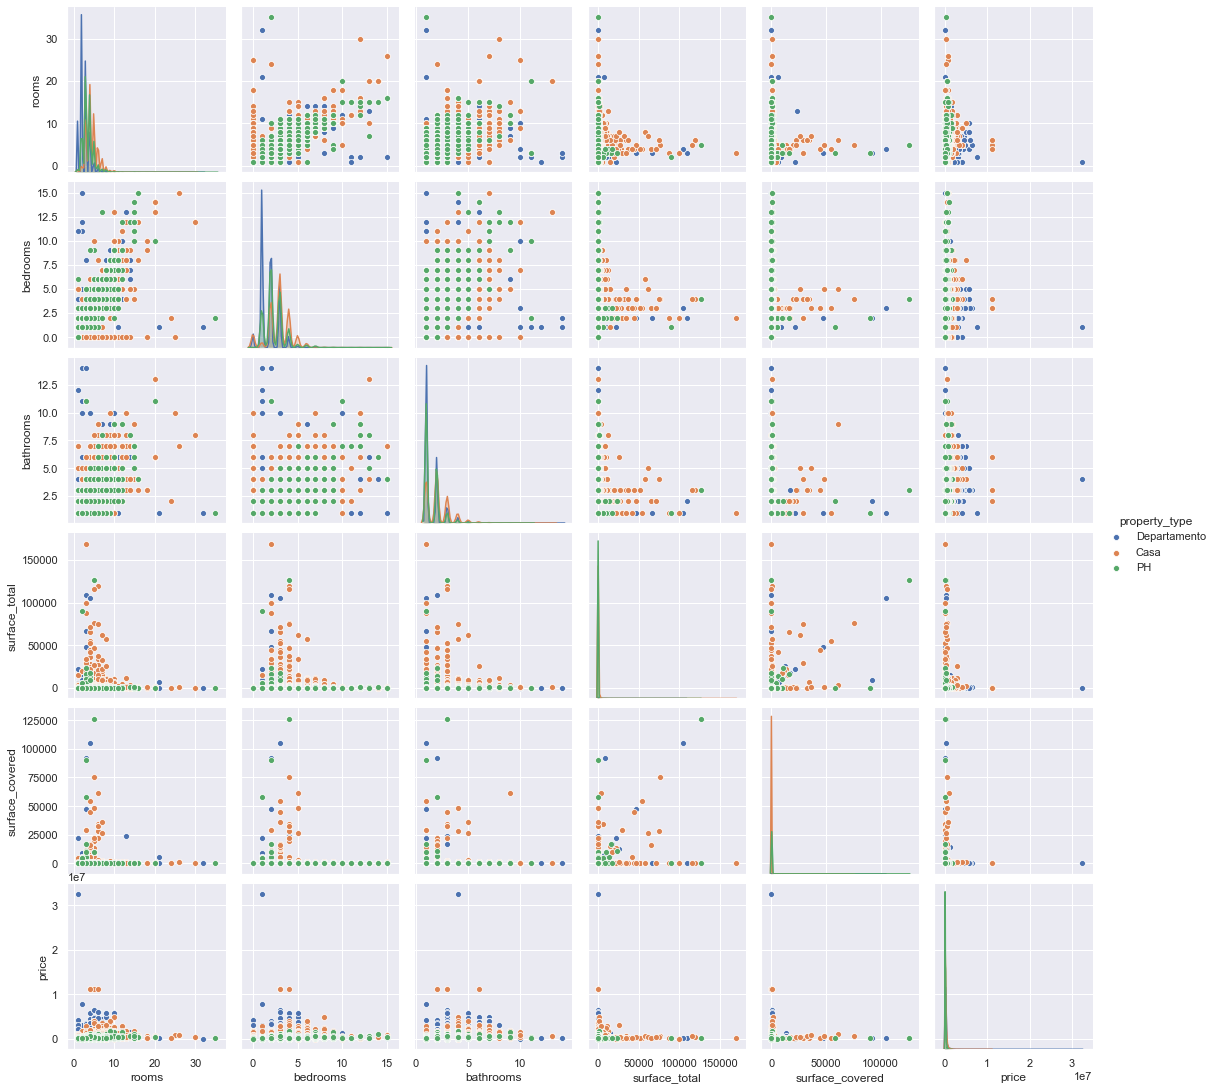

In [18]:
sns.pairplot(df1, hue="property_type")

**CREO VARIAS COPIAS DEL DATAFRAME**

In [19]:
 df2, df3, df4, df5, df6, df7 = df1.copy(), df1.copy(), df1.copy(), df1.copy(), df1.copy(), df1.copy()

**DESCOMPRIMENDO DATASET POR "TIPO DE PROPIEDAD"**

* Ya que analizando previamente mis mayores objetos de estudios en cuanto a "tipo de propiedad" son - CASA, DEPARTAMENTO y PH- para generar un analizis *mas profundo* de Outliers, me parece una buena practica instanciar cada Dataframe creado en 3 subsets diferenciados por los "tipos de propiedad"

In [20]:
df2_dpto= df2[df2["property_type"] == "Departamento"]
df2_casa= df2[df2["property_type"] == "Casa"]
df2_ph= df2[df2["property_type"] == "PH"]

df3_dpto= df3[df3["property_type"] == "Departamento"]
df3_casa= df3[df3["property_type"] == "Casa"]
df3_ph= df3[df3["property_type"] == "PH"]

df4_dpto= df4[df4["property_type"] == "Departamento"]
df4_casa= df4[df4["property_type"] == "Casa"]
df4_ph= df4[df4["property_type"] == "PH"]

<h3><center>VALORES ATIPICOS</center></h3> 


* En la siguiente seccion pretendo observar la distribucion de los Valores Atipicos, explorarlos y eliminarlos (tanto a travez de Metodos como tambien *a mano*.

In [21]:
def boxplot(df):

    Gs = gs.GridSpec(3, 2)

    plt.figure(figsize=(40, 40))

    ax1 = plt.subplot(Gs[0])

    sns.boxplot(data=df, x="rooms", y="property_type")
    plt.xticks(fontsize=23)
    plt.yticks(fontsize=26)
    plt.ylabel("")
    plt.xlabel("Cantidad de Habitaciones", fontsize=30)
    plt.title("Valores Atipicos en 'Habitaciones'", fontsize=45, color='g')

    ax2 = plt.subplot(Gs[1])

    sns.boxplot(data=df, x="bedrooms", y="property_type")
    plt.xticks(fontsize=23)
    plt.yticks(fontsize=26)
    plt.ylabel("")
    plt.xlabel("Cantidad de Dormitorios", fontsize=30)
    plt.title("Valores Atipicos en 'Dormitorios'", fontsize=45, color='g')

    ax2 = plt.subplot(Gs[2])

    sns.boxplot(data=df, x="bathrooms", y="property_type")
    plt.xticks(fontsize=23)
    plt.yticks(fontsize=26)
    plt.ylabel("")
    plt.xlabel("Cantidad de Baños", fontsize=30)
    plt.title("\n Valores Atipicos en 'Baños'", fontsize=45, color='g')

    ax3 = plt.subplot(Gs[3])

    sns.boxplot(data=df, x="surface_total", y="property_type")
    plt.xticks(fontsize=23)
    plt.yticks(fontsize=26)
    plt.ylabel("")
    plt.xlabel("Superficie Total en metros", fontsize=30)
    ax3.set_xlim([0, 25000])
    plt.title("\n Valores Atipicos en 'Superficie Total'",
              fontsize=45, color='g')

    ax4 = plt.subplot(Gs[4])

    sns.boxplot(data=df, x="surface_covered", y="property_type")
    plt.xticks(fontsize=23)
    plt.yticks(fontsize=26)
    plt.ylabel("")
    plt.xlabel("Superficie Cubierta en metros", fontsize=30)
    ax4.set_xlim([0, 20000])
    plt.title("\n Valores Atipicos en 'Superficie Cubierta'",
              fontsize=45, color='g')

    ax5 = plt.subplot(Gs[5])

    sns.boxplot(data=df, x="price", y="property_type")
    plt.xticks(fontsize=23)
    plt.yticks(fontsize=26)
    plt.ylabel("")
    plt.xlabel("Precios de las propiedades", fontsize=30)
    ax5.set_xlim([0, 1100000])
    plt.title("\n Valores Atipicos en 'Precio'", fontsize=45, color='g')

    plt.show()

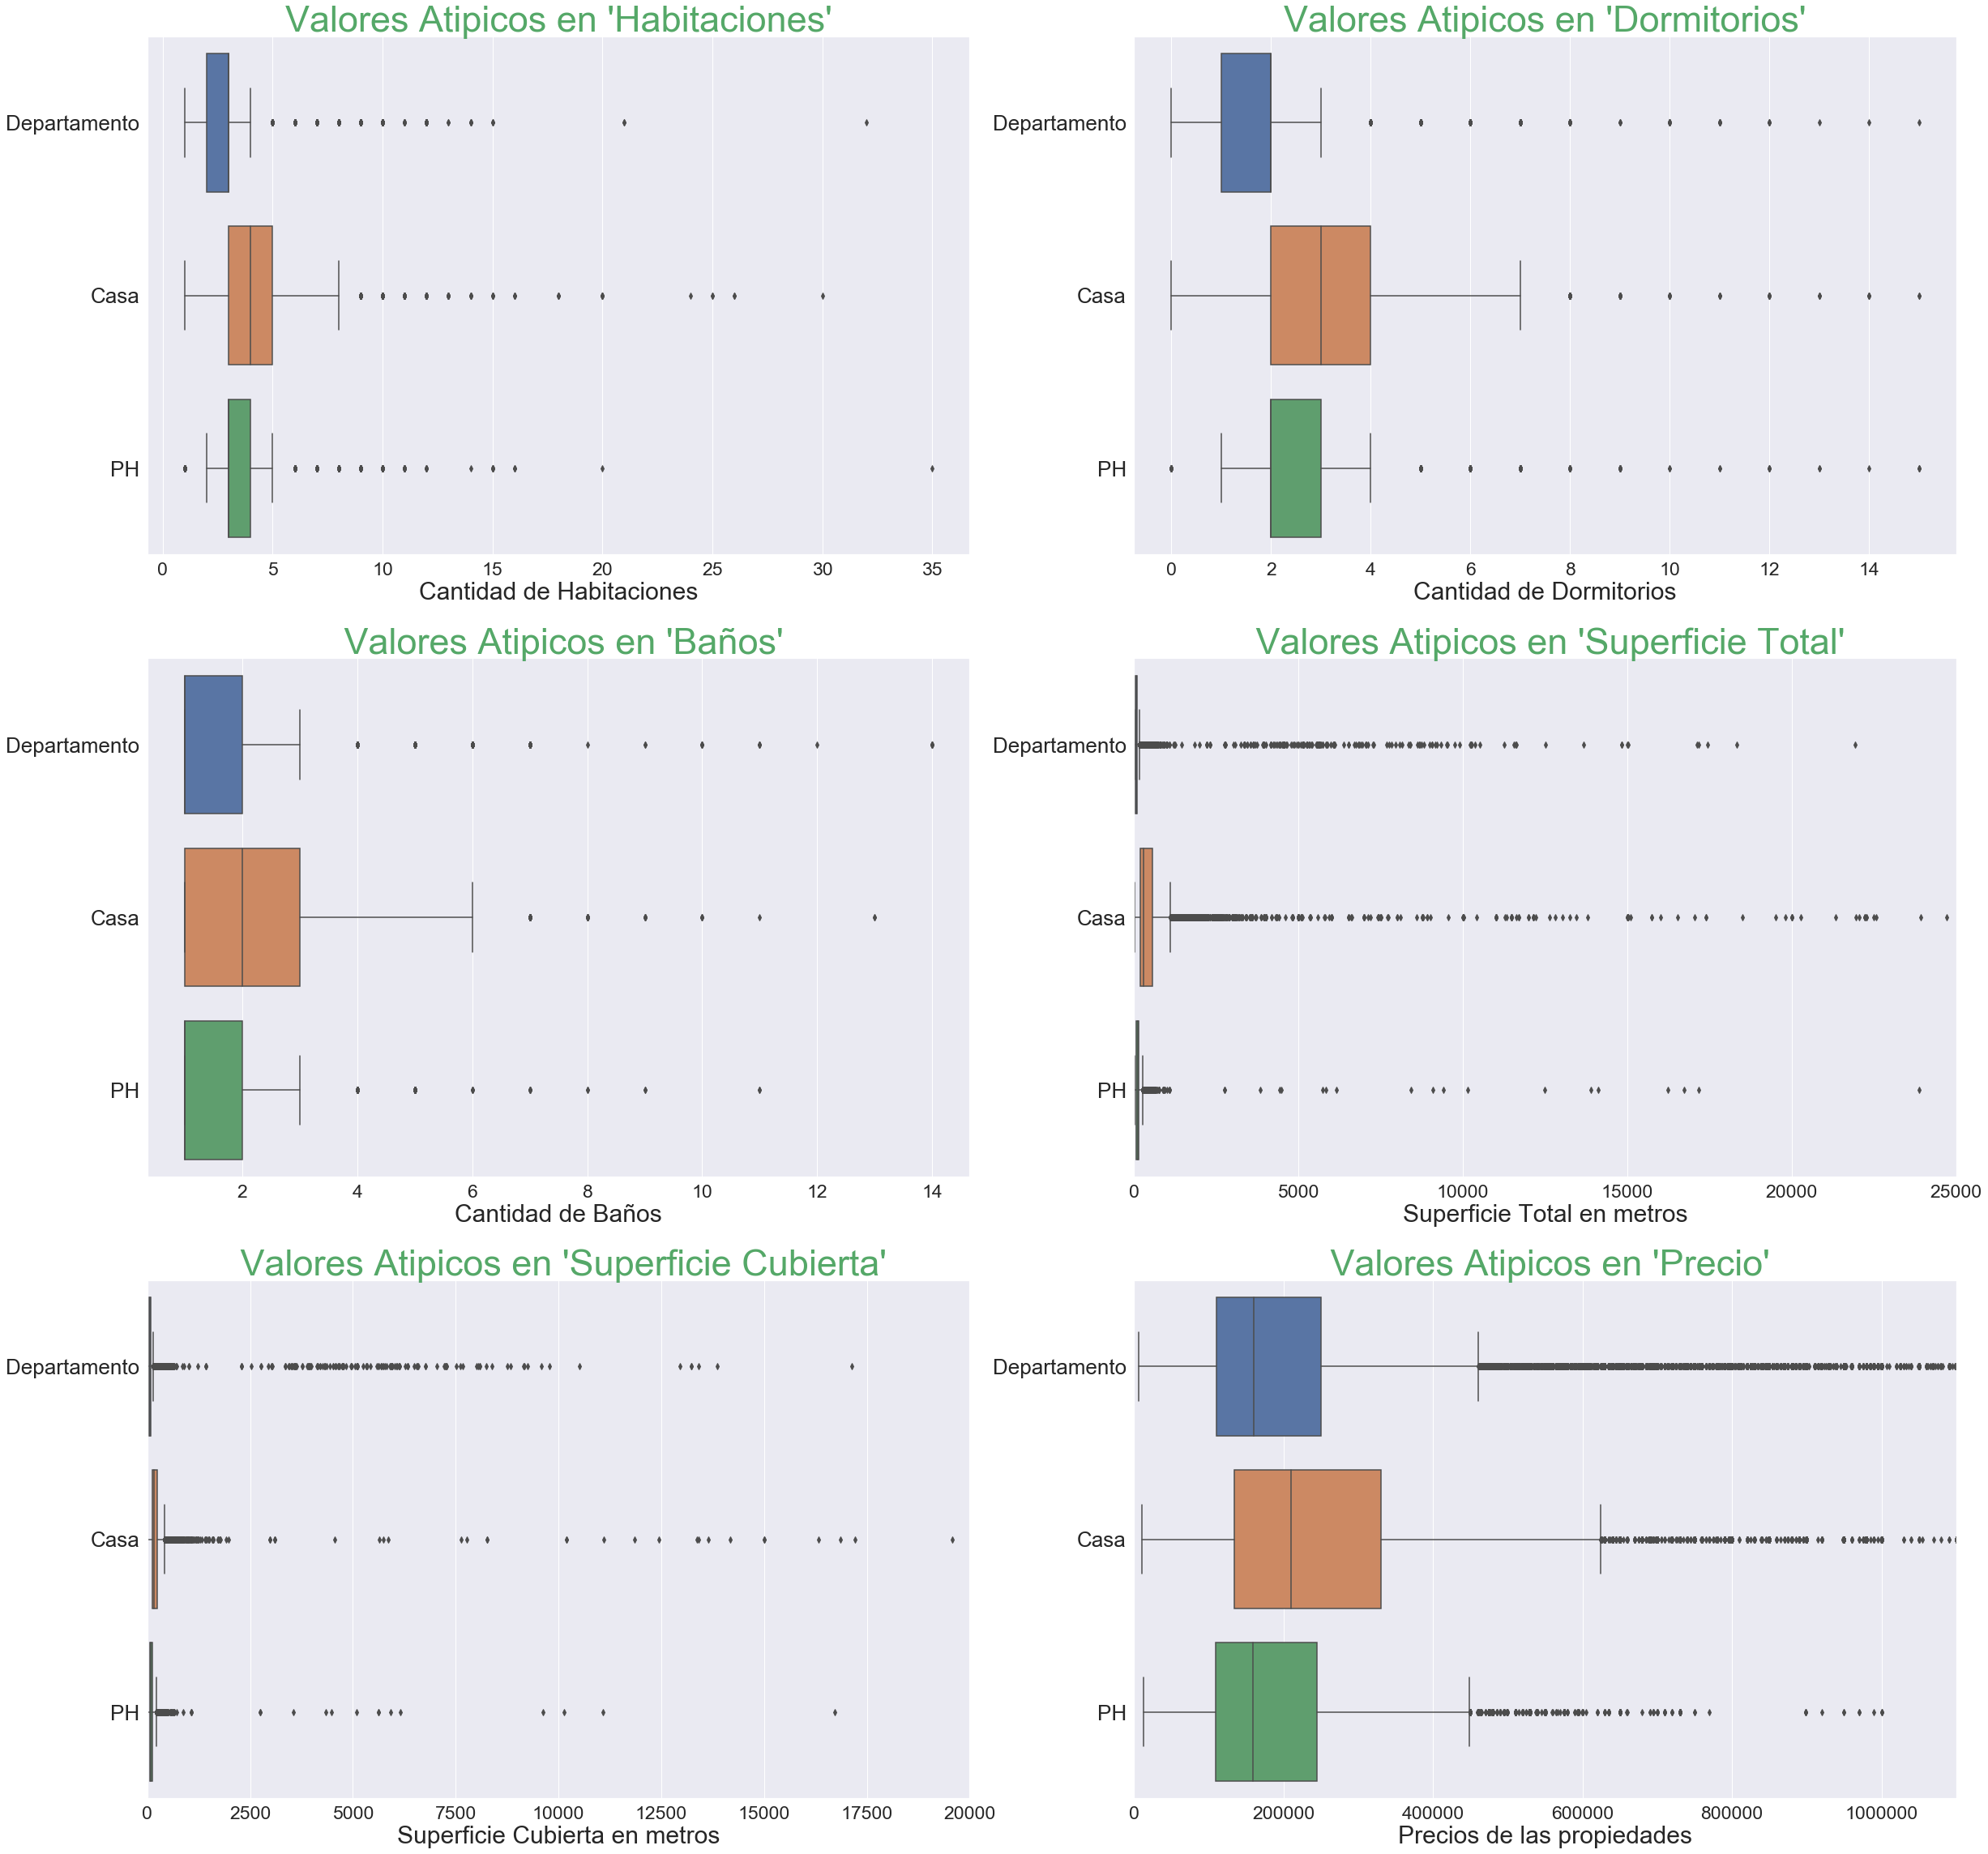

In [22]:
boxplot(df1)

In [23]:
def heatmap(df):
    plt.figure(figsize=(9, 7))

    corr = df.corr()

    sns.heatmap(data=corr, cbar=True, square=True, annot=True,

                fmt='.2f', annot_kws={'size': 13},

                xticklabels=corr.columns, yticklabels=corr.columns,

                cmap='RdBu', center=0)

    plt.title('Correlacion variables', pad=16)
    plt.xticks(rotation=45, fontsize=13)
    plt.yticks(rotation=0, fontsize=13)
    plt.tight_layout()
    plt.show()

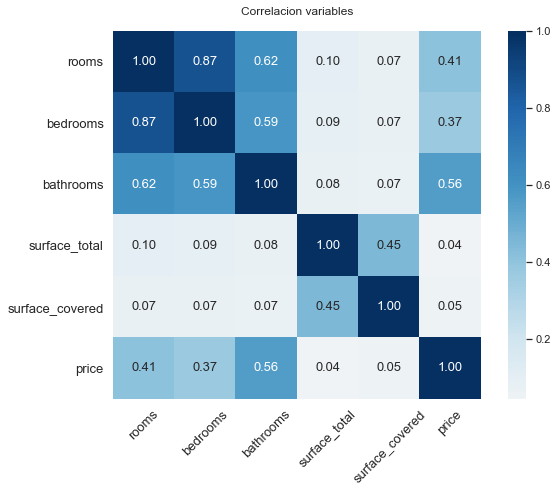

In [24]:
heatmap(df1)

<h6><center>ATIPICOS CON METODOS</center></h6> 

**OBTENIENDO RESULTADOS DE Q1-Q3-IQR... UMBRAL MINIMO-UMBRAL MAXIMO-...ETC**

* Defino funciones para calcular **IQR** y **3-Simgas** para observar *relativamente* donde es que se encuentran los datos y por donde podria identificar  los atipicos.

In [25]:
def iqr_calc(df,var):
    
    q25 = np.nanquantile(df[var], 0.25)
    q75 = np.nanquantile(df[var], 0.75)
    iqr = q75 - q25
    minimo = q25 - (iqr*1.5)
    maximo = q75 + (iqr*1.5)
    
    return "Q1= "  + str(q25),"Q3= " + str(q75), "IQR= " + str(iqr), "Minimo= " + str(minimo), "Maximo= " + str(maximo)

In [26]:
for var in df1.drop(columns= ["l2","l3","property_type"]):
    print("Valores de IQR para: ", var, iqr_calc(df1,var))    

Valores de IQR para:  rooms ('Q1= 2.0', 'Q3= 4.0', 'IQR= 2.0', 'Minimo= -1.0', 'Maximo= 7.0')
Valores de IQR para:  bedrooms ('Q1= 1.0', 'Q3= 3.0', 'IQR= 2.0', 'Minimo= -2.0', 'Maximo= 6.0')
Valores de IQR para:  bathrooms ('Q1= 1.0', 'Q3= 2.0', 'IQR= 1.0', 'Minimo= -0.5', 'Maximo= 3.5')
Valores de IQR para:  surface_total ('Q1= 52.0', 'Q3= 138.0', 'IQR= 86.0', 'Minimo= -77.0', 'Maximo= 267.0')
Valores de IQR para:  surface_covered ('Q1= 47.0', 'Q3= 108.0', 'IQR= 61.0', 'Minimo= -44.5', 'Maximo= 199.5')
Valores de IQR para:  price ('Q1= 112000.0', 'Q3= 263714.0', 'IQR= 151714.0', 'Minimo= -115571.0', 'Maximo= 491285.0')


In [27]:
def tres_sigma_calc(df, var):
    
    sigma_minimo= df[var].mean() - (3 * df[var].std())
    sigma_maximo= df[var].mean() + (3 * df[var].std())
    
    return "Umbral Minimo: " + str(sigma_minimo), "Umbral Maximo: " + str(sigma_maximo)

In [28]:
for var in df1.drop(columns= ["l2","l3","property_type"]):
    print("Umbrales Maximos y Minimos para: ", var, tres_sigma_calc(df1,var))

Umbrales Maximos y Minimos para:  rooms ('Umbral Minimo: -1.0914895769652788', 'Umbral Maximo: 7.2915151411526935')
Umbrales Maximos y Minimos para:  bedrooms ('Umbral Minimo: -1.3935497115600577', 'Umbral Maximo: 5.39640437915461')
Umbrales Maximos y Minimos para:  bathrooms ('Umbral Minimo: -1.0611251109983095', 'Umbral Maximo: 4.254699466970206')
Umbrales Maximos y Minimos para:  surface_total ('Umbral Minimo: -4162.348446703948', 'Umbral Maximo: 4529.838504113729')
Umbrales Maximos y Minimos para:  surface_covered ('Umbral Minimo: -2667.176524433428', 'Umbral Maximo: 2893.019243134318')
Umbrales Maximos y Minimos para:  price ('Umbral Minimo: -620709.6925778599', 'Umbral Maximo: 1095138.6003479525')


**APLICANDO *IQR* Y *3-SIGMAS* A DATASETS QUE *NO* FUERON INSTANCIADOS POR *TIPO DE PROPIEDAD***

In [29]:
def iqr_remove(df,var):
    
    Q1 = np.nanquantile(df[var], 0.25)
    Q3 = np.nanquantile(df[var], 0.75)
    IQR = Q3 - Q1
    q_min = Q1 - (IQR*1.5)
    q_max = Q3 + (IQR*1.5)
    
    return df[~((df[var] < q_min) | (df[var] > q_max))]

In [30]:
def remove_outliers(df,var):
    
    q1,q3= np.nanpercentile(df[var],[25,75])
    iqr= q3-q1
    l_i= q1-1.5*iqr
    l_s=q3+1.5*iqr
    
    return df[((df[var] > l_i) & (df[var] < l_s))]

In [31]:
def tres_sigmas_remove(df,var):
    
    sigma_minimo= df[var].mean() - (3 * df[var].std())
    sigma_maximo= df[var].mean() + (3 * df[var].std())
    
    return df[~((df[var] < sigma_minimo) | (df[var] > sigma_maximo))]

In [32]:
for var in df2.drop(columns=["l2","l3","property_type"]):
    df2= iqr_remove(df2,var)

In [33]:
for var in df3.drop(columns=["l2","l3","property_type"]):
    df3= remove_outliers(df3,var)

In [34]:
for var in df4.drop(columns=["l2","l3","property_type"]):
    df4= tres_sigmas_remove(df4,var)

In [35]:
print("DataFrame_1 -Original- con Outliers: ", df1.shape)
print("DataFrame_2 curado de Outliers con Metodo IQR: ", df2.shape)
print("DataFrame_3 curado de Outliers con OTRO Metodo IQR: ", df3.shape)
print("DataFrame_4 Curado con 3-Sigmas: ", df4.shape)

DataFrame_1 -Original- con Outliers:  (140822, 9)
DataFrame_2 curado de Outliers con Metodo IQR:  (112876, 9)
DataFrame_3 curado de Outliers con OTRO Metodo IQR:  (93474, 9)
DataFrame_4 Curado con 3-Sigmas:  (135436, 9)


* Hay un DataFrame el cual devolvio considerablemente MENOS instancias que los otros 2 analizados.

In [36]:
df3.isna().sum()

l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

Puedo observar que la funcion "outlier_remove" no solo remueve los Outliers sino *tambien* los Valores Faltantes. Esta funcion no sera utilizada de aca en adelante a medida que sigo con la exploracion de Outliers.

Para el proximo analizis de Outliers, voy a trabajar sobre DataFrames separados por tipo de propiedad. Solo voy a trabajar con Dataframe *2* y *4*.

**APLICANDO *IQR* Y *3-SIGMAS* A DATASETS QUE *SI* FUERON INSTANCIADOS POR *TIPO DE PROPIEDAD***

* METODO IQR_1 A UN DATAFRAME INSTANCIADO POR 'TIPO DE PROPIEDADES'

In [37]:
for var in df2_dpto.drop(columns=["l2","l3","property_type"]):
    df2_dpto= iqr_remove(df2_dpto,var)
    
for var in df2_casa.drop(columns=["l2","l3","property_type"]):
    df2_casa= iqr_remove(df2_casa,var)
    
for var in df2_ph.drop(columns=["l2","l3","property_type"]):
    df2_ph= iqr_remove(df2_ph,var)

In [38]:
print("DataFrame_2 -solo departamentos- curado de Outliers: ", df2_dpto.shape)
print("DataFrame_2 -solo casas- curado de Outliers: ", df2_casa.shape)
print("DataFrame_2 -solo ph's- curado de Outliers: ", df2_ph.shape)

DataFrame_2 -solo departamentos- curado de Outliers:  (86946, 9)
DataFrame_2 -solo casas- curado de Outliers:  (18164, 9)
DataFrame_2 -solo ph's- curado de Outliers:  (11848, 9)


In [39]:
df2_inst= pd.concat([df2_dpto, df2_casa, df2_ph])

In [40]:
print("DataFrame Curado de Outliers con metodo IQR_1 instanciados por 'tipo de propiedad':", df2_inst.shape)

DataFrame Curado de Outliers con metodo IQR_1 instanciados por 'tipo de propiedad': (116958, 9)


* METODO 3-SIGMAS A UN DATAFRAME INSTANCIADO POR 'TIPO DE PROPIEDADES'

In [41]:
for var in df4_dpto.drop(columns=["l2","l3","property_type"]):
    df4_dpto= tres_sigmas_remove(df4_dpto,var)
    
for var in df4_casa.drop(columns=["l2","l3","property_type"]):
    df4_casa= tres_sigmas_remove(df4_casa,var)
    
for var in df4_ph.drop(columns=["l2","l3","property_type"]):
    df4_ph= tres_sigmas_remove(df4_ph,var)

In [42]:
print("DataFrame -solo departamentos- curado de Outliers: ", df4_dpto.shape)
print("DataFrame -solo casas- curado de Outliers: ", df4_casa.shape)
print("DataFrame -solo ph's- curado de Outliers: ", df4_ph.shape)

DataFrame -solo departamentos- curado de Outliers:  (99724, 9)
DataFrame -solo casas- curado de Outliers:  (20591, 9)
DataFrame -solo ph's- curado de Outliers:  (13384, 9)


In [43]:
df4_inst= pd.concat([df4_dpto, df4_casa, df4_ph])

In [44]:
print("DataFrame Curado de Outliers con metodo 3-Sigmas instanciados por 'tipo de propiedad':", df4_inst.shape)

DataFrame Curado de Outliers con metodo 3-Sigmas instanciados por 'tipo de propiedad': (133699, 9)


**COMPARACION: METODOS DE CURADO PARA OUTLIERS EN DISTINTOS DATAFRAMES**

In [45]:
print("DataFrame2 curado de Outliers -- Instanciado por 'tipo de propiedad': ", df2_inst.shape ,"-- No-Instanciado : ", df2.shape)
print("DataFrame4 curado de Outliers -- Instanciado por 'tipo de propiedad': ", df4_inst.shape ,"-- No-Instanciado : ", df4.shape)

DataFrame2 curado de Outliers -- Instanciado por 'tipo de propiedad':  (116958, 9) -- No-Instanciado :  (112876, 9)
DataFrame4 curado de Outliers -- Instanciado por 'tipo de propiedad':  (133699, 9) -- No-Instanciado :  (135436, 9)


**BOXPLOTS COMPARATIVOS DE LOS DATAFRAMES INSTANCIADOS Y NO**

* DF2 NO-INSTANCIADO (IQR)

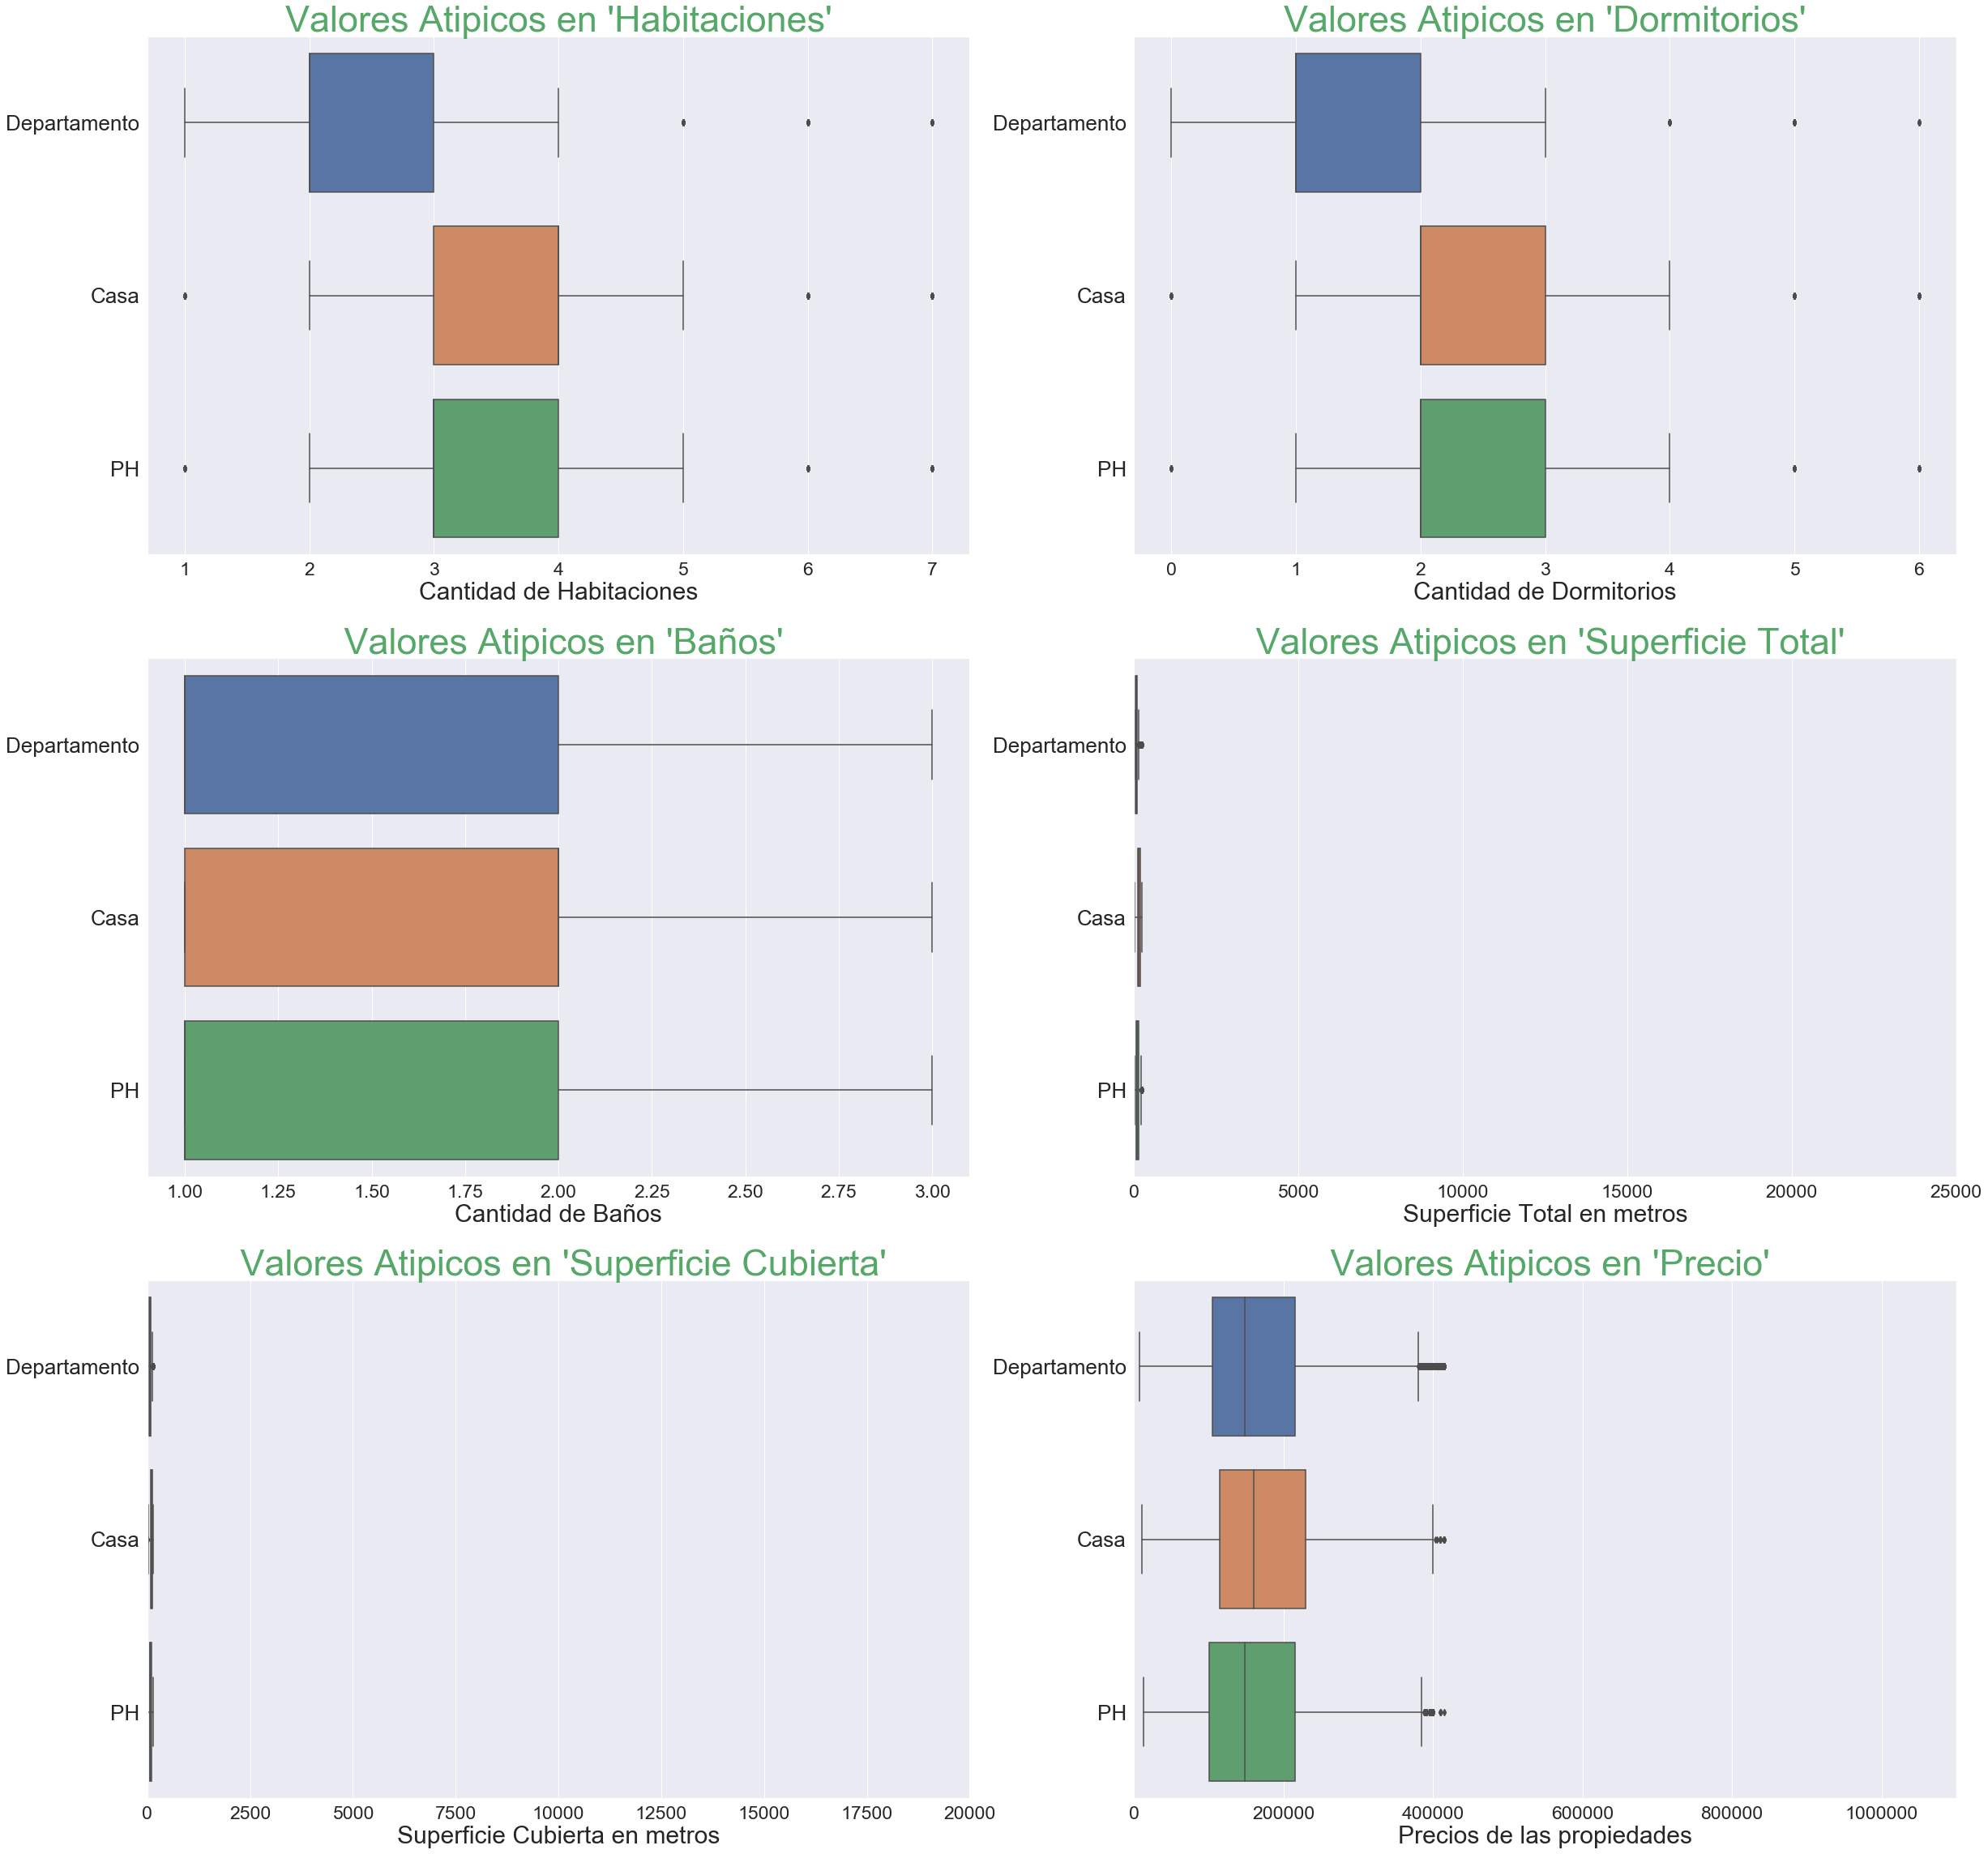

In [46]:
boxplot(df2) 

* DF2 INSTANCIADO (IQR)

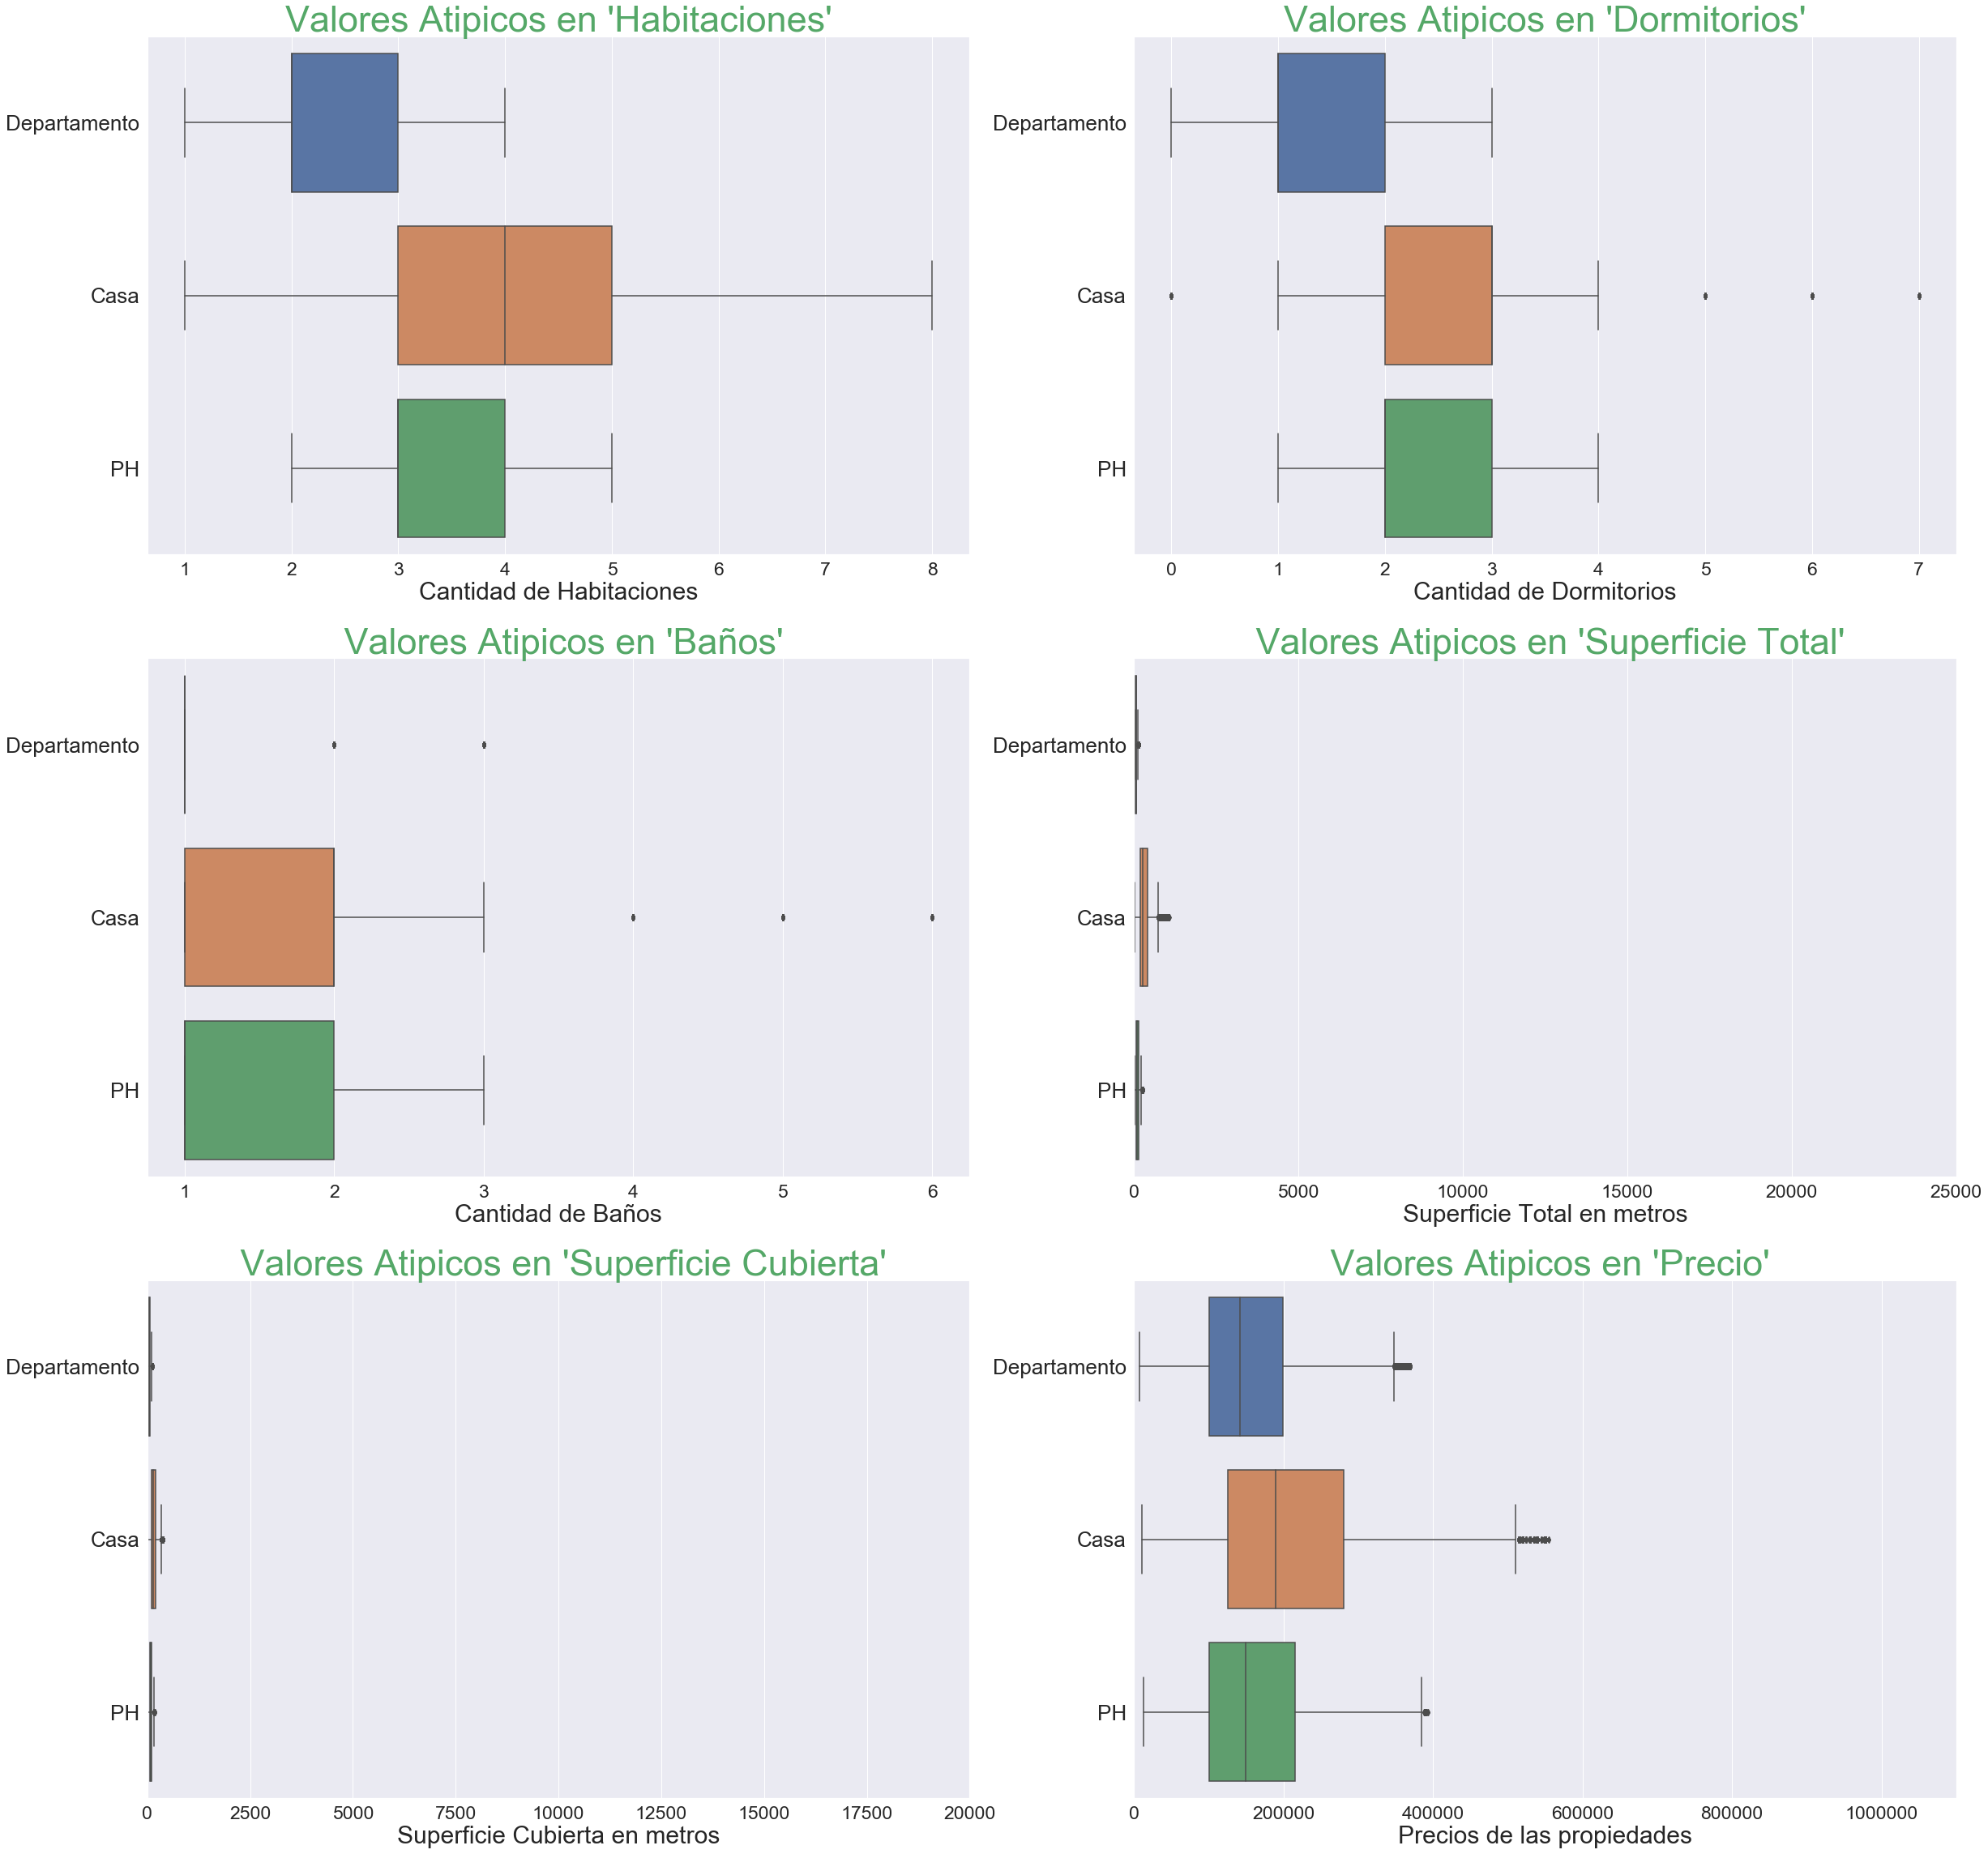

In [47]:
boxplot(df2_inst)

* DF4 NO-INSTANCIADO (3-Sigmas)

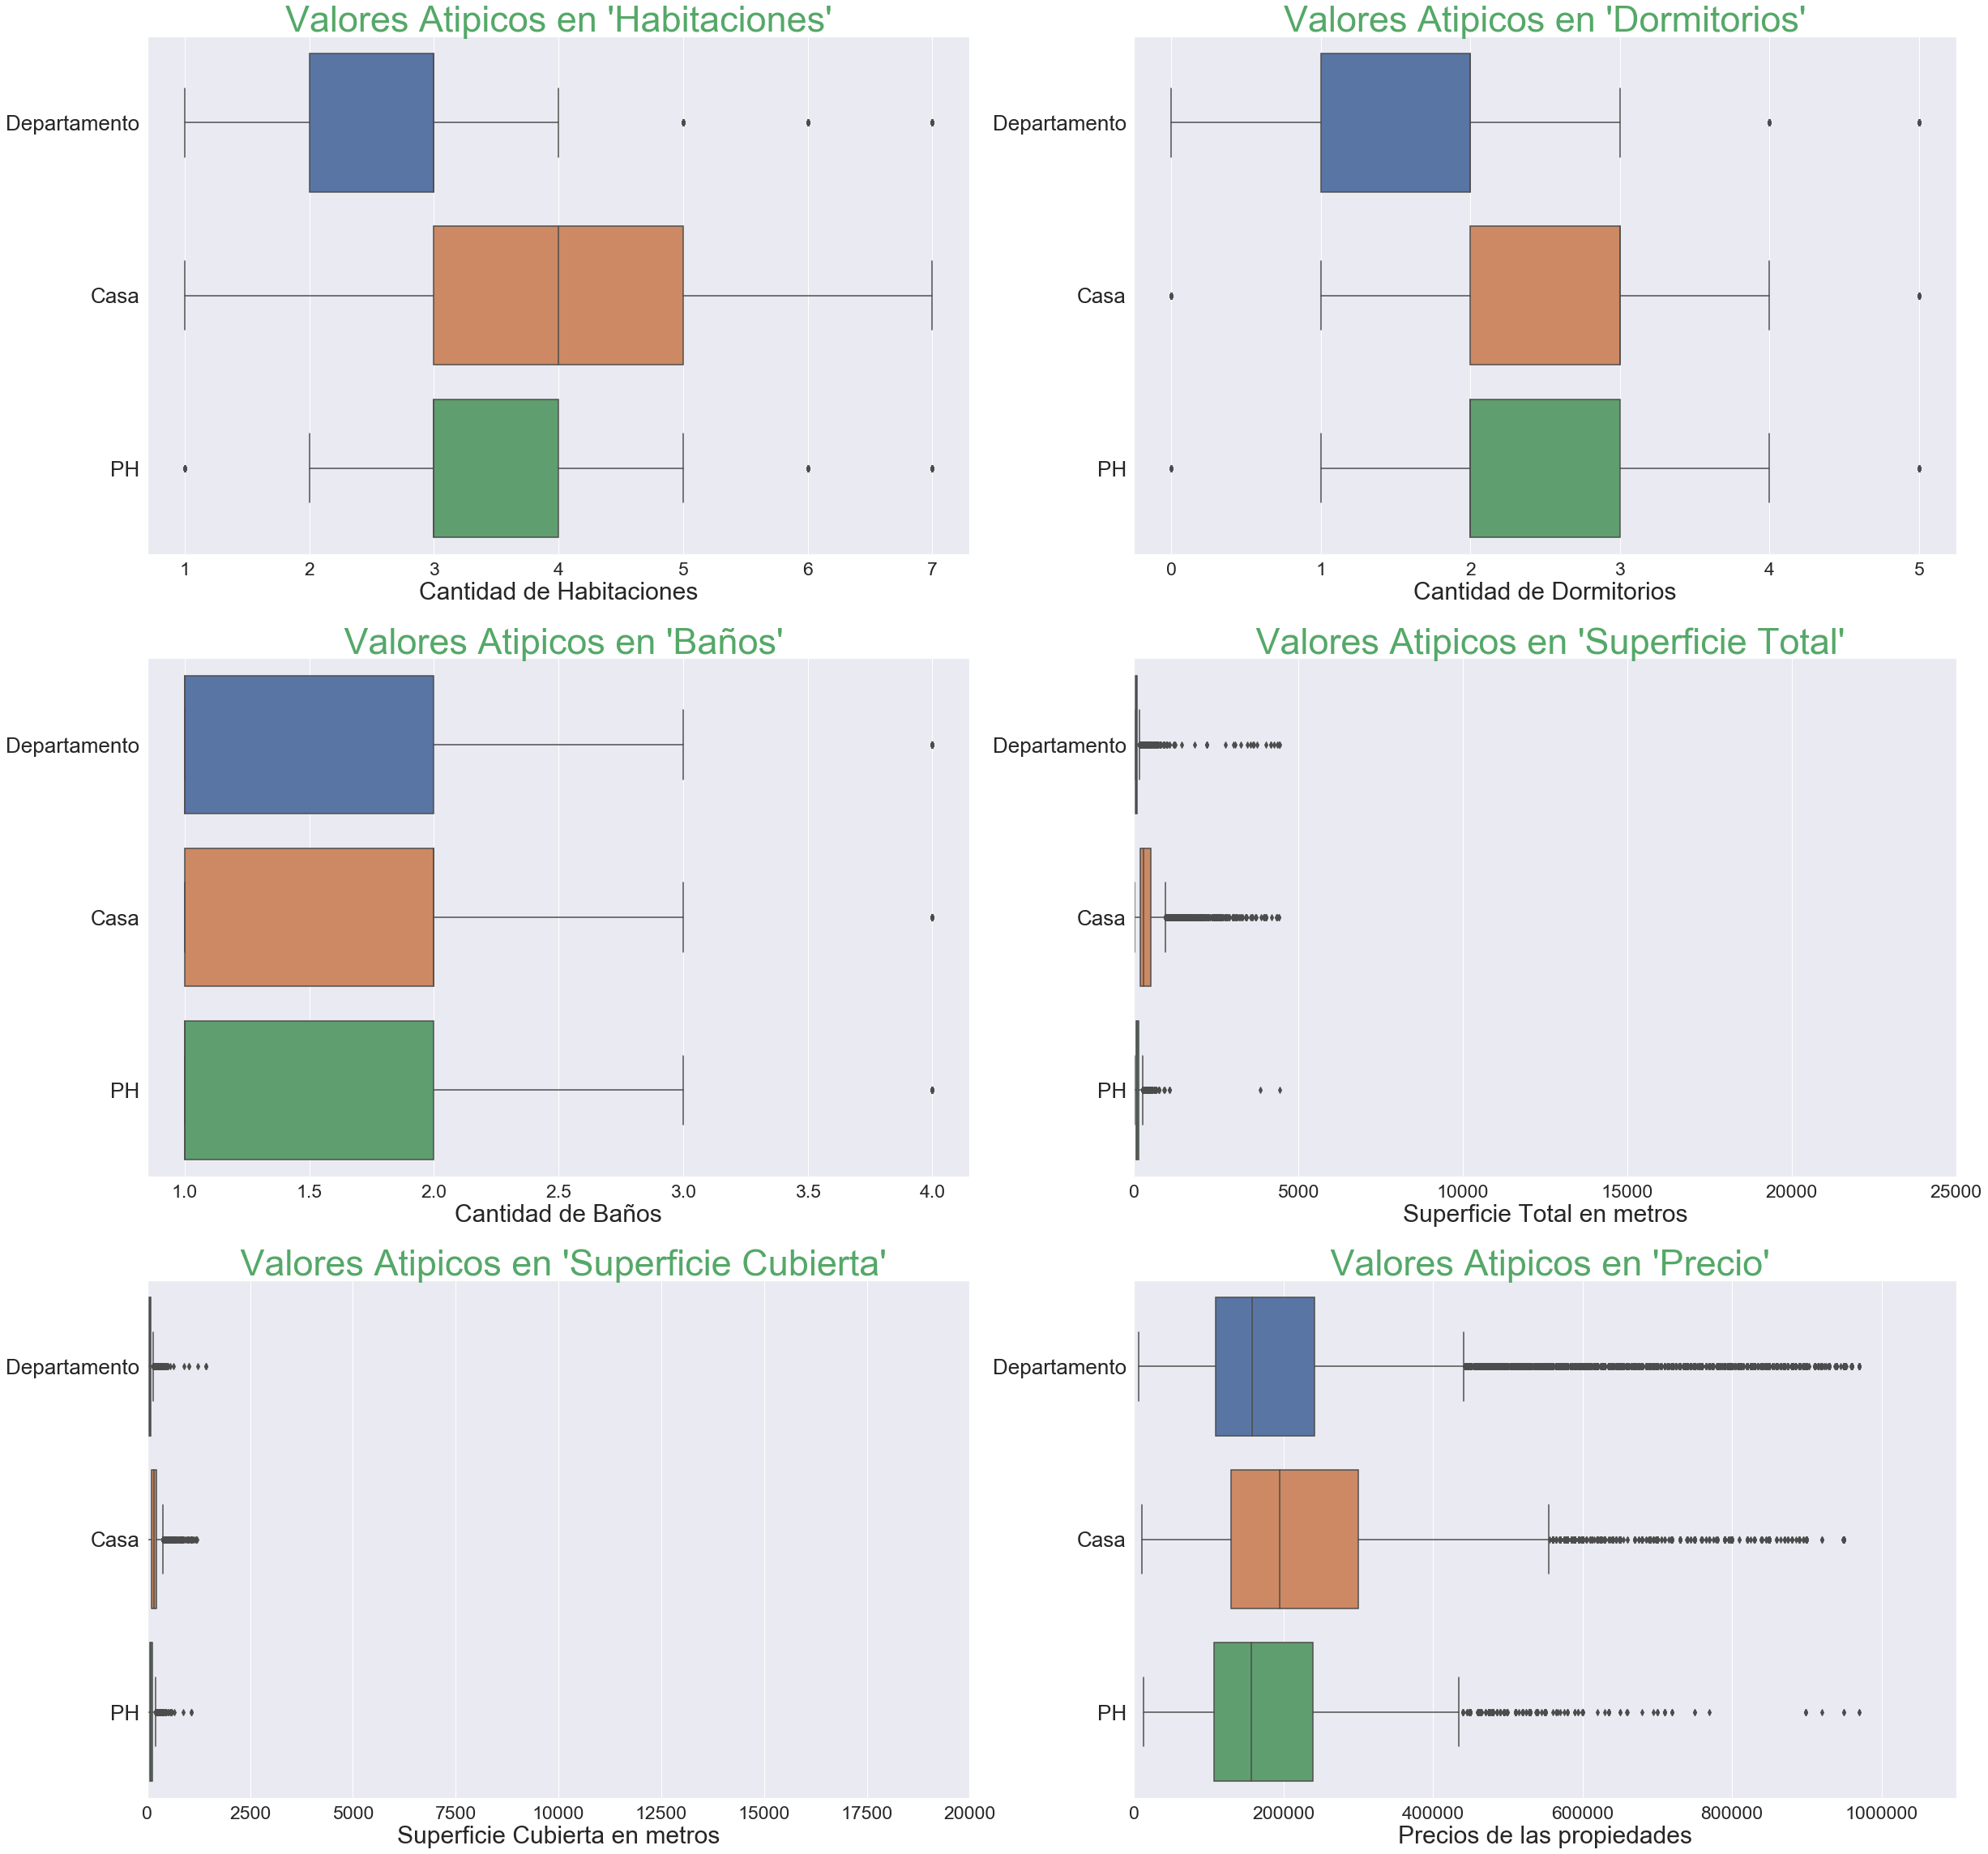

In [48]:
boxplot(df4)

* DF4 INSTANCIADO (3-Sigmas)

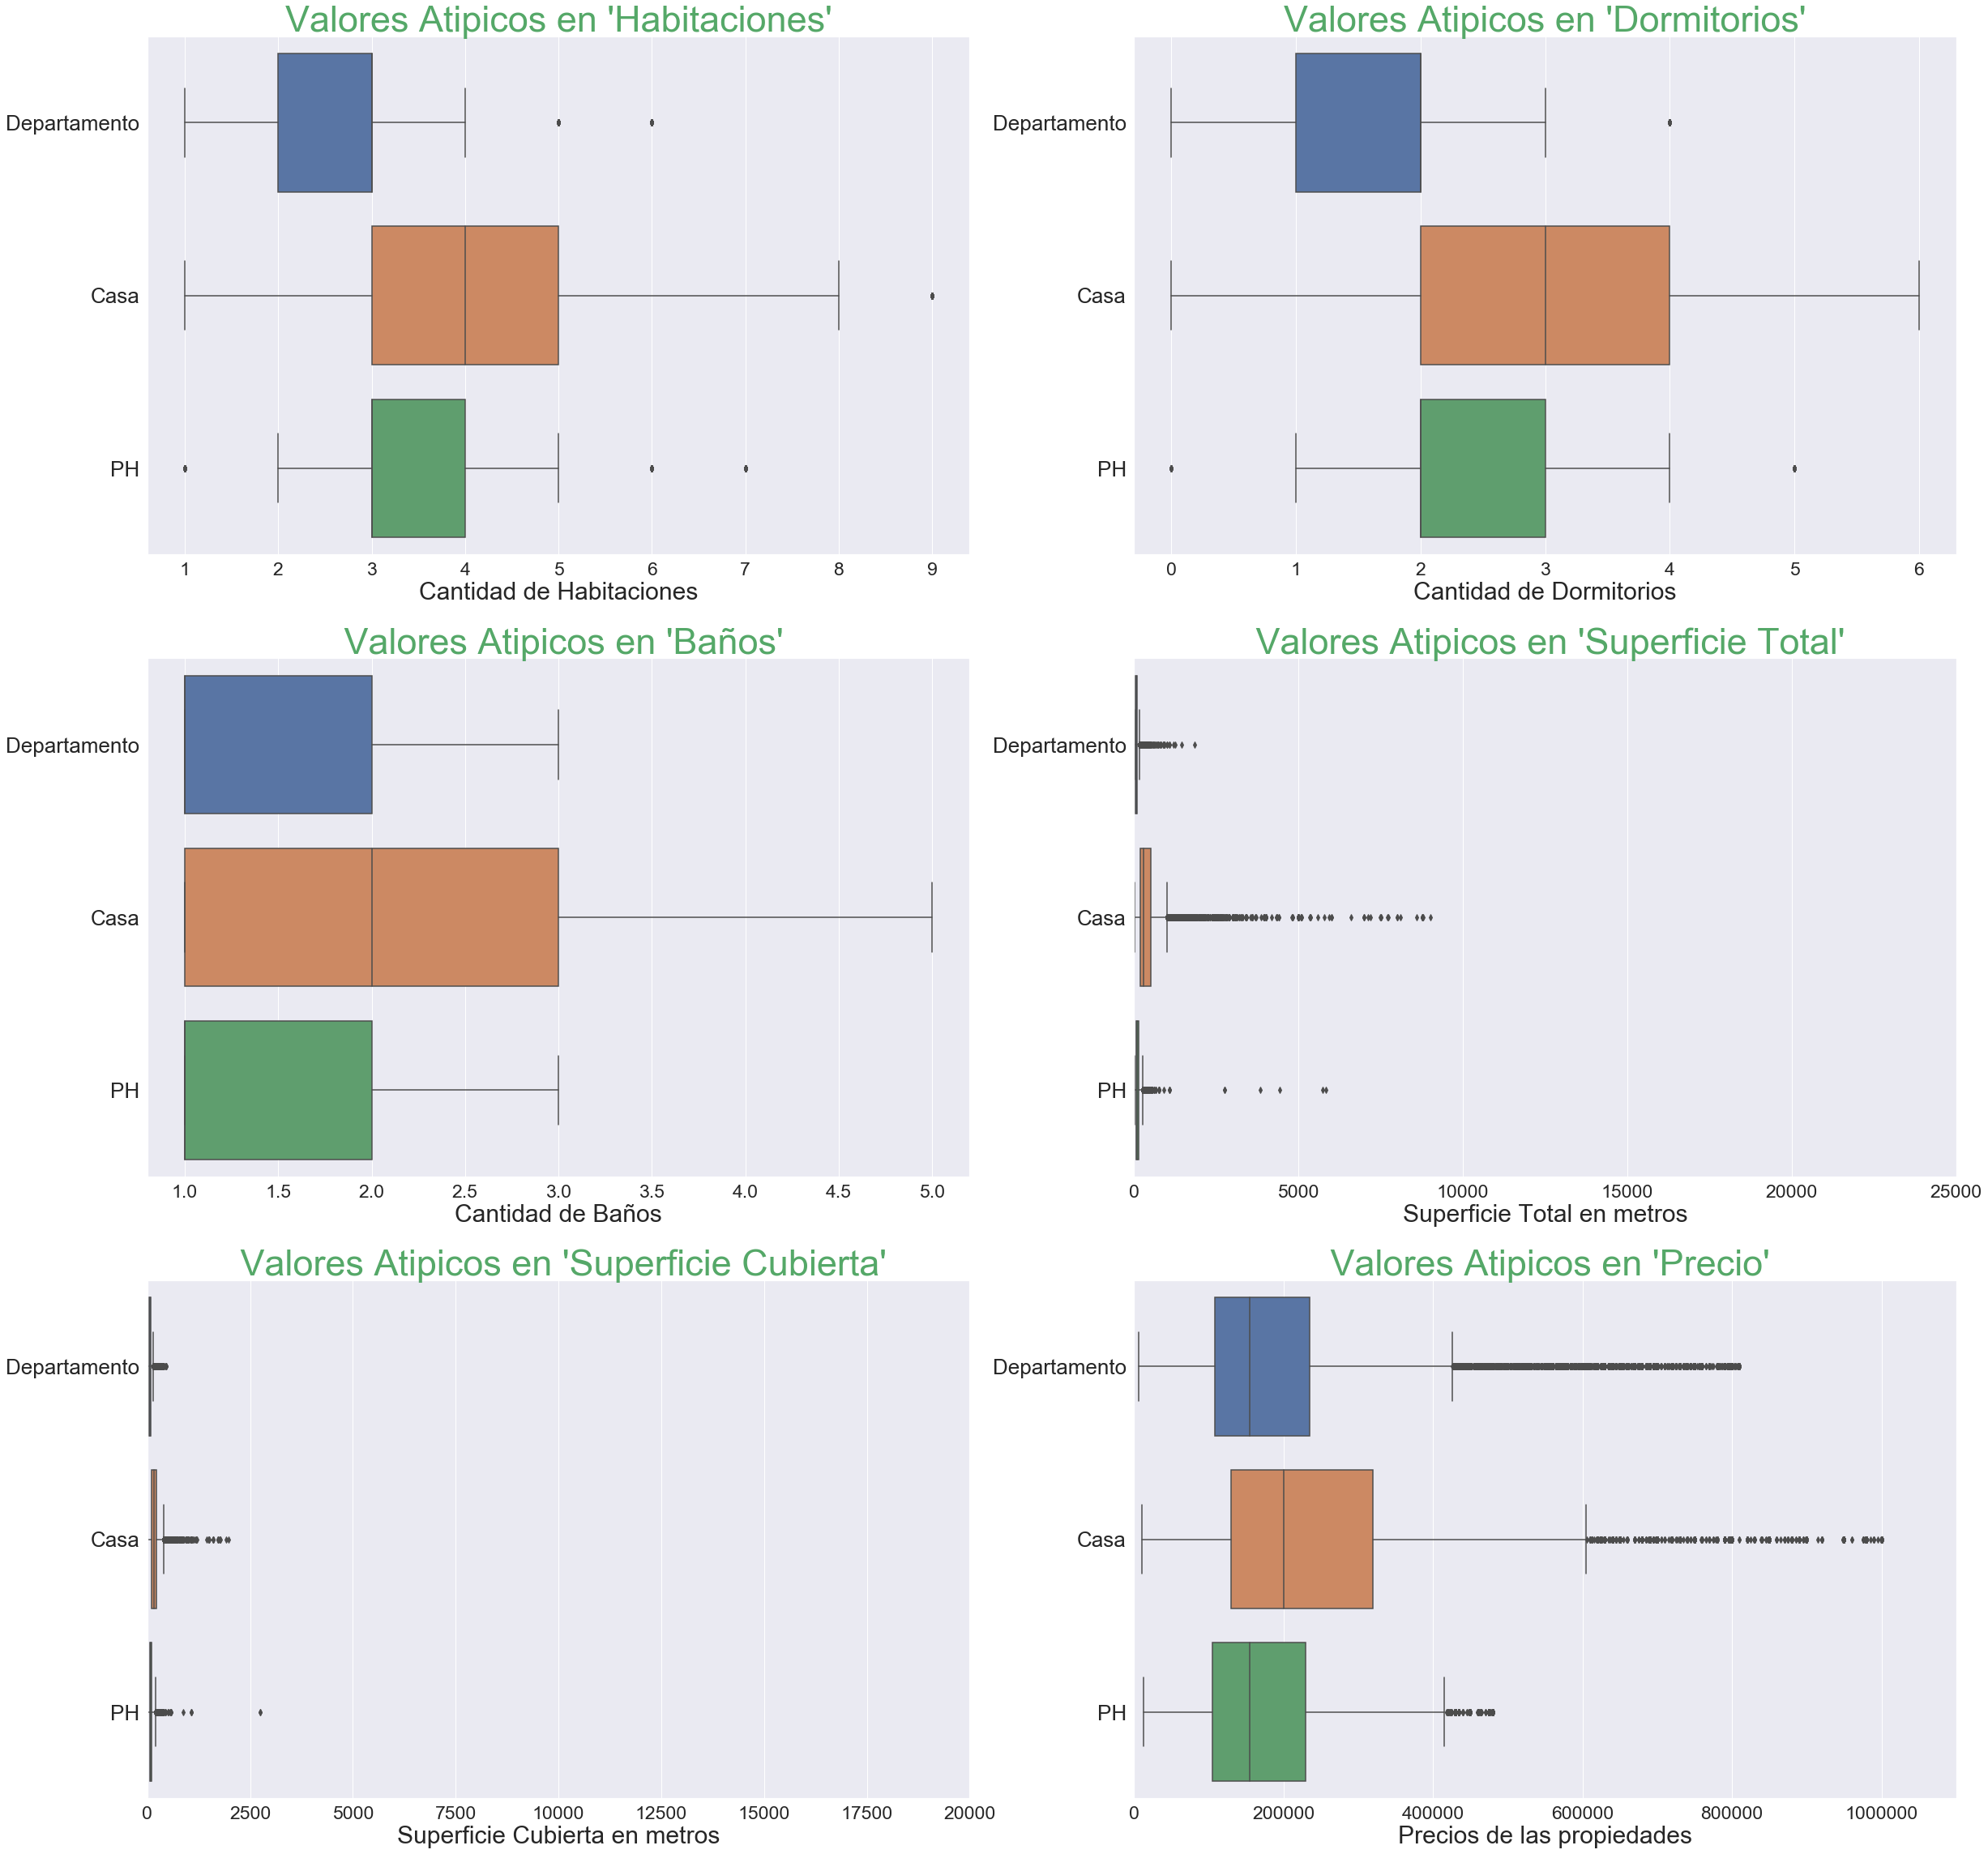

In [49]:
boxplot(df4_inst)

Dada la primera exploracion de Outliers puedo conlcuir que **Metodo IQR** sobre el DataFrame **df2 (no-instanciado)** es el que obtuvo el mejor desempeño y mejores resultados. Tambien veo que instanciar por tipo de propiedad los DataFrames para aplicarle los metodos no tuvo un cambio notorio en su desmpeño.

**DF2** -por el momento- pasa a ser mi DataFrame de *batalla*

Para mantener una buena practica, voy a explorar yo los datos de las 6 variables (una por una) y proceder a un filtrado para luego comparar con **df2**.

En mi exploracion a mano SI voy a instanciar por "tipo de propiedad" por pensamiento critico que el "tipo de propiedad" influye en las imputaciones de Atipicos.

**VALORES ATIPICOS EXPLORADOS A MANO**

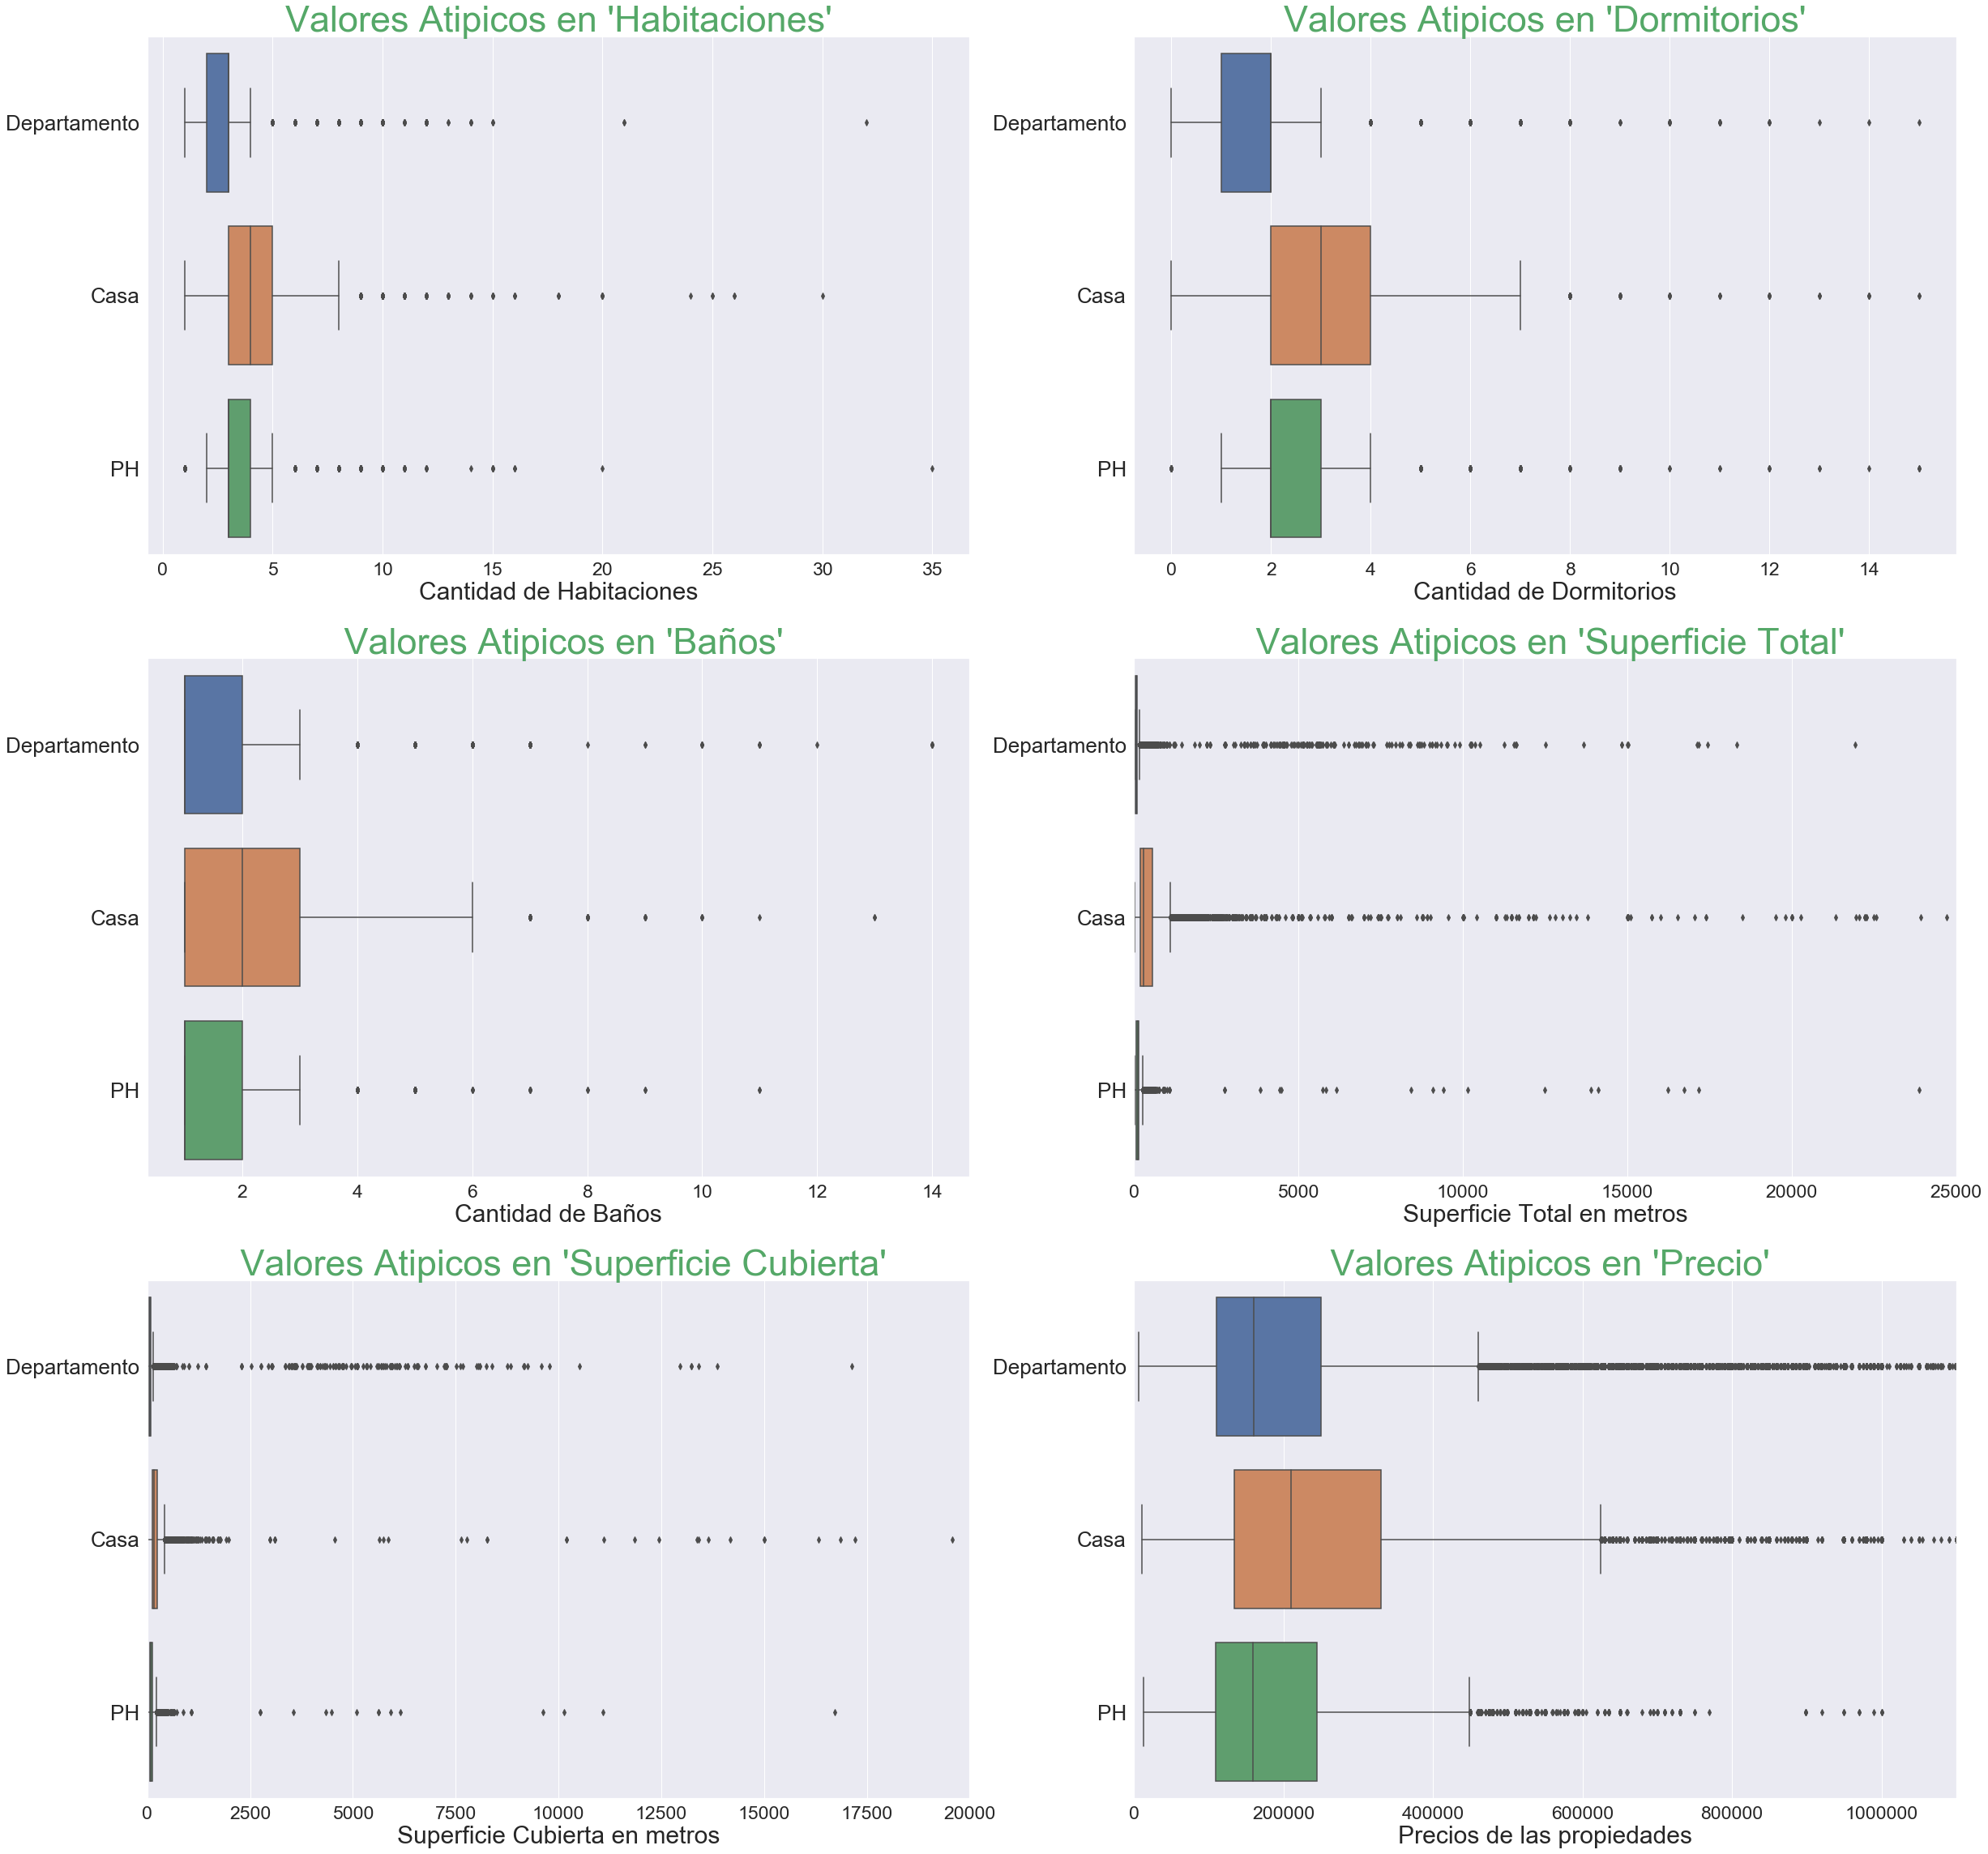

In [50]:
boxplot(df1)

* Distribucion de las variables en relacion a `Departamento`

In [51]:
df1[df1["property_type"] == "Departamento"].describe()

rooms       bedrooms      bathrooms  surface_total  \
count  105276.000000  105276.000000  102601.000000   91908.000000   
mean        2.756535       1.757371       1.506145      99.355094   
std         1.147911       0.951123       0.810472     651.143245   
min         1.000000       0.000000       1.000000      10.000000   
25%         2.000000       1.000000       1.000000      48.000000   
50%         3.000000       2.000000       1.000000      67.000000   
75%         3.000000       2.000000       2.000000      98.000000   
max        32.000000      15.000000      14.000000  108960.000000   

       surface_covered         price  
count     91605.000000  1.052760e+05  
mean         85.477223  2.360013e+05  
std         553.739140  3.008556e+05  
min           1.000000  6.000000e+03  
25%          44.000000  1.100000e+05  
50%          60.000000  1.600000e+05  
75%          85.000000  2.500000e+05  
max      104890.000000  3.243423e+07

* Distribucion de las variables en relacion a `Casa`

In [52]:
df1[df1["property_type"] == "Casa"].describe()

rooms      bedrooms     bathrooms  surface_total  \
count  21443.000000  21443.000000  20114.000000   16571.000000   
mean       4.500583      2.925057      2.137814     660.537204   
std        1.575698      1.348765      1.118184    3062.760390   
min        1.000000      0.000000      1.000000      11.000000   
25%        3.000000      2.000000      1.000000     200.000000   
50%        4.000000      3.000000      2.000000     300.000000   
75%        5.000000      4.000000      3.000000     562.000000   
max       30.000000     15.000000     13.000000  169000.000000   

       surface_covered         price  
count     16623.000000  2.144300e+04  
mean        249.307466  2.759671e+05  
std        1396.210573  2.851316e+05  
min           1.000000  1.000000e+04  
25%         112.000000  1.340000e+05  
50%         160.000000  2.100000e+05  
75%         236.000000  3.300000e+05  
max       75792.000000  1.111111e+07

* Distribucion de las variables en relacion a `PH`

In [53]:
df1[df1["property_type"] == "PH"].describe()

rooms      bedrooms     bathrooms  surface_total  \
count  14103.000000  14103.000000  13925.000000   13974.000000   
mean       3.534496      2.418918      1.483160     173.381995   
std        1.352364      1.163156      0.748517    2040.309071   
min        1.000000      0.000000      1.000000      10.000000   
25%        3.000000      2.000000      1.000000      70.000000   
50%        3.000000      2.000000      1.000000     105.000000   
75%        4.000000      3.000000      2.000000     151.000000   
max       35.000000     15.000000     11.000000  126062.000000   

       surface_covered         price  
count     13948.000000  1.410300e+04  
mean        130.620949  1.873488e+05  
std        1777.115882  1.120417e+05  
min           1.000000  1.300000e+04  
25%          56.000000  1.090000e+05  
50%          80.000000  1.595000e+05  
75%         118.000000  2.450000e+05  
max      126062.000000  1.750000e+06

* Estudiando `rooms`

In [54]:
rooms_depto_out= df1[(df1.property_type == "Departamento") & np.logical_or((df1.rooms == 0), (df1.rooms >=6))]
rooms_casa_out= df1[(df1.property_type == "Casa") & np.logical_or((df1.rooms == 0),(df1.rooms >= 9))]
rooms_ph_out= df1[(df1.property_type == "PH") & np.logical_or((df1.rooms == 0),(df1.rooms >= 5))]

In [55]:
print("Numero de propiedades que son DEPARTAMENTOS Y tiene 6 o MAS HABITACIONES: ", rooms_depto_out.shape)
print("Numero de propiedades que son CASAS Y tiene 10 o MAS HABITACIONES: ", rooms_casa_out.shape)
print("Numero de propiedades que son PHs Y tiene 5 o MAS HABITACIONES: ", rooms_ph_out.shape)

Numero de propiedades que son DEPARTAMENTOS Y tiene 6 o MAS HABITACIONES:  (1957, 9)
Numero de propiedades que son CASAS Y tiene 10 o MAS HABITACIONES:  (372, 9)
Numero de propiedades que son PHs Y tiene 5 o MAS HABITACIONES:  (2323, 9)


In [56]:
rooms_outliers= pd.concat([rooms_depto_out, rooms_casa_out, rooms_ph_out])

print("Numero de Instancias de la variable 'Rooms' consideradas Outliers: ", rooms_outliers.shape)

Numero de Instancias de la variable 'Rooms' consideradas Outliers:  (4652, 9)


* Estudiando `bedrooms`

In [57]:
bedrooms_depto_out= df1[(df1.property_type == "Departamento") & (df1.bedrooms >= 5)]
bedrooms_casa_out= df1[(df1.property_type == "Casa") & (df1.bedrooms >= 7)]
bedrooms_ph_out= df1[(df1.property_type == "PH") & (df1.bedrooms >= 4)]

In [58]:
print("Numero de propiedades que son DEPARTAMENTOS Y tienen 5 o MAS DORMITORIOS: ", bedrooms_depto_out.shape)
print("Numero de propiedades que son CASAS Y tienen 8 o MAS DORMITORIOS: ", bedrooms_casa_out.shape)
print("Numero de propiedades que son PHs Y tienen 4 o MAS DORMITORIOS: ", bedrooms_ph_out.shape)

Numero de propiedades que son DEPARTAMENTOS Y tienen 5 o MAS DORMITORIOS:  (609, 9)
Numero de propiedades que son CASAS Y tienen 8 o MAS DORMITORIOS:  (162, 9)
Numero de propiedades que son PHs Y tienen 4 o MAS DORMITORIOS:  (1804, 9)


In [59]:
bedrooms_outliers = pd.concat([bedrooms_depto_out, bedrooms_casa_out, bedrooms_ph_out])

print("Numero de Instancias de la variable 'Bedrooms' consideradas Outliers: ", bedrooms_outliers.shape)

Numero de Instancias de la variable 'Bedrooms' consideradas Outliers:  (2575, 9)


* Estudiando `bathrooms`

In [60]:
bathrooms_depto_out= df1[(df1.property_type == "Departamento") & (df1.bathrooms >= 4)] 
bathrooms_casa_out= df1[(df1.property_type == "Casa") & (df1.bathrooms >= 5)]
bathrooms_ph_out= df1[(df1.property_type == "PH") & (df1.bathrooms >= 3)]

In [61]:
print("Numero de propiedades que son DEPARTAMENTOS Y tienen 4 o MAS BAÑOS: ", bathrooms_depto_out.shape)
print("Numero de propiedades que son CASAS Y tienen 7 o MAS BAÑOS: ", bathrooms_casa_out.shape)
print("Numero de propiedades que son PHs Y tienen 3 o MAS BAÑOS: ", bathrooms_ph_out.shape)

Numero de propiedades que son DEPARTAMENTOS Y tienen 4 o MAS BAÑOS:  (2995, 9)
Numero de propiedades que son CASAS Y tienen 7 o MAS BAÑOS:  (696, 9)
Numero de propiedades que son PHs Y tienen 3 o MAS BAÑOS:  (1058, 9)


In [62]:
bathrooms_outliers= pd.concat([bathrooms_depto_out, bathrooms_casa_out, bathrooms_ph_out])

print("Numero de Instancias de la variable 'Bathrooms' consideradas Outliers: ", bathrooms_outliers.shape)

Numero de Instancias de la variable 'Bathrooms' consideradas Outliers:  (4749, 9)


* Estudiando `surface_total`

In [63]:
surftotal_depto_out= df1[(df1.property_type == "Departamento") & (df1.surface_total > 160 )]
surftotal_casa_out= df1[(df1.property_type == "Casa") & (df1.surface_total > 680)]
surftotal_ph_out= df1[(df1.property_type == "PH") & (df1.surface_total > 200)]

In [64]:
print("Numero de Propiedades que son DEPARTAMENTOS Y tienen 160 mts2 DE SUPERFICIE TOTAL O MAS: ", surftotal_depto_out.shape)
print("Numero de Propiedades que son CASAS Y tienen 680 mts2 DE SUPERFICIE TOTAL O MAS: ", surftotal_casa_out.shape)
print("Numero de Propiedades que son PHs Y tienen 200 mts2 DE SUPERFICIE TOTAL O MAS: ", surftotal_ph_out.shape)

Numero de Propiedades que son DEPARTAMENTOS Y tienen 160 mts2 DE SUPERFICIE TOTAL O MAS:  (7990, 9)
Numero de Propiedades que son CASAS Y tienen 680 mts2 DE SUPERFICIE TOTAL O MAS:  (3328, 9)
Numero de Propiedades que son PHs Y tienen 200 mts2 DE SUPERFICIE TOTAL O MAS:  (1771, 9)


In [65]:
surftotal_outliers= pd.concat([surftotal_depto_out, surftotal_casa_out, surftotal_ph_out])

print("Numero de Instancias de la variable Surface_total consideradas Outliers: ", surftotal_outliers.shape)

Numero de Instancias de la variable Surface_total consideradas Outliers:  (13089, 9)


* Estudiando `surface_covered`

In [66]:
surfcover_depto_out= df1[(df1.property_type == "Departamento") & (df1.surface_covered > 120 )]
surfcover_casa_out= df1[(df1.property_type == "Casa") & (df1.surface_covered > 320)]
surfcover_ph_out= df1[(df1.property_type == "PH") & (df1.surface_covered > 140)]

In [67]:
print("Numero de Propiedades que son DEPARTAMENTOS Y tienen 120 mts2 DE SUPERFICIE CUBIERTA O MAS: ", surfcover_depto_out.shape)
print("Numero de Propiedades que son CASAS Y tienen 320 mts2 DE SUPERFICIE CUBIERTA O MAS: ", surfcover_casa_out.shape)
print("Numero de Propiedades que son PHs Y tienen 140 mts2 DE SUPERFICIE CUBIERTA O MAS: ", surfcover_ph_out.shape)

Numero de Propiedades que son DEPARTAMENTOS Y tienen 120 mts2 DE SUPERFICIE CUBIERTA O MAS:  (10586, 9)
Numero de Propiedades que son CASAS Y tienen 320 mts2 DE SUPERFICIE CUBIERTA O MAS:  (1862, 9)
Numero de Propiedades que son PHs Y tienen 140 mts2 DE SUPERFICIE CUBIERTA O MAS:  (2151, 9)


In [68]:
surfcover_outliers= pd.concat([surfcover_depto_out, surfcover_casa_out, surfcover_ph_out])

print("Numero de Instancias de la variable Surface_covered consideradas Outliers: ", surfcover_outliers.shape)

Numero de Instancias de la variable Surface_covered consideradas Outliers:  (14599, 9)


* Estudiando  `price`

In [69]:
price_depto_out= df1[(df1.property_type == "Departamento") & (df1.price > 350000 )]
price_casa_out= df1[(df1.property_type == "Casa") & (df1.price > 380000)]
price_ph_out= df1[(df1.property_type == "PH") & (df1.price > 210000)]

In [70]:
print("Numero de Propiedades que son DEPARTAMENTOS Y tienen PRECIO MAYOR A: ", price_depto_out.shape)
print("Numero de Propiedades que son CASAS Y tienen PRECIO MAYOR A: ", price_casa_out.shape)
print("Numero de Propiedades que son PHs Y tienen PRECIO MAYOR A: ", price_ph_out.shape)

Numero de Propiedades que son DEPARTAMENTOS Y tienen PRECIO MAYOR A:  (14369, 9)
Numero de Propiedades que son CASAS Y tienen PRECIO MAYOR A:  (4015, 9)
Numero de Propiedades que son PHs Y tienen PRECIO MAYOR A:  (4730, 9)


In [71]:
price_outliers= pd.concat([price_depto_out, price_casa_out, price_ph_out])

print("Numero de Instancias de la variable Price consideradas Outliers: ", price_outliers.shape)

Numero de Instancias de la variable Price consideradas Outliers:  (23114, 9)


* Instancio los Outliers en un nuevo objeto y luego los elimino.

In [72]:
outliers_df1= pd.concat([rooms_outliers, bedrooms_outliers, bathrooms_outliers, surftotal_outliers,
                        surfcover_outliers, price_outliers])

print("Propiedades que considere como Outliers (exploracion a mano):", outliers_df1.shape)

Propiedades que considere como Outliers (exploracion a mano): (62778, 9)


In [73]:
df5.drop(index= outliers_df1.index, inplace=True)

In [74]:
df5.describe()

rooms       bedrooms      bathrooms  surface_total  \
count  110702.000000  110702.000000  107026.000000   94411.000000   
mean        2.718352       1.703700       1.328425      89.018928   
std         1.060357       0.909139       0.561124      82.458449   
min         1.000000       0.000000       1.000000      10.000000   
25%         2.000000       1.000000       1.000000      48.000000   
50%         3.000000       2.000000       1.000000      65.000000   
75%         3.000000       2.000000       2.000000      92.000000   
max         8.000000       6.000000       4.000000     680.000000   

       surface_covered          price  
count     94175.000000  110702.000000  
mean         67.377128  157382.192101  
std          38.773196   71779.437607  
min           1.000000    7500.000000  
25%          43.000000  100000.000000  
50%          57.000000  143000.000000  
75%          78.000000  199900.000000  
max         320.000000  380000.000000

In [75]:
print("DataFrame curado de Outliers con MIS PARAMETROS: ", df5.shape)

DataFrame curado de Outliers con MIS PARAMETROS:  (110702, 9)


* Boxplot y Heatmap de las variables cuaradas de Valores Atipicos con *mis parametros*

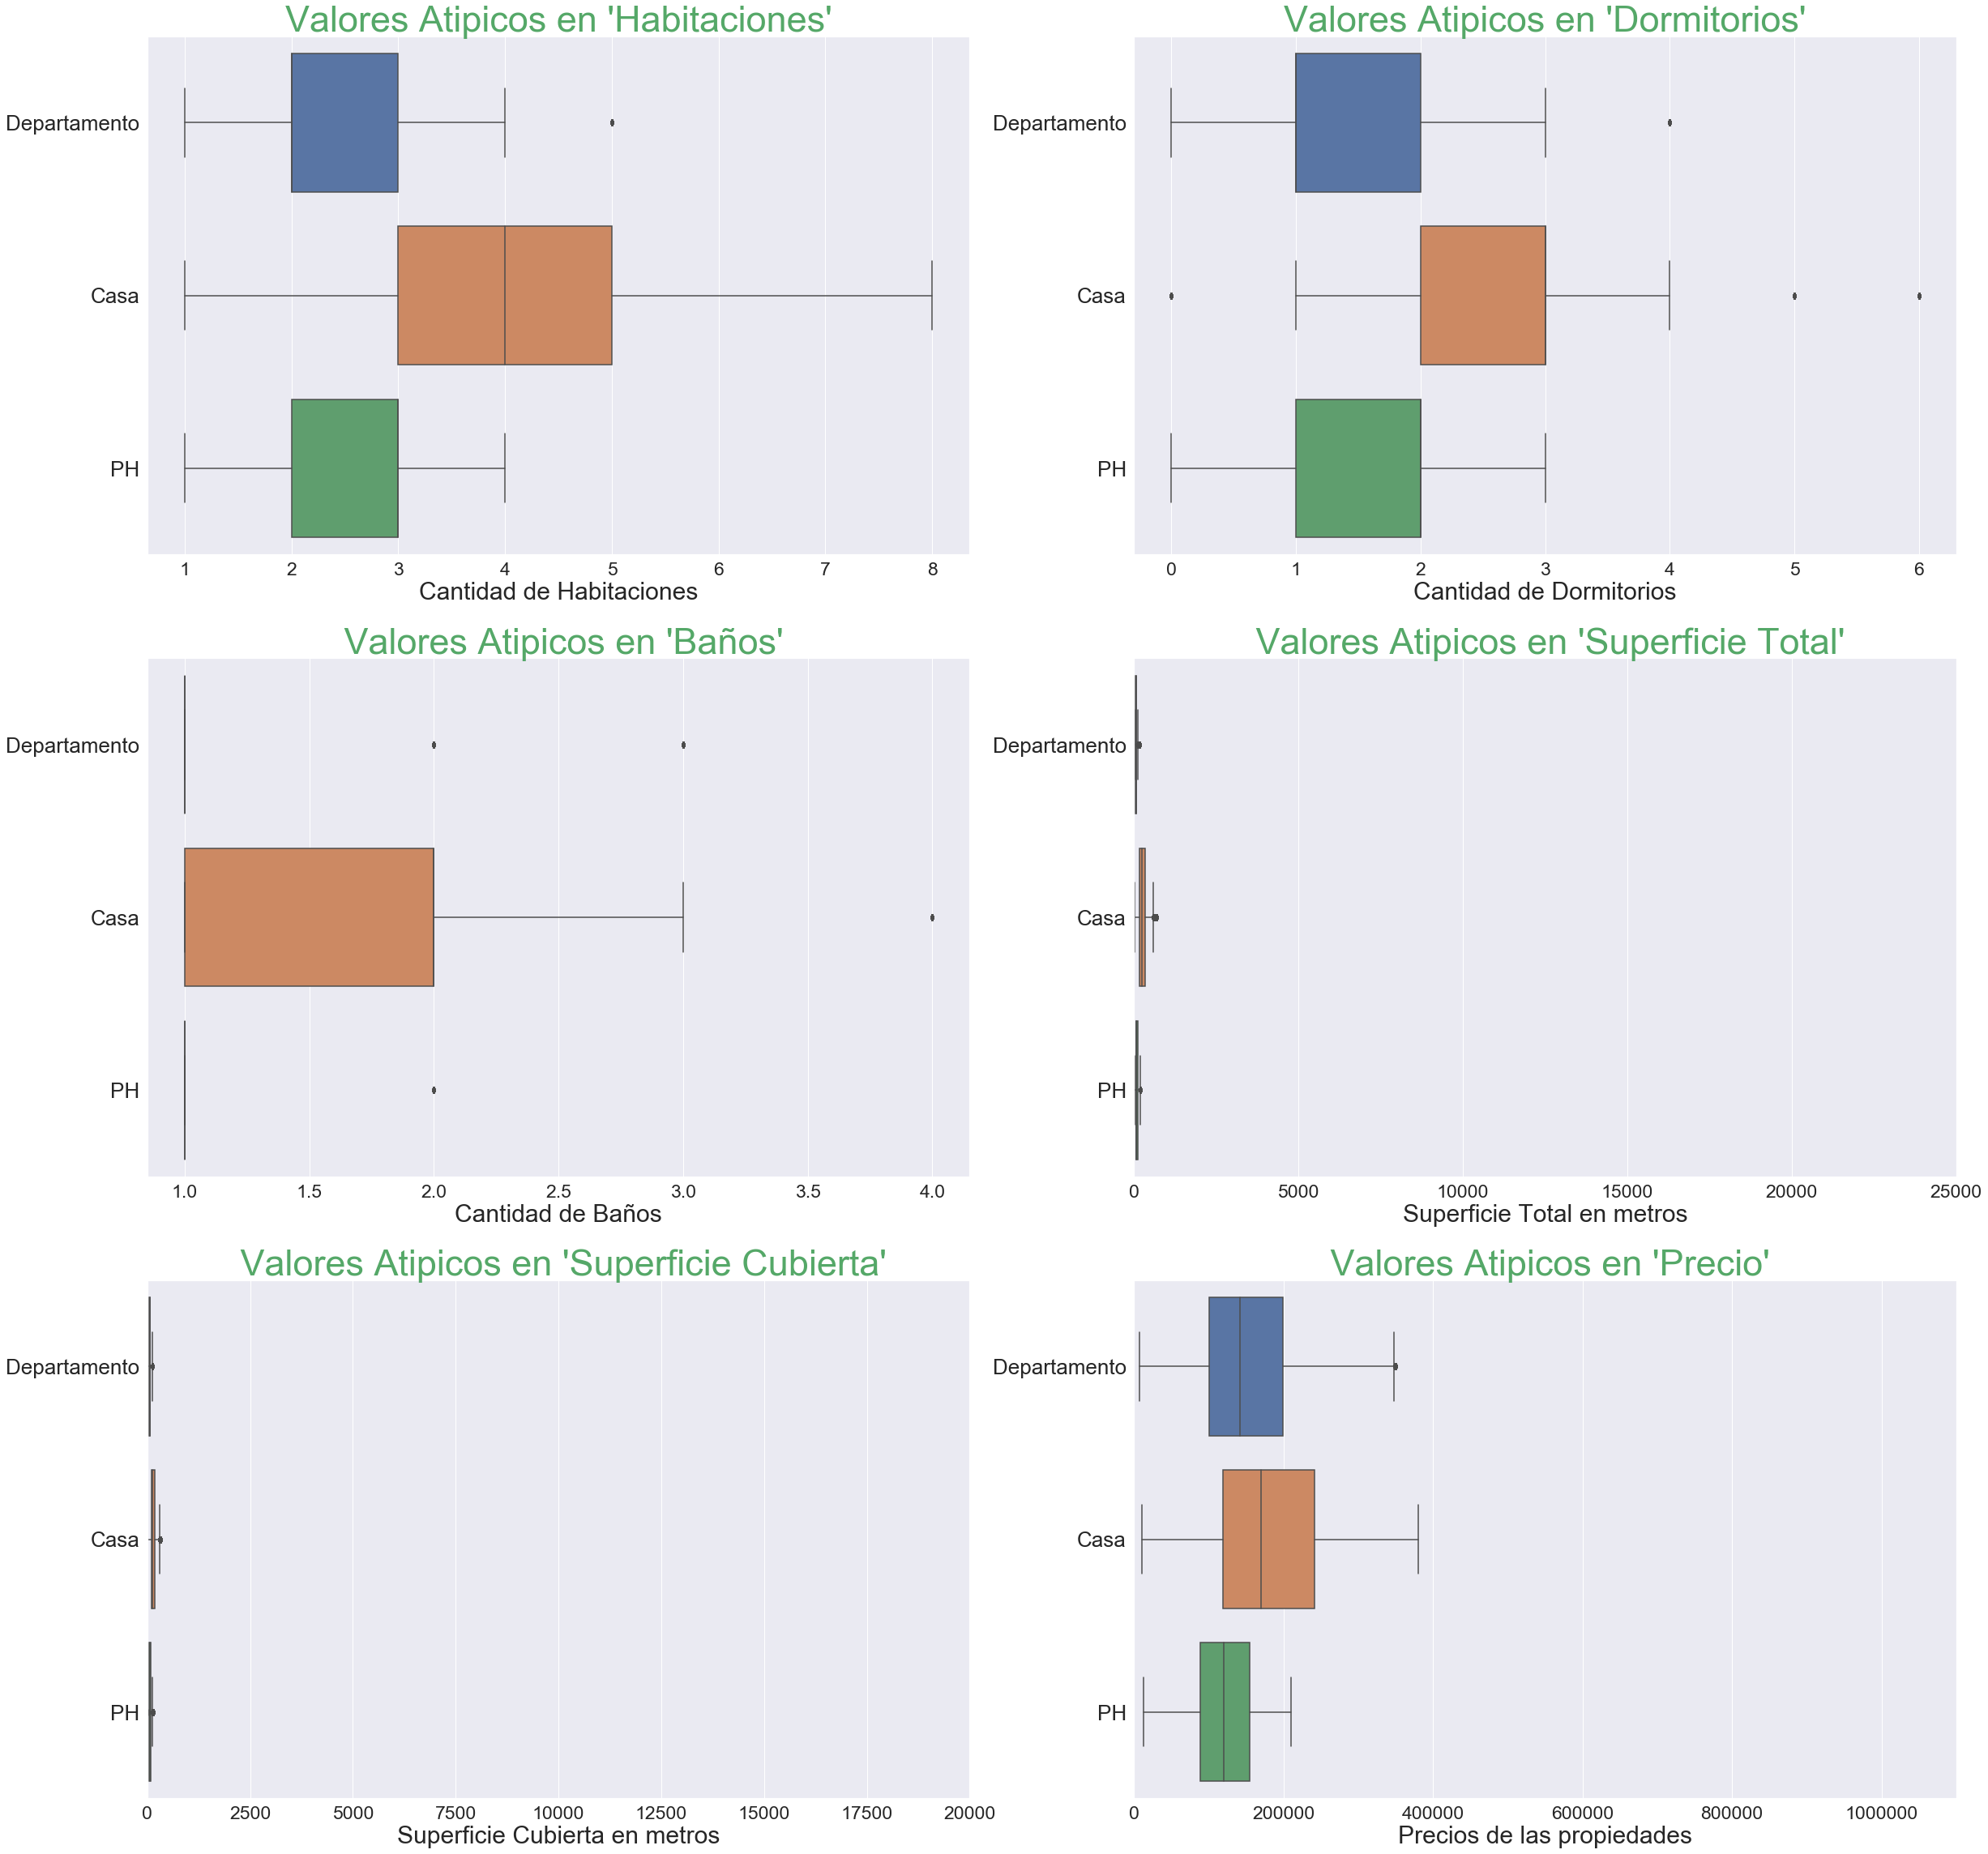

In [76]:
boxplot(df5)

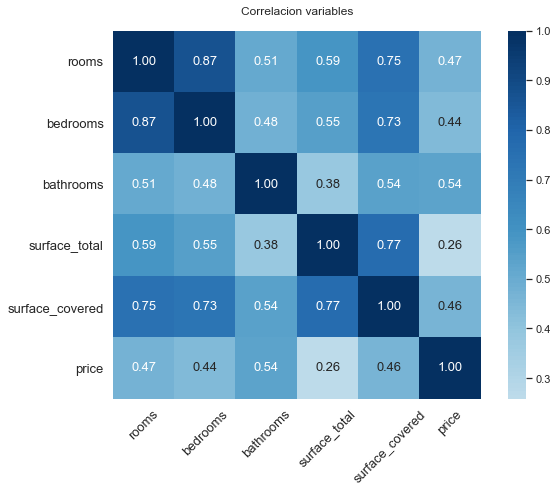

In [77]:
heatmap(df5)

**ATIPICOS CON ISOLATION FOREST**

In [78]:
from pyod.models.iforest import IForest

In [79]:
X= df1[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]]

In [80]:
X= X.fillna(X.mean())

In [81]:
clf= IForest()

In [82]:
clf.fit(X)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [83]:
y_pred = clf.predict(X)

In [84]:
X[y_pred == 1].shape # Outliers

(14080, 6)

In [85]:
df6.drop(index=X[y_pred == 1].index, inplace= True)

In [86]:
df6.describe()

rooms       bedrooms      bathrooms  surface_total  \
count  126742.000000  126742.000000  123190.000000  110430.000000   
mean        2.858074       1.840874       1.438055     100.548664   
std         1.046406       0.906797       0.648346      97.454023   
min         1.000000       0.000000       1.000000      10.000000   
25%         2.000000       1.000000       1.000000      50.000000   
50%         3.000000       2.000000       1.000000      72.000000   
75%         4.000000       2.000000       2.000000     113.000000   
max         7.000000       5.000000       4.000000    2595.000000   

       surface_covered         price  
count    110159.000000  1.267420e+05  
mean         74.938217  1.914699e+05  
std          41.046994  1.234474e+05  
min           1.000000  6.000000e+03  
25%          45.000000  1.097000e+05  
50%          63.000000  1.580000e+05  
75%          92.000000  2.390000e+05  
max         351.000000  1.200000e+06

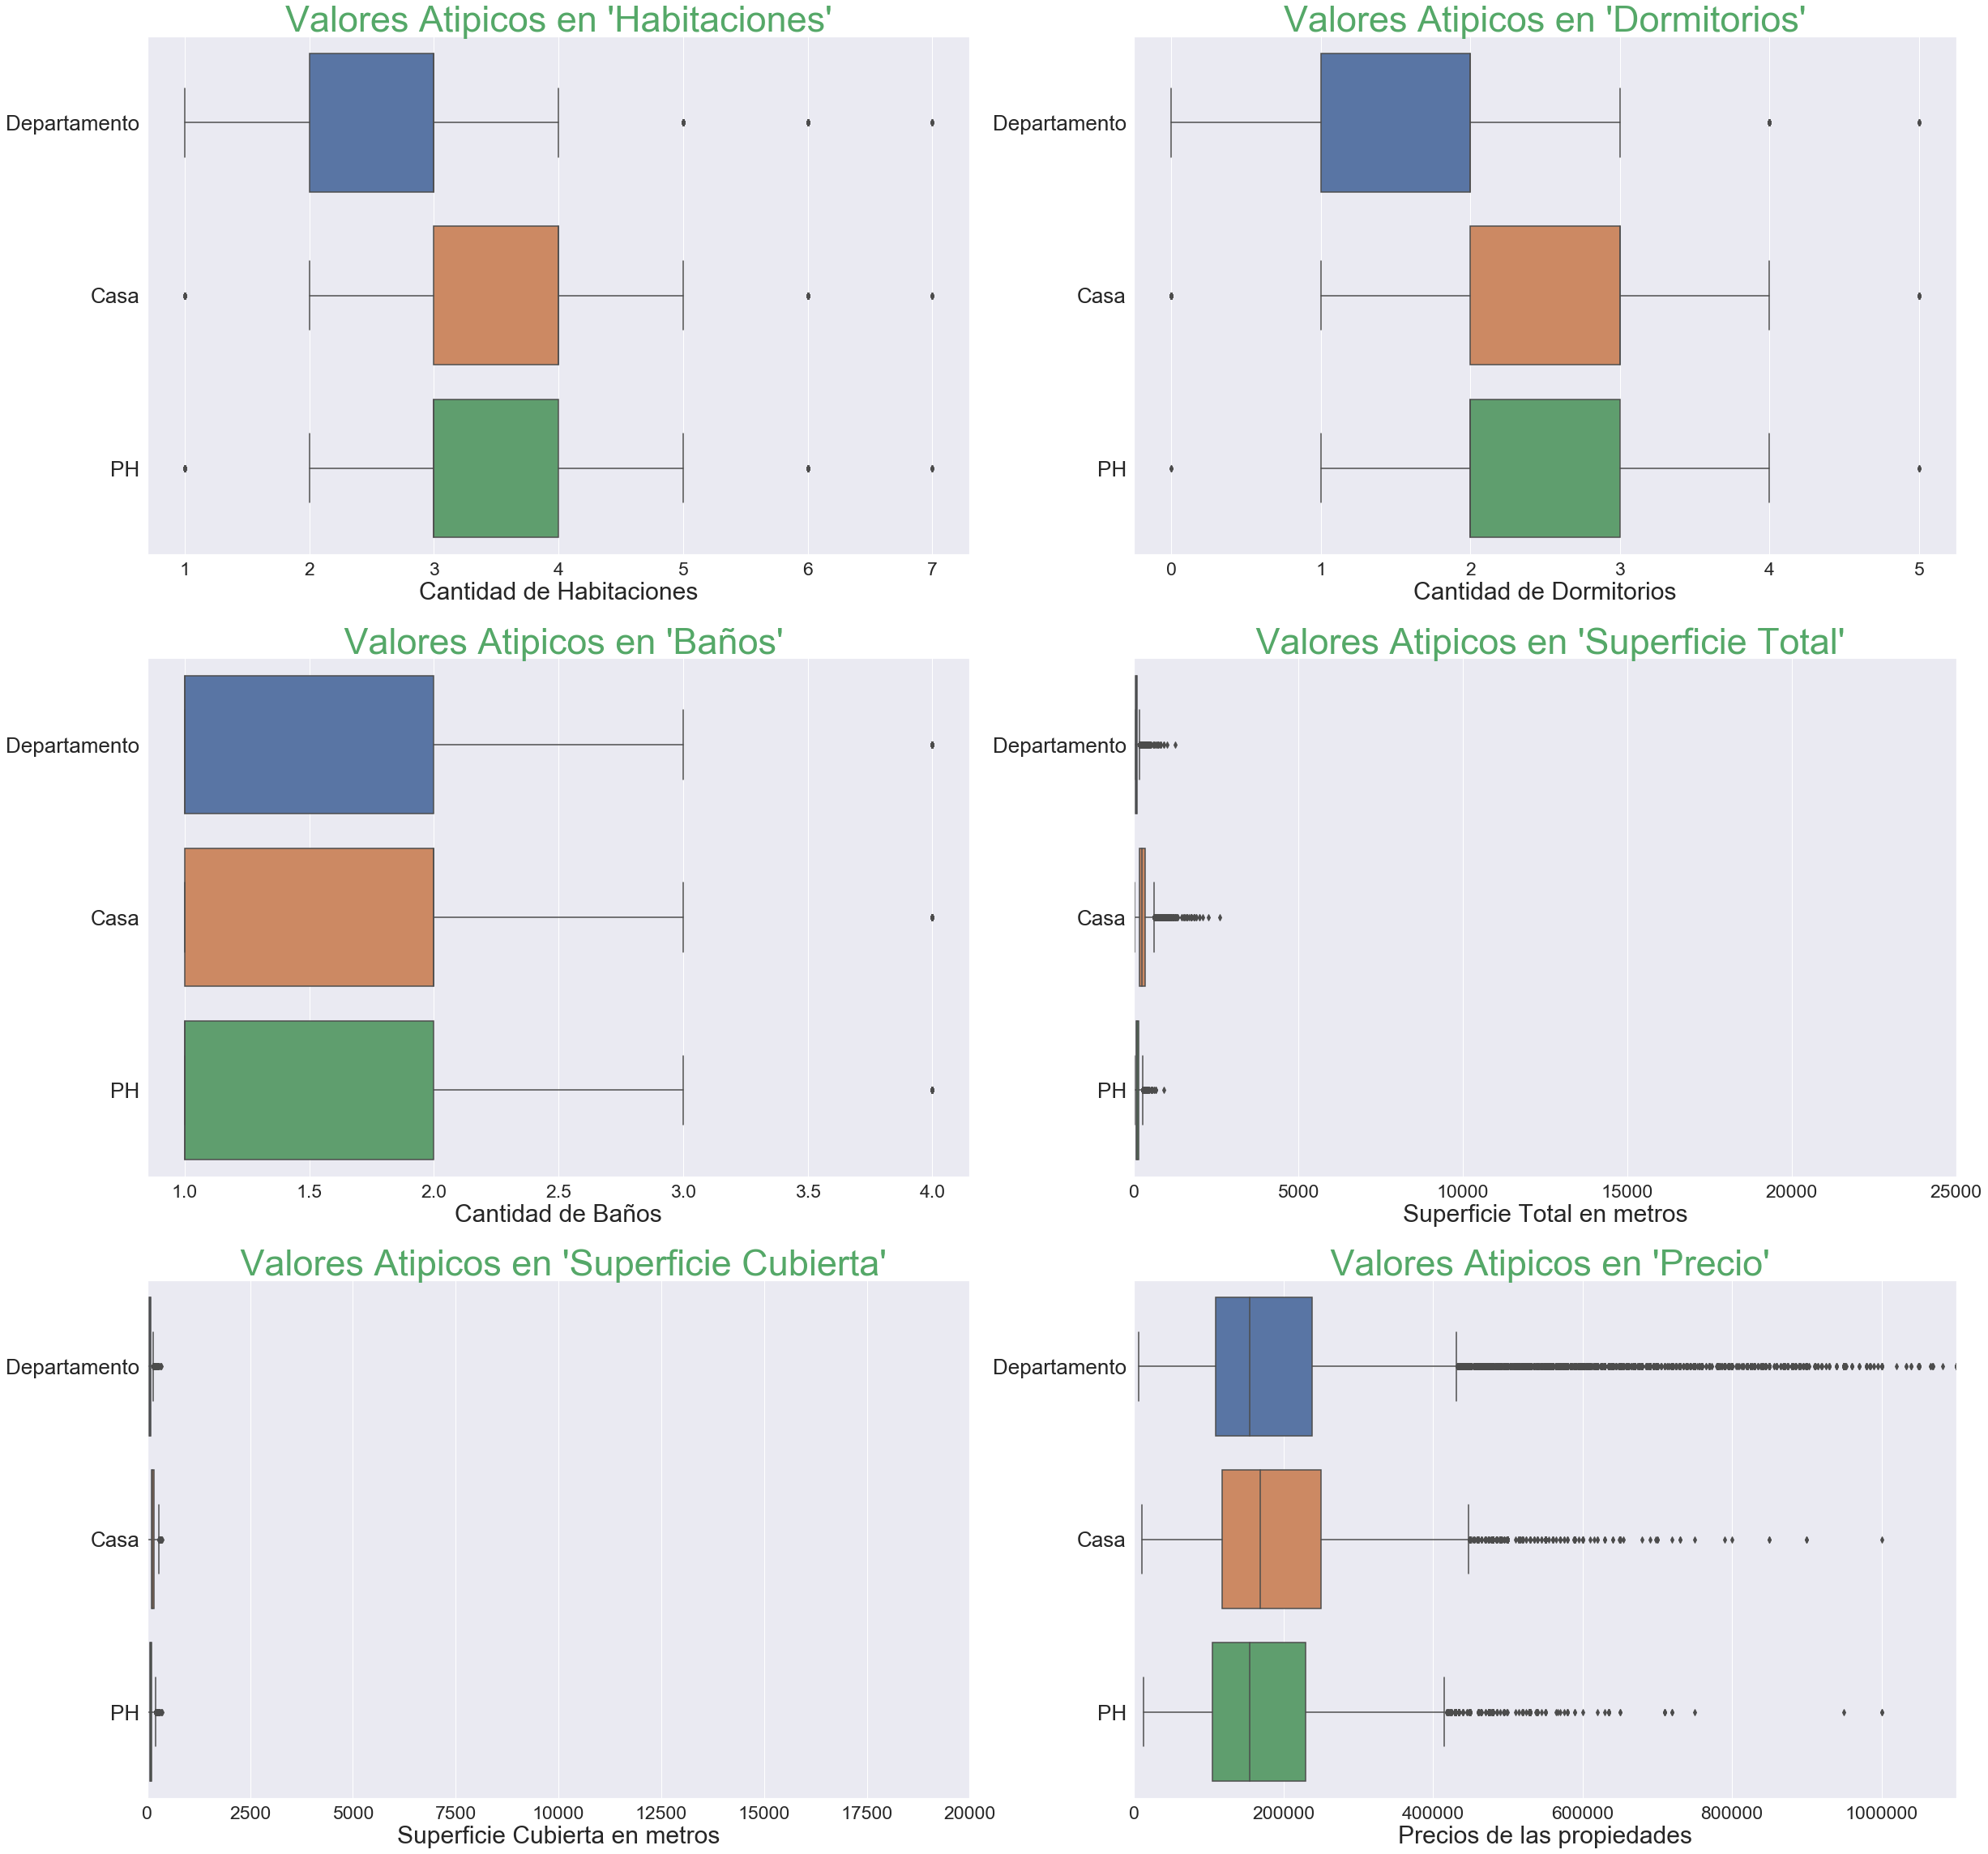

In [87]:
boxplot(df6)

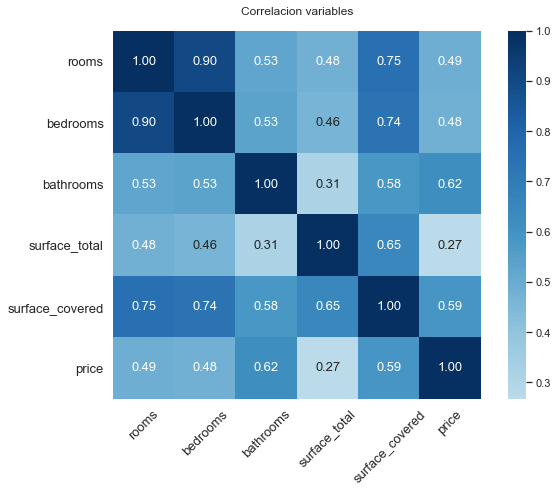

In [88]:
heatmap(df6)

In [89]:
print("Dataframe curado de Outliers con metodo IsolationForest de Pyod: ", df6.shape)

Dataframe curado de Outliers con metodo IsolationForest de Pyod:  (126742, 9)


**ATIPICOS CON LOCALOUTLIERFACTOR**

In [90]:
clf1= LocalOutlierFactor(n_neighbors= 5)

In [91]:
X= df1[["surface_total", "surface_covered", "rooms", "bathrooms", "bedrooms", "price"]].fillna(X.mean())

In [92]:
clf.fit(X)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [93]:
y_pred= clf.predict(X)

In [94]:
X[y_pred == 1].shape #Outliers

(14083, 6)

In [95]:
df7.drop(index=X[y_pred == 1].index, inplace=True)

In [96]:
df7.describe()

rooms       bedrooms      bathrooms  surface_total  \
count  126739.000000  126739.000000  123433.000000  110277.000000   
mean        2.859751       1.840728       1.439542      97.447700   
std         1.049863       0.914296       0.651886      82.586967   
min         1.000000       0.000000       1.000000      10.000000   
25%         2.000000       1.000000       1.000000      50.000000   
50%         3.000000       2.000000       1.000000      72.000000   
75%         4.000000       2.000000       2.000000     112.000000   
max         8.000000      12.000000       4.000000    1000.000000   

       surface_covered         price  
count    109998.000000  1.267390e+05  
mean         74.451290  1.927462e+05  
std          40.063117  1.266047e+05  
min           1.000000  6.000000e+03  
25%          45.000000  1.095000e+05  
50%          63.000000  1.580000e+05  
75%          92.000000  2.394720e+05  
max         332.000000  1.200000e+06

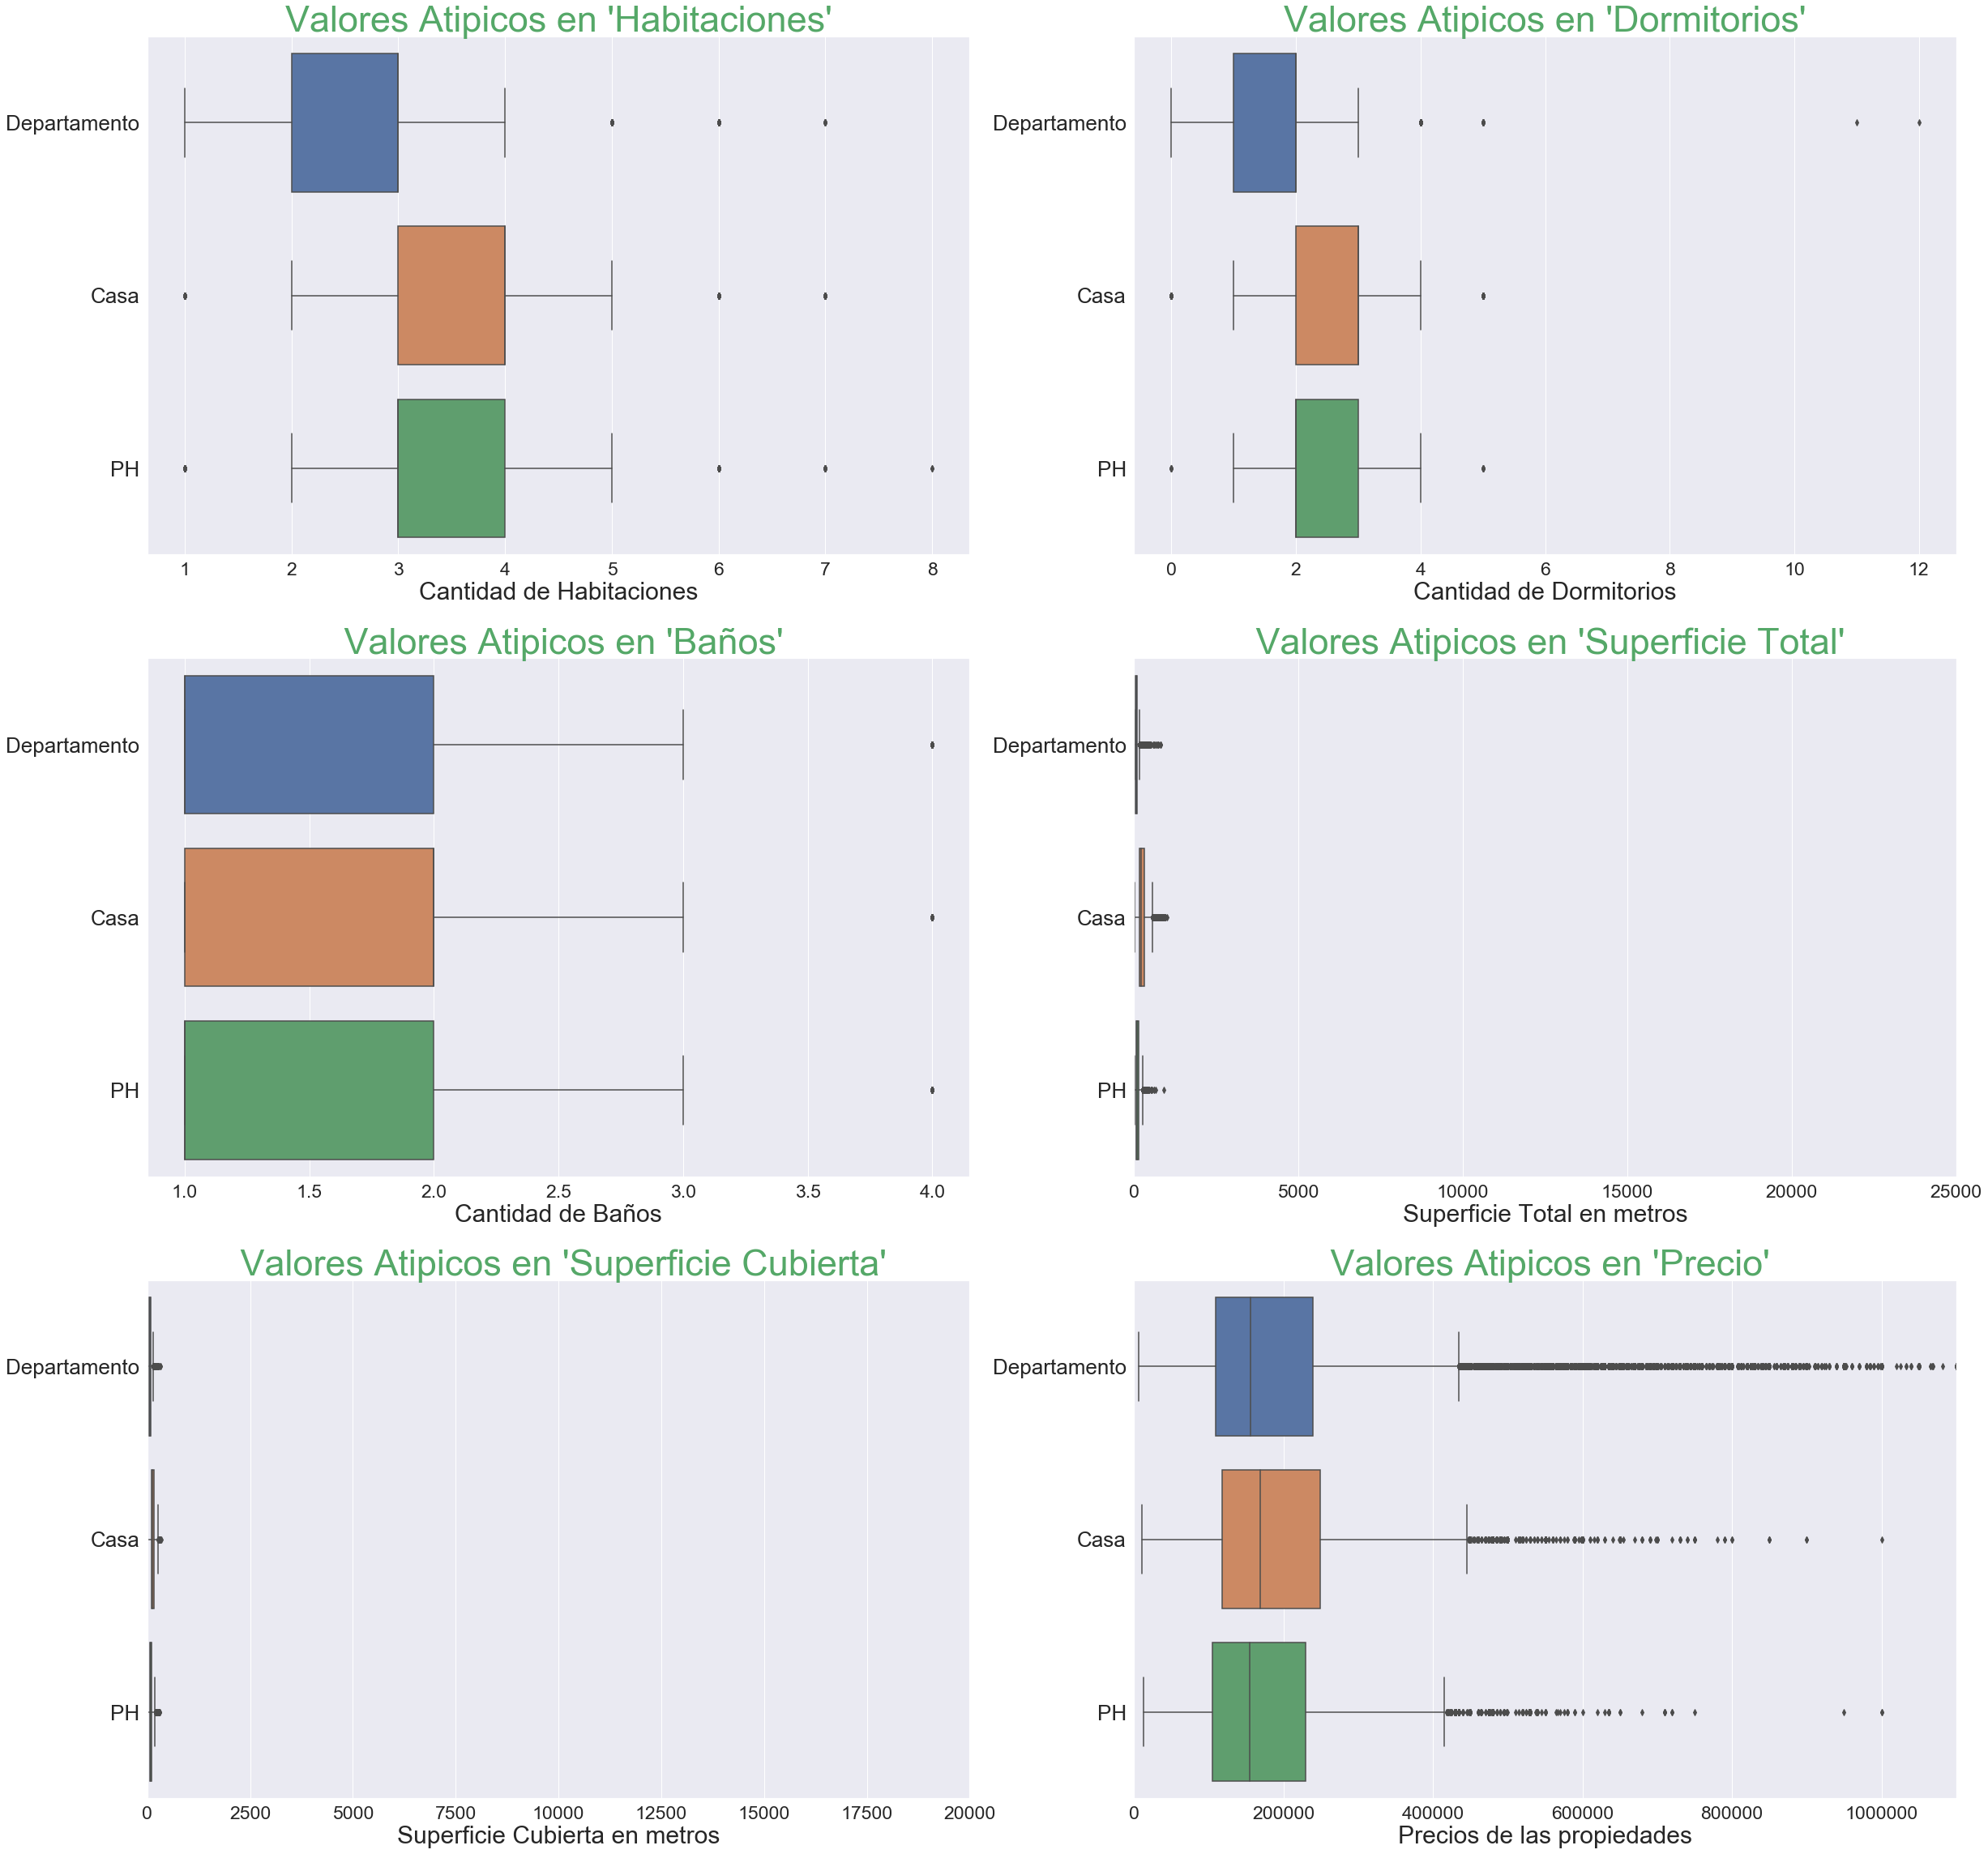

In [97]:
boxplot(df7)

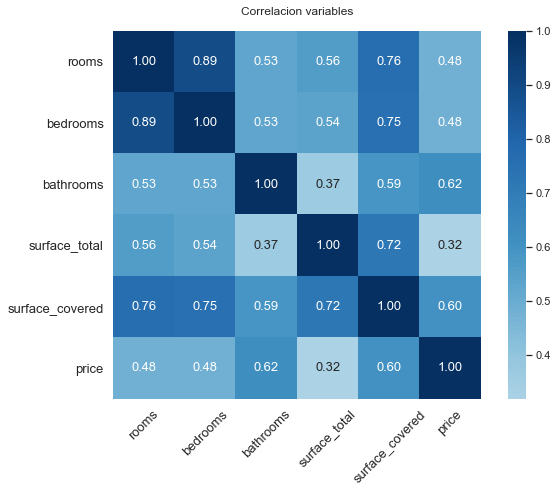

In [98]:
heatmap(df7)

In [99]:
print("Dataframe curado de Outliers con metodo LocalOutlierFactor: ", df7.shape)

Dataframe curado de Outliers con metodo LocalOutlierFactor:  (126739, 9)


**COMPARACION DE TODOS LOS METODOS DE ELIMACION DE OUTLIERS**

In [100]:
print("DataFrame Original con Outliers: ", df1.shape)
print("DataFrame curado de Outliers con MIS PARAMETROS: ", df5.shape)
print("DataFrame curado de Outliers con metodo IQR: ", df2.shape)
print("Dataframe curado de Outliers con metodo IsolationForest de Pyod: ", df6.shape)
print("Dataframe curado de Outliers con metodo LocalOutlierFactor: ", df7.shape)

DataFrame Original con Outliers:  (140822, 9)
DataFrame curado de Outliers con MIS PARAMETROS:  (110702, 9)
DataFrame curado de Outliers con metodo IQR:  (112876, 9)
Dataframe curado de Outliers con metodo IsolationForest de Pyod:  (126742, 9)
Dataframe curado de Outliers con metodo LocalOutlierFactor:  (126739, 9)


**CONLCUSION VALORES ATIPICOS**

Luego de evaluar todos los resultados de los 4 metodos empleados para la deteccion y eliminacion de Outliers, concluyo que **IQR** es, por mucho, el metodo mas fiable, de mejores resultado y , no por ultimo menos importante sino mas, el mas rapido y simple de implementar. 

Entonces **DF2** va a seguir siendo mi DataFrame para trabajar sobre este nuevo proyecto. Este mismo es el que voy a usar para evaluar con el modelo del *Proyecto 1*. Asi mismo, voy a recrear el mismo DataFrame usado en el proyecto anterior para compararlo con este nuevo que *cure* yo con mayores herramientas.

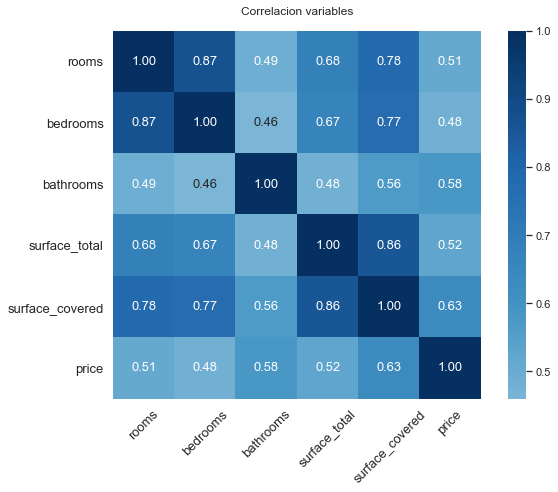

In [101]:
heatmap(df2)

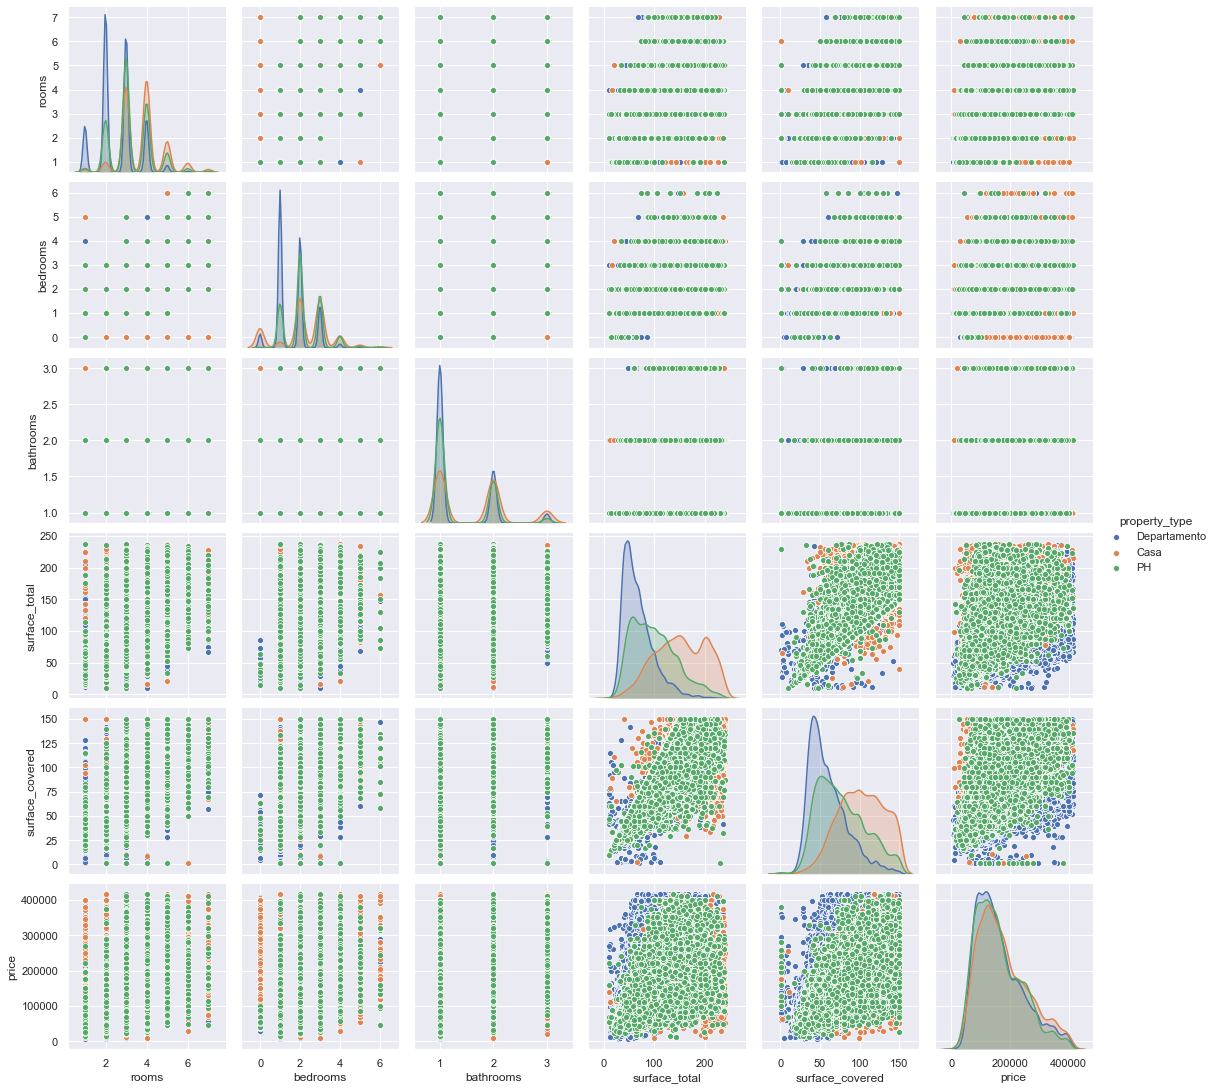

In [102]:
sns.pairplot(df2, hue="property_type")

In [103]:
df2["property_type"].value_counts()

Departamento    92844
PH              11941
Casa             8091
Name: property_type, dtype: int64

<h4><center>VALORES FALTANTES</center></h4> 

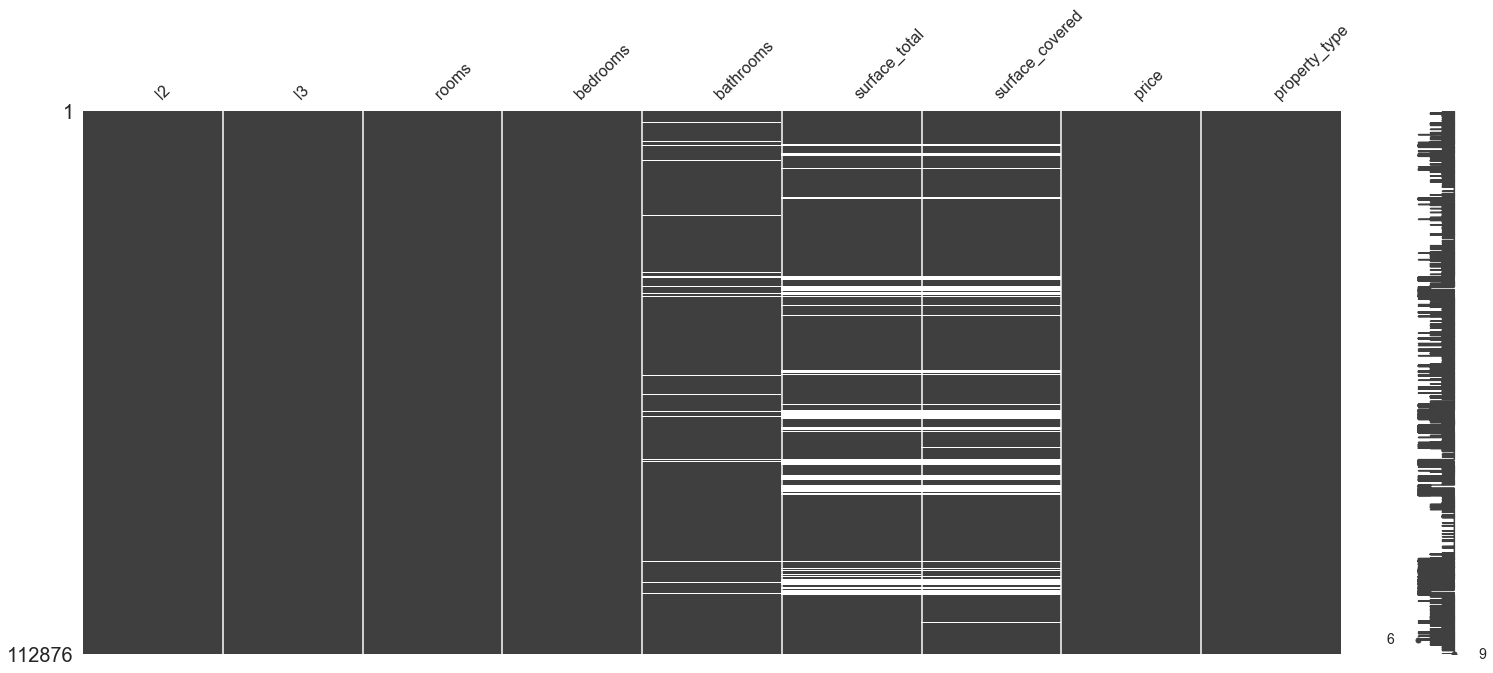

In [104]:
msno.matrix(df2)

* Se puede observar un claro patron en los Valores Faltantes de `surface_total` y `surface_covered`. Cuando una posee VF, la otra tambien. Esto me da a entender que: VF en `surface_total` y `surface_covered` son *MAR*. Su patrones son casi identicos, es decir alguna variable (quizas no observada) detona la no-respuesta en ambas.

* En cuanto a `bathrooms` puedo observar que existe una relacion en los patrones(poco clara) de VF pero no puedo encontrar una relacion en cuanto al *porque*, es decir considero que VF en `bathrooms` son *MCAR*.

Voy a descomprimir el DataFrame por tipos de propiedad una vez mas, para ver como se comportan estos VF segun el tipo de  propiedad.

In [105]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112876 entries, 11 to 146653
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   l2               112876 non-null  object 
 1   l3               112876 non-null  object 
 2   rooms            112876 non-null  float64
 3   bedrooms         112876 non-null  float64
 4   bathrooms        109273 non-null  float64
 5   surface_total    96338 non-null   float64
 6   surface_covered  96075 non-null   float64
 7   price            112876 non-null  float64
 8   property_type    112876 non-null  object 
dtypes: float64(6), object(3)
memory usage: 13.6+ MB


In [106]:
df2.corr()

rooms  bedrooms  bathrooms  surface_total  \
rooms            1.000000  0.871323   0.490911       0.684298   
bedrooms         0.871323  1.000000   0.459904       0.666326   
bathrooms        0.490911  0.459904   1.000000       0.477975   
surface_total    0.684298  0.666326   0.477975       1.000000   
surface_covered  0.779076  0.770237   0.564589       0.857522   
price            0.513617  0.482677   0.579947       0.524929   

                 surface_covered     price  
rooms                   0.779076  0.513617  
bedrooms                0.770237  0.482677  
bathrooms               0.564589  0.579947  
surface_total           0.857522  0.524929  
surface_covered         1.000000  0.633272  
price                   0.633272  1.000000

In [107]:
df2_depto= df2[df2["property_type"] == "Departamento"]
df2_casa= df2[df2["property_type"] == "Casa"]
df2_ph= df2[df2["property_type"] == "PH"]

In [108]:
# Gracias Dewith Mirarmón por esta funcion.

def missing_values_table(df):

    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    return mis_val_table_ren_columns

* Valores Faltantes en Dataframe Original

In [109]:
missing_values_table(df2)

Your selected dataframe has 9 columns.
There are 3 columns that have missing values.


Missing Values  % of Total Values
surface_covered           16801               14.9
surface_total             16538               14.7
bathrooms                  3603                3.2

* Valores Faltantes en Departamentos

In [110]:
missing_values_table(df2_depto)

Your selected dataframe has 9 columns.
There are 3 columns that have missing values.


Missing Values  % of Total Values
surface_covered           12788               13.8
surface_total             12515               13.5
bathrooms                  2557                2.8

* Valores Faltantes en Casas

In [111]:
missing_values_table(df2_casa)

Your selected dataframe has 9 columns.
There are 3 columns that have missing values.


Missing Values  % of Total Values
surface_total              3906               48.3
surface_covered            3869               47.8
bathrooms                   897               11.1

* Valores Faltantes en Phs

In [112]:
missing_values_table(df2_ph)

Your selected dataframe has 9 columns.
There are 3 columns that have missing values.


Missing Values  % of Total Values
bathrooms                   149                1.2
surface_covered             144                1.2
surface_total               117                1.0

En una observacion mas profunda, se observa que la gran mayoria de los Valores Faltantes se encuentra en el tipo de propiedad **Casa** , la cual a su ves es la que menos instancias tiene el Dataframe.

* Imputando Valores Faltantes con *Mediana*

In [113]:
imp_median = SimpleImputer(strategy='median')
data_imp_median= df2.copy()
columns= ["bathrooms", "surface_total", "surface_covered"]
imp_median.fit(data_imp_median[columns])
data_imp_median[columns]= imp_median.transform(data_imp_median[columns])

* Imputando Valores Faltantes con *Promedio*

In [114]:
imp_mean= SimpleImputer(strategy="mean")
data_imp_mean= df2.copy()
columns=["bathrooms", "surface_total", "surface_covered"]
imp_mean.fit(data_imp_mean[columns])
data_imp_mean[columns]= imp_mean.transform(data_imp_mean[columns])

* Imputando Valores Faltantes con **IterativeImputer**

* * Creo 3 Iteradores distintos:

                             _ 'estimator' = default
                             _ 'estimator' = ExtraTreesRegressor
                             _ 'estimator' = KNeigborsRegressor

In [115]:
imp_itt_bys= IterativeImputer(max_iter= 7, random_state=42, sample_posterior=True)
imp_itt_etr= IterativeImputer(ExtraTreesRegressor(), max_iter=7,  random_state=42)
imp_itt_knn= IterativeImputer(KNeighborsRegressor(), max_iter= 9, random_state= 42)

In [116]:
data_imp_itt_bys= df2.copy()
columns=["rooms","bedrooms","bathrooms","surface_total","surface_covered"]
imp_itt_bys.fit(data_imp_itt_bys[columns])
data_imp_itt_bys[columns]= imp_itt_bys.transform(data_imp_itt_bys[columns]).round()

In [117]:
data_imp_itt_etr= df2.copy()
columns=["rooms","bedrooms","bathrooms","surface_total","surface_covered"]
imp_itt_etr.fit(data_imp_itt_etr[columns])
data_imp_itt_etr[columns]= imp_itt_etr.transform(data_imp_itt_etr[columns]).round()

In [118]:
data_imp_itt_knn= df2.copy()
columns=["rooms","bedrooms","bathrooms","surface_total","surface_covered"]
imp_itt_knn.fit(data_imp_itt_knn[columns])
data_imp_itt_knn[columns]= imp_itt_knn.transform(data_imp_itt_knn[columns])

In [119]:
# Gracias Dewith Mirármon por esta funcion

def impute_scatter_compare(df_original, df_imputed, var_null, vars_compare):

    plt.figure(figsize=(len(df_imputed)*4.5, len(vars_compare)*3.5))
    plt.subplots_adjust(wspace=0.15, hspace=0.15)
    plot_num = 1
    for i, var in enumerate(vars_compare):
        for name, df in df_imputed:
            plt.subplot(len(vars_compare), len(df_imputed), plot_num)
            if i == 0:
                plt.title(name, fontsize=16, color='r')

            nulls = df_original.isnull()[var_null].astype(int)

            sns.scatterplot(var_null, var, data=df[nulls == 0], s=25)
            sns.scatterplot(var_null, var, data=df[nulls == 1], s=25)

            cols = len(df_imputed)
            filas = len(vars_compare)
            n_plots = cols * filas

            x_labels = list(np.arange(n_plots-cols+1, n_plots + 1))
            if plot_num in x_labels:
                plt.xlabel(var_null, fontsize=15, color='g')
            else:
                plt.xlabel('')
                plt.xticks(())

            y_labels = [1]
            while len(y_labels) < filas:
                y_labels.append(y_labels[-1]+cols)
                if len(y_labels) == filas:
                    continue
            if plot_num in y_labels:
                plt.ylabel(var, rotation=0, fontsize=20, labelpad=30)
            else:
                plt.ylabel('')
                plt.yticks(())
            plot_num += 1
    plt.show()

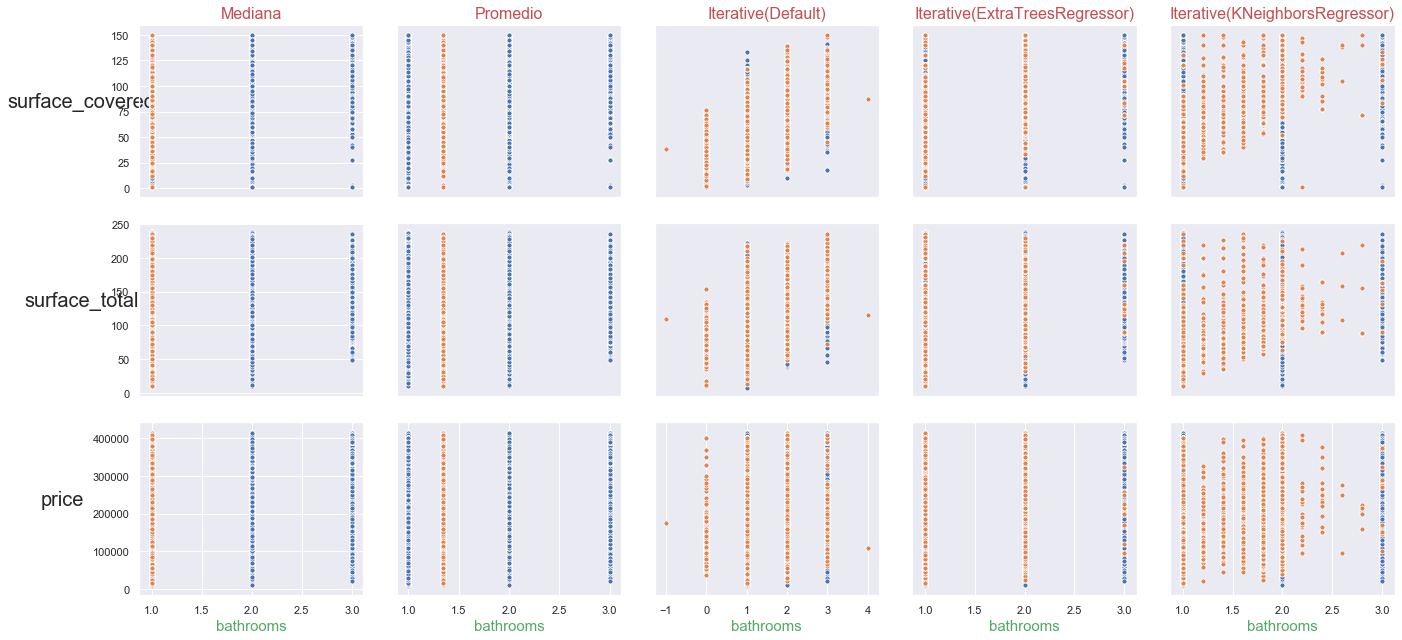

In [120]:
df_imputed = [('Mediana', data_imp_median), ('Promedio', data_imp_mean),
              ('Iterative(Default)', data_imp_itt_bys), ('Iterative(ExtraTreesRegressor)', data_imp_itt_etr),
              ('Iterative(KNeighborsRegressor)', data_imp_itt_knn)]

var_null = 'bathrooms'
vars_compare = ["surface_covered", "surface_total","price"]

impute_scatter_compare(df2, df_imputed, var_null, vars_compare)

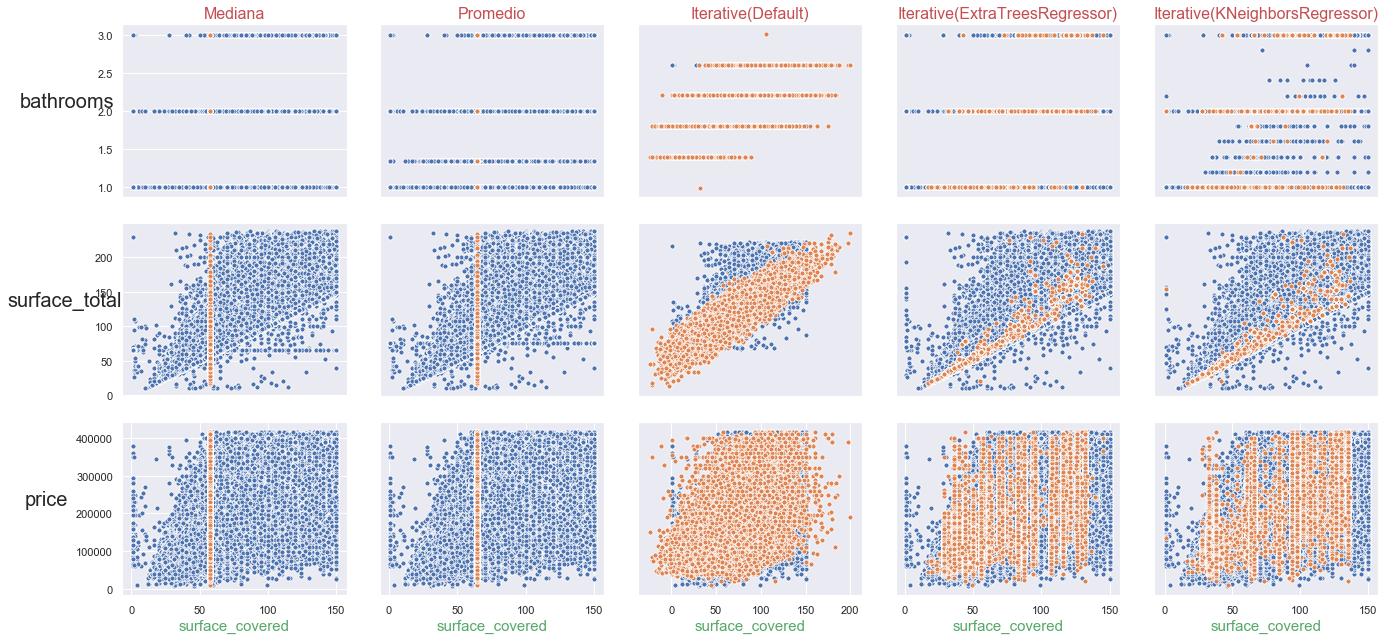

In [121]:
var_null = 'surface_covered'
vars_compare = ["bathrooms", "surface_total","price"]

impute_scatter_compare(df2, df_imputed, var_null, vars_compare)

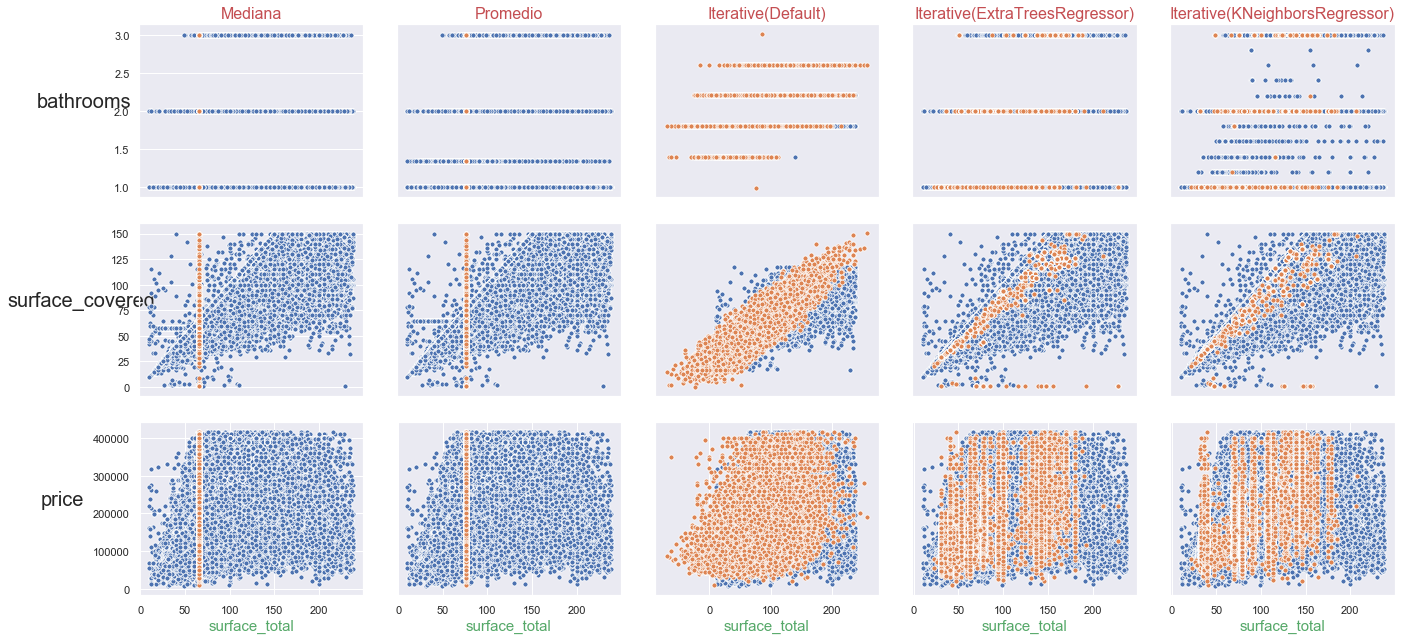

In [122]:
var_null = 'surface_total'
vars_compare = ["bathrooms", "surface_covered","price"]

impute_scatter_compare(df2, df_imputed, var_null, vars_compare)

* Luego de comparar los distintos estimadores usados en *ItertiveImputer* y observar sus resultados, puedo concluir que *KNeighborsRegressor* es el estimador que mejor se comporta para imputar los valores faltantes en `bathrooms`, `surface_total`y `surface_covered`.


* Una vez elegido el modelo para imputar los VF, realizo un GridSearchCV para obtener el mejor numero de vecinos para *KNeighborsRegressor*

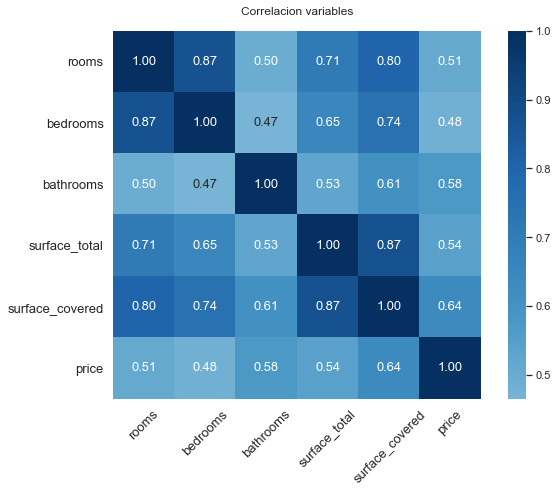

In [123]:
heatmap(data_imp_itt_knn)

In [124]:
param_grid = {'n_neighbors': np.arange(1, 30, 1),
              'weights': ['uniform', 'distance'],
              'leaf_size': np.arange(1, 20, 1)}

knn = KNeighborsRegressor()

X = data_imp_itt_knn.loc[:, ["bathrooms", "surface_total"]]
Y = data_imp_itt_knn.loc[:, ["surface_covered"]]

In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [126]:
model= GridSearchCV(knn, param_grid, cv=5, n_jobs= -1)

In [127]:
model.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [128]:
print(model.best_estimator_)

KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                    weights='distance')


In [129]:
print(model.best_score_)

0.8543203393311168


* ImputandoValores Faltantes **definitivamente** con IterativeImputer(estimator= KneighborsRegressor)

In [130]:
df_imp= df2.copy()

knr = KNeighborsRegressor(algorithm='auto', leaf_size=4,
                          metric='minkowski', n_neighbors=19, weights='distance')

itt_imp = IterativeImputer(estimator=knr, max_iter=9, random_state=42)

columns = ["rooms", "bedrooms", "bathrooms",
           "surface_total", "surface_covered"]

itt_imp.fit(df_imp[columns])

df_imp[columns] = itt_imp.transform(df_imp[columns])

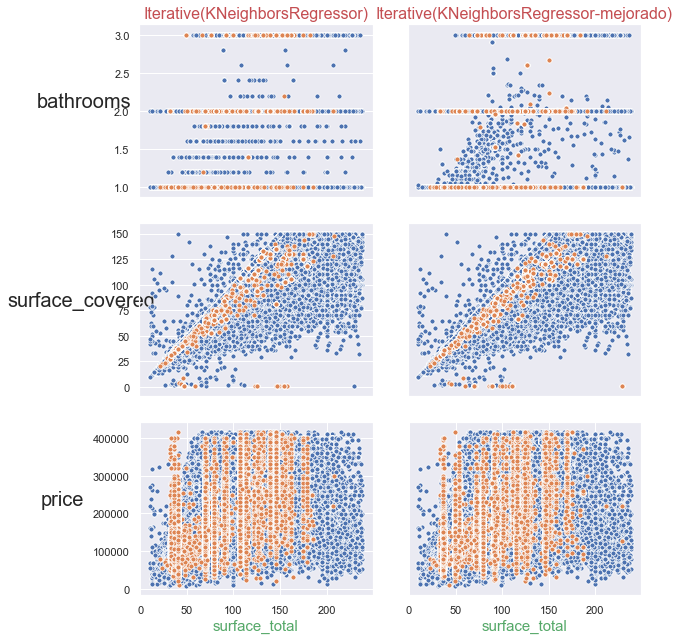

In [131]:
df_imputed = [('Iterative(KNeighborsRegressor)', data_imp_itt_knn),
              ('Iterative(KNeighborsRegressor-mejorado)', df_imp)]

var_null = 'surface_total'

vars_compare = ["bathrooms", "surface_covered", "price"]

impute_scatter_compare(df2, df_imputed, var_null, vars_compare)

**CONLCUSION VALORES FALTANTES**

* Habiendo imputado los VF con IterativeImputer paso a trabajar con **df_imp**, el cual es el mismo que **df2** *pero* sin VF

* Realizo una ultima limpieza de los datos: Remplazo por "surface_total" todas aquellas instancias que tengan "surface_covered" mayor a la total.

In [132]:
for df_imp[df_imp.surface_covered > df_imp.surface_total] in df_imp:
    
    df_imp[df_imp.surface_covered == df_imp.surface_total]

<h4><center>ENCODING</center></h4> 

**ANALIZANDO CANTIDAD DE PROPIEDADES POR ZONAS**

In [133]:
print("Porcentaje de propiedades que representa Capital Federal: ", "{0:.0%}".format
      (df_imp[df_imp["l2"] == "Capital Federal"].shape[0]/df_imp.shape[0]))

print("Porcentaje de propiedades que representa Bs As G.B.A Zona Norte: ", "{0:.0%}".format
      (df_imp[df_imp["l2"] == "Bs.As. G.B.A. Zona Norte"].shape[0]/df_imp.shape[0]))

print("Porcentaje de propiedades que representa Bs As G.B.A Zona Sur: ", "{0:.0%}".format
      (df_imp[df_imp["l2"] == "Bs.As. G.B.A. Zona Sur"].shape[0]/df_imp.shape[0]))

print("Porcentaje de propiedades que representa Bs As G.B.A Zona Oeste: ", "{0:.0%}".format
      (df_imp[df_imp["l2"] == "Bs.As. G.B.A. Zona Oeste"].shape[0]/df_imp.shape[0]))

Porcentaje de propiedades que representa Capital Federal:  67%
Porcentaje de propiedades que representa Bs As G.B.A Zona Norte:  15%
Porcentaje de propiedades que representa Bs As G.B.A Zona Sur:  10%
Porcentaje de propiedades que representa Bs As G.B.A Zona Oeste:  8%


In [134]:
 df_imp[df_imp["l2"] == "Capital Federal"].property_type.value_counts()

Departamento    66510
PH               7872
Casa              958
Name: property_type, dtype: int64

In [135]:
 df_imp[df_imp["l2"] != "Capital Federal"].property_type.value_counts()

Departamento    25664
Casa             7031
PH               4020
l2                821
Name: property_type, dtype: int64

In [136]:
print("\n Porcentaje de propiedades en todas las zonas de G.B.A: ", "{0:.0%}".format
      (df_imp[df_imp["l2"] != "Capital Federal"].shape[0]/df_imp.shape[0]))

print("\n Porcentaje de propiedades en Capital Federal: ", "{0:.0%}".format
      (df_imp[df_imp["l2"] == "Capital Federal"].shape[0]/df_imp.shape[0]))


 Porcentaje de propiedades en todas las zonas de G.B.A:  33%

 Porcentaje de propiedades en Capital Federal:  67%


* Luego de observar como se distribuyen todas las propiedades, veo que: Por seperado no represetan un *peso* simbolico para el analizs en el  Dataset,solamente juntas! Por esta razon; para comparar con el Dataset del *Proyecto 1* voy a trabajar solo con la **zona Capital Federal** y continuare con esta practica a lo largo del proyecto

In [137]:
df_imp.shape

(112876, 9)

In [138]:
df1= df_imp[df_imp["l2"]=="Capital Federal"]
df1.drop(columns="l2", inplace=True)

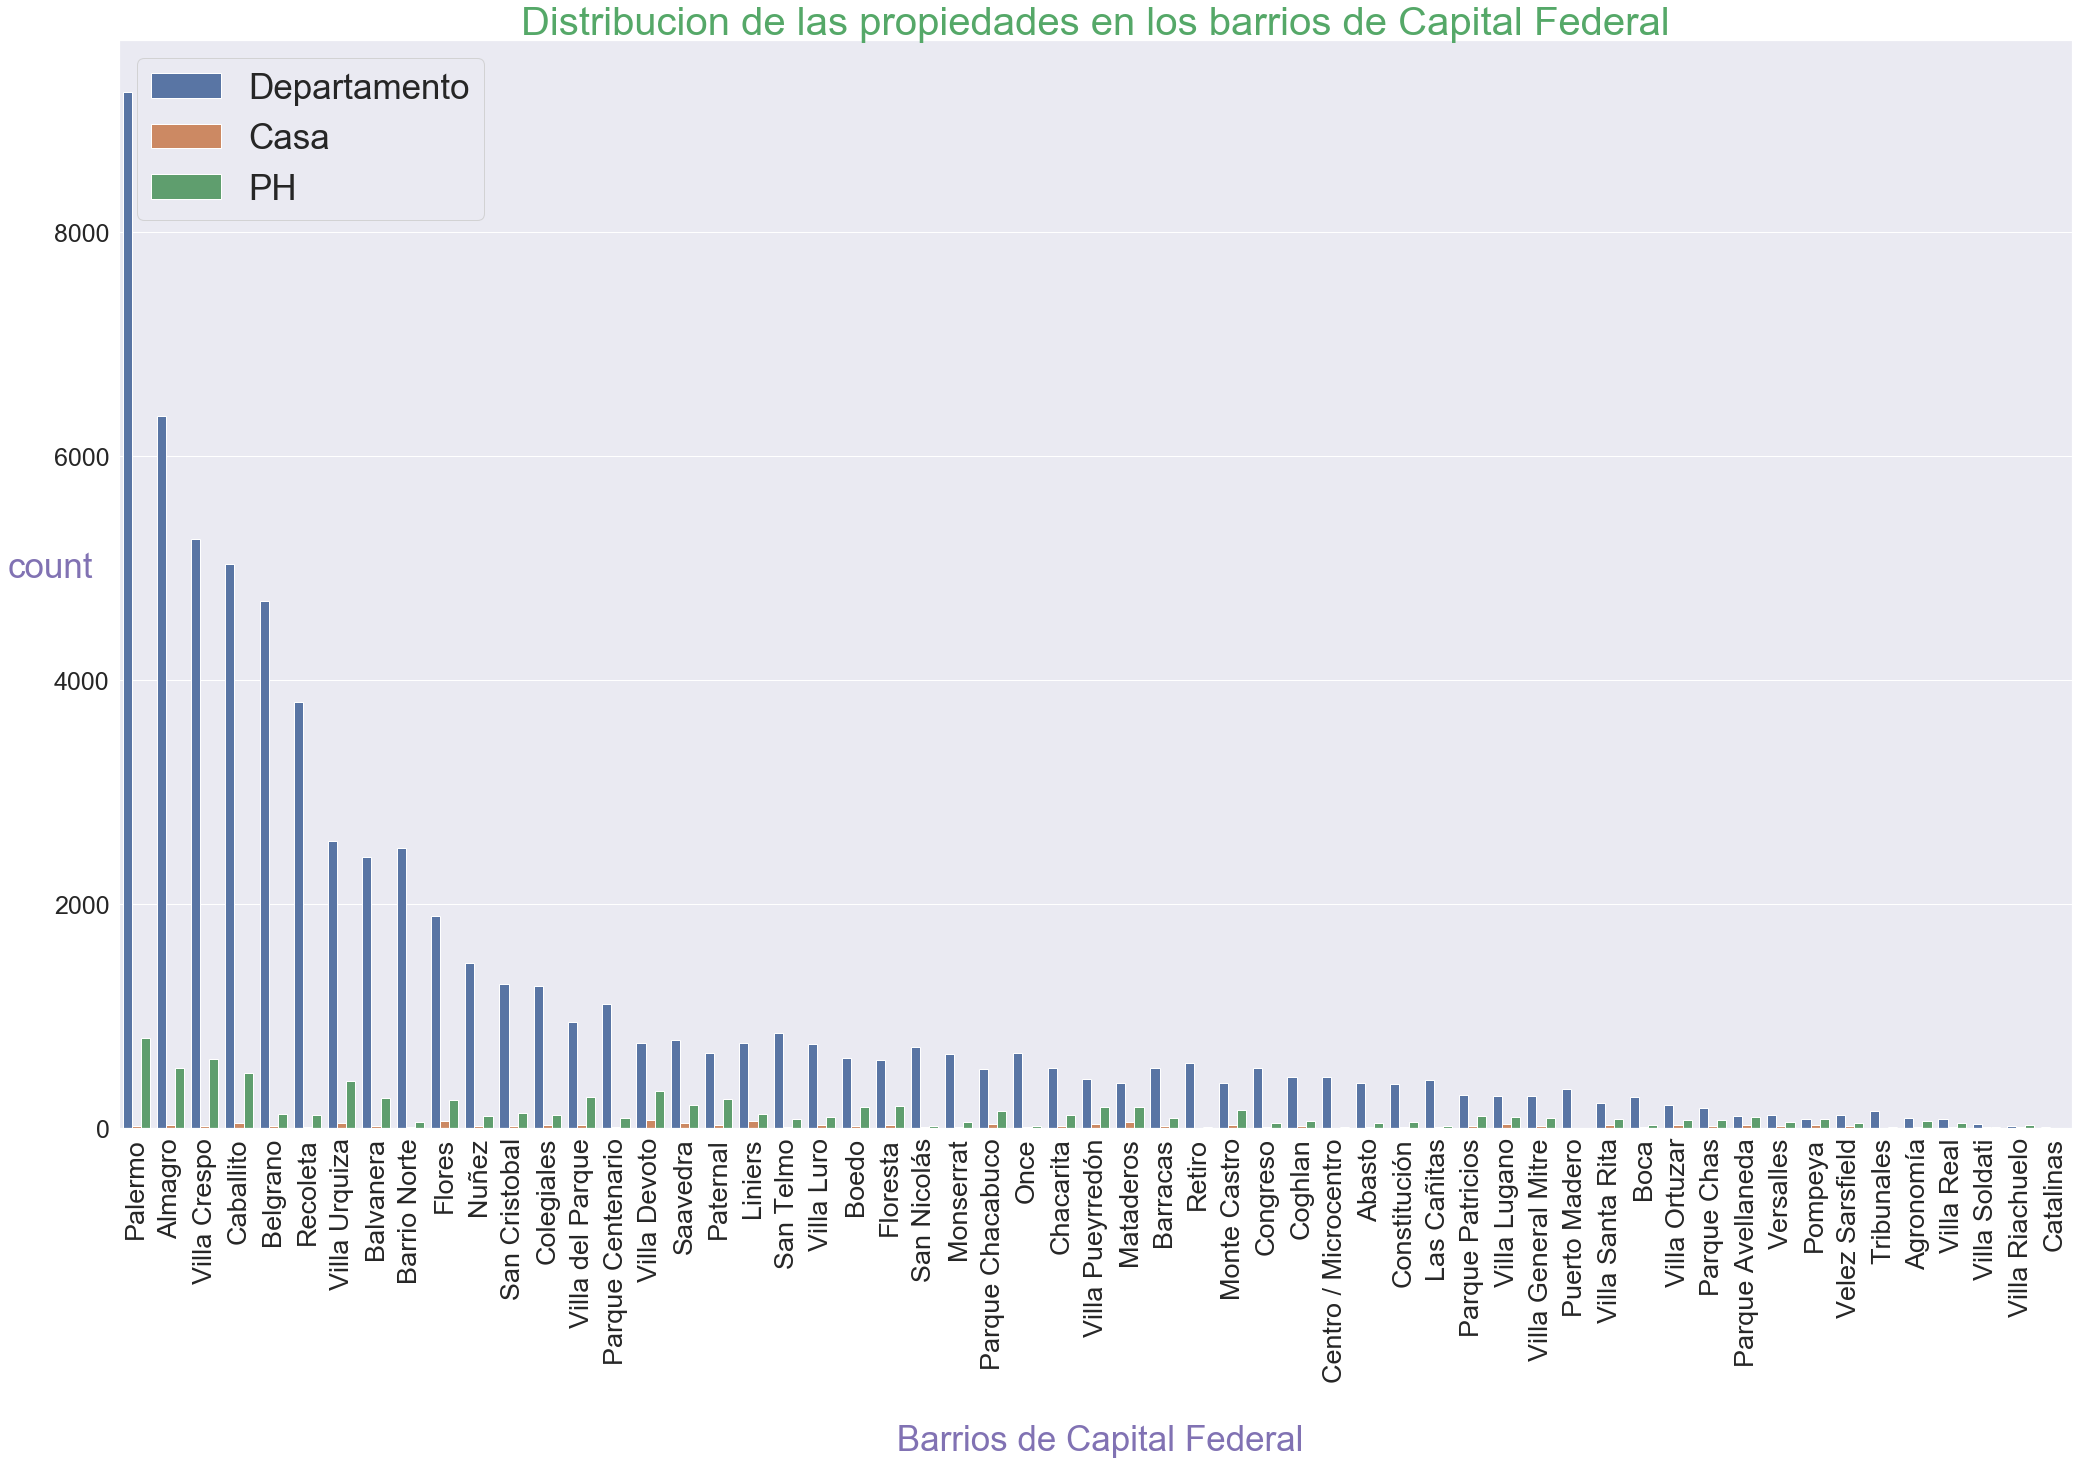

In [139]:
plt.figure(figsize=(35, 20))

sns.countplot(data=df1, x="l3", hue="property_type",
              order=df1["l3"].value_counts().index)

plt.title("Distribucion de las propiedades en los barrios de Capital Federal",
          fontsize=40, color="g")

plt.xticks(rotation=90, fontsize=27)
plt.yticks(fontsize=25)
plt.ylabel("count", rotation=0, fontsize=35, color="m")
plt.xlabel("\n Barrios de Capital Federal", fontsize=35, color="m")
plt.legend(fontsize=35)
plt.show()

* Enconding `l3`(zonas) y `property_type`

In [140]:
le = LabelEncoder()
le.fit(df1['l3'])
barrios_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(barrios_mapping)

{'Abasto': 0, 'Agronomía': 1, 'Almagro': 2, 'Balvanera': 3, 'Barracas': 4, 'Barrio Norte': 5, 'Belgrano': 6, 'Boca': 7, 'Boedo': 8, 'Caballito': 9, 'Catalinas': 10, 'Centro / Microcentro': 11, 'Chacarita': 12, 'Coghlan': 13, 'Colegiales': 14, 'Congreso': 15, 'Constitución': 16, 'Flores': 17, 'Floresta': 18, 'Las Cañitas': 19, 'Liniers': 20, 'Mataderos': 21, 'Monserrat': 22, 'Monte Castro': 23, 'Nuñez': 24, 'Once': 25, 'Palermo': 26, 'Parque Avellaneda': 27, 'Parque Centenario': 28, 'Parque Chacabuco': 29, 'Parque Chas': 30, 'Parque Patricios': 31, 'Paternal': 32, 'Pompeya': 33, 'Puerto Madero': 34, 'Recoleta': 35, 'Retiro': 36, 'Saavedra': 37, 'San Cristobal': 38, 'San Nicolás': 39, 'San Telmo': 40, 'Tribunales': 41, 'Velez Sarsfield': 42, 'Versalles': 43, 'Villa Crespo': 44, 'Villa Devoto': 45, 'Villa General Mitre': 46, 'Villa Lugano': 47, 'Villa Luro': 48, 'Villa Ortuzar': 49, 'Villa Pueyrredón': 50, 'Villa Real': 51, 'Villa Riachuelo': 52, 'Villa Santa Rita': 53, 'Villa Soldati': 5

* El problema de usar *LabelEncoder* es que: El modelo puede lleger a interpretar que propiedades de **Abasto: 0** son menores que las de **Urquizas: 55**. Para solucionar este problema, paso a usar **Get Dummies** de *Pandas*. 

In [141]:
df1= pd.get_dummies(df1, columns=["l3","property_type"], prefix=["Barrio","Propiedad"], drop_first=True)

In [142]:
df1.head()

rooms bedrooms bathrooms surface_total surface_covered   price  \
11     2        1         1            68              59  149000   
12     2        1         1            50              44  115000   
20     2        1         1            31              31   75000   
21     1        1         1            22              22   48000   
22     2        1         1            45              45   95000   

    Barrio_Agronomía  Barrio_Almagro  Barrio_Balvanera  Barrio_Barracas  ...  \
11                 0               0                 0                0  ...   
12                 0               0                 0                0  ...   
20                 0               0                 0                0  ...   
21                 0               0                 0                0  ...   
22                 0               0                 0                0  ...   

    Barrio_Villa Ortuzar  Barrio_Villa Pueyrredón  Barrio_Villa Real  \
11                     0                        0                  0   
12                     0                        0                  0   
20                     0                        0                  0   
21                     0                        0                  0   
22                     0                        0                  0   

    Barrio_Villa Riachuelo  Barrio_Villa Santa Rita  Barrio_Villa Soldati  \
11                       0                        0                     0   
12                       0                        0                     0   
20                       0                        0                     0   
21                       0                        0                     0   
22                       0                        0                     0   

    Barrio_Villa Urquiza  Barrio_Villa del Parque  Propiedad_Departamento  \
11                     0                        0                       1   
12                     0                        0                       1   
20                     0                        0                       1   
21                     0                        0                       1   
22                     0                        0                       1   

    Propiedad_PH  
11             0  
12             0  
20             0  
21             0  
22             0  

[5 rows x 64 columns]

In [143]:
df2= df1.copy()

* Hasta aqui el Dataframe fue: 
                              _curado de Valores Atipicos
                              _imputado de Valores Faltantes
                              _encodeadas las Variables Cualitativas
                              
* Creo que hasta aca, tengo un Dataframe listo para ser entrenado por el modelo del *Proyecto 1* y luego comparar su 
  desempeño con el Dataframe del proyecto anterior.

<h4><center>MACHINE LEARNING</center></h4>  

*  Recreando  DataFrame del *Proyecto 1*.

In [144]:
df_p1= pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [145]:
mask1 = df_p1[df_p1["property_type"] == "Departamento"]
mask2 = df_p1[df_p1["property_type"] == "Casa"]
mask3 = df_p1[df_p1["property_type"] == "PH"]

df_p1 = pd.concat([mask1, mask2, mask3])

df_p1 = df_p1[df_p1["l2"] == "Capital Federal"]

df_p1.drop(columns=["start_date", "end_date", "created_on", "lat", "lon", "l1", "l2", "l3",
                    "currency", "title", "description", "property_type", "operation_type"], inplace=True)

df_p1 = df_p1[df_p1["surface_total"] <= 1000]
df_p1 = df_p1[df_p1["surface_total"] >= 15]
df_p1 = df_p1[df_p1["price"] <= 4000000]
df_p1.dropna(inplace=True)
df_p1.shape

(81019, 6)

* Recreando modelo elegido *Proyecto 1*

In [146]:
# Numero de profundidad elegida en el Proyecto 1
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)

X_1 = df_p1.drop(columns="price")
Y_1 = df_p1.price

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(
    X_1, Y_1, test_size=0.33, random_state=42)

tree_regressor.fit(X_train1, Y_train1)

Y_train_pred1 = tree_regressor.predict(X_train1)
Y_test_pred1 = tree_regressor.predict(X_test1)

tree_mae_train1 = metrics.mean_absolute_error(Y_train1, Y_train_pred1)
tree_mae_test1 = metrics.mean_absolute_error(Y_test1, Y_test_pred1)

print("Error Medio Absoluto: DecisionTreeRegressor en Train: ", tree_mae_train1)
print("Error Medio Absoluto: DecisionTreeRegressor en Test: ", tree_mae_test1)

Error Medio Absoluto: DecisionTreeRegressor en Train:  91822.84941099396
Error Medio Absoluto: DecisionTreeRegressor en Test:  92219.03311977236


In [147]:
def model_plot(Y_train, Y_test, Y_train_pred, Y_test_pred):

    plt.figure(figsize=(10, 8))


    plt.subplot(1, 2, 1)

    sns.distplot(Y_train - Y_train_pred, bins=15, label="Train")
    sns.distplot(Y_test - Y_test_pred, bins=15, label="Test")
    plt.xlabel("\n Errores", fontsize=14)
    plt.legend()

    ax = plt.subplot(1, 2, 2)
    ax.scatter(Y_test, Y_test_pred, s=2, label= "Datos")
    lims = [np.min([ax.get_xlim(), ax.get_ylim()]),
            np.max([ax.get_xlim(), ax.get_ylim()])]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label= "Ajuste")
    plt.xticks(rotation=45, fontsize=10)
    plt.xlabel("y_test", fontsize=14)
    plt.ylabel("y_pred", fontsize=14)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

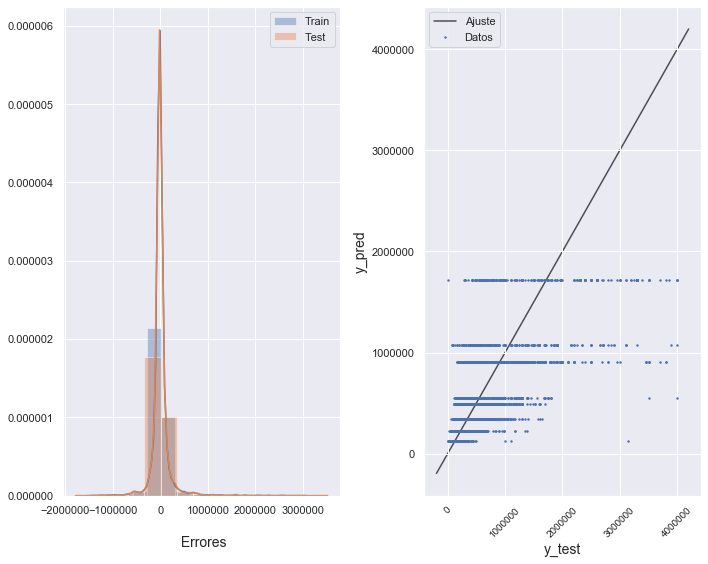

In [148]:
model_plot(Y_train1, Y_test1, Y_train_pred1, Y_test_pred1)

In [149]:
X_2 = df1.drop(columns="price")
Y_2 = df1.price

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(
    X_2, Y_2, test_size=0.33, random_state=42)

tree_regressor.fit(X_train2, Y_train2)

Y_train_pred2 = tree_regressor.predict(X_train2)
Y_test_pred2 = tree_regressor.predict(X_test2)

tree_mae_train2 = metrics.mean_absolute_error(Y_train2, Y_train_pred2)
tree_mae_test2 = metrics.mean_absolute_error(Y_test2, Y_test_pred2)

print("Error Medio Absoluto: DecisionTreeRegressor en Train: ",tree_mae_train2)
print("Error Medio Absoluto: DecisionTreeRegressor en Test: ", tree_mae_test2)

Error Medio Absoluto: DecisionTreeRegressor en Train:  39117.04141300383
Error Medio Absoluto: DecisionTreeRegressor en Test:  38869.59980541259


* Calculo RMSE, solamente para luego poder ser comparado con los modeloz avanzados:

In [150]:
rmse_train_tree= np.sqrt(metrics.mean_squared_error(Y_train2, Y_train_pred2))
r2_train_tree= metrics.r2_score(Y_train2, Y_train_pred2)

rmse_test_tree= np.sqrt(metrics.mean_squared_error(Y_test2, Y_test_pred2))
r2_test_tree= metrics.r2_score(Y_test2, Y_test_pred2)

print(f"DecisionTree en Train")
print("-----------------------")
print(f"RMSE-Train: ", rmse_train_tree)
print(f"r2_score-Train: ", r2_train_tree)
print("\n")
print(f"DecisionTree en Test")
print("-----------------------")
print(f"RMSE-Test: ", rmse_test_tree)
print(f"r2_score-Test: ", r2_test_tree)

DecisionTree en Train
-----------------------
RMSE-Train:  52193.54507861101
r2_score-Train:  0.5786707057915567


DecisionTree en Test
-----------------------
RMSE-Test:  51924.14750750341
r2_score-Test:  0.5829390181971944


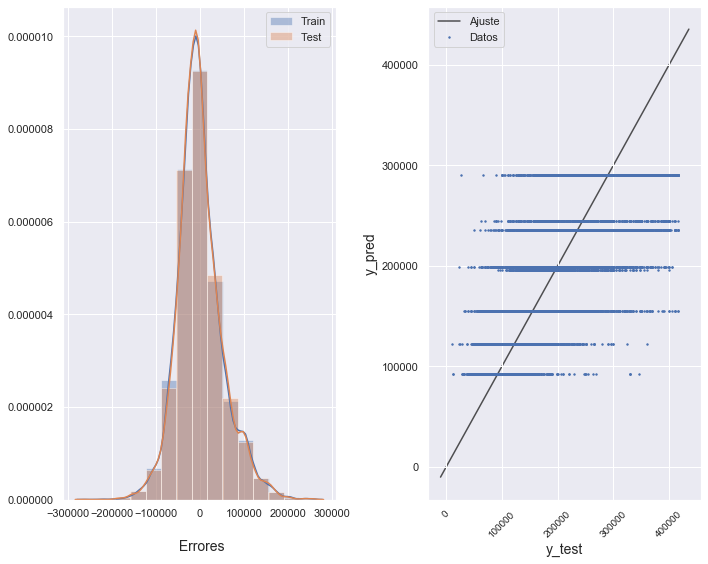

In [151]:
model_plot(Y_train2, Y_test2, Y_train_pred2, Y_test_pred2)

* Comparando el desempeño del mismo modelo, siendo alimentado con 2 Datasets iguales **pero** curados/trabajados de/con distintas maneras se puede apreciar una mejora **contundente** en el desempeño del modelo. Su rendimiento mejoro exponencialmente

In [152]:
print(f"Test-MAE Dataset Proyecto 1:" , tree_mae_test1, "\nTrain-MAE DatasetProyecto 1:", tree_mae_train1)
print("---------------------------------------------------")
print(f"Test-MAE Dataset Proyecto 2:", tree_mae_test2, "\nTrain-MAE Dataset Proyecto 2:", tree_mae_train2)

Test-MAE Dataset Proyecto 1: 92219.03311977236 
Train-MAE DatasetProyecto 1: 91822.84941099396
---------------------------------------------------
Test-MAE Dataset Proyecto 2: 38869.59980541259 
Train-MAE Dataset Proyecto 2: 39117.04141300383


* Claramente una exploracion profunda de los datos y un buen pre-procesamiento de los mismos hacen una difenrencia tan grande a la hora de modelar. No es por nada que se dice que: el 80% del trabajo de DS, se va en la exploracion/pre-procesamiento.

**Comparacion EXTRA**

* En realidad, KNeighborsRegressor fue mi modelo de eleccion entre Arboles y el mismo, creo que estaria bueno hacer una comparacion entre los datos explorados con el modelo que yo elegi y mejore sus hiperparametros. A travez de la busqueda manual encontre que '40' vecinos era el mejor hiperparametro para mi problematica.

In [153]:
knn_regressor = KNeighborsRegressor(n_neighbors=40)

knn_regressor.fit(X_train2, Y_train2)

Y_train_pred3 = knn_regressor.predict(X_train2)
Y_test_pred3 = knn_regressor.predict(X_test2)

knn_rmse_train3 = metrics.mean_absolute_error(Y_train2, Y_train_pred3)
knn_rmse_test3 = metrics.mean_absolute_error(Y_train2, Y_train_pred3)

print(f"Error Medio Absoluto: KNeighborsRegressor en Train", knn_rmse_train3)
print(f"Error Medio Absoluto: KenighborsRegressor en Test", knn_rmse_test3)

Error Medio Absoluto: KNeighborsRegressor en Train 30940.12005765002
Error Medio Absoluto: KenighborsRegressor en Test 30940.12005765002


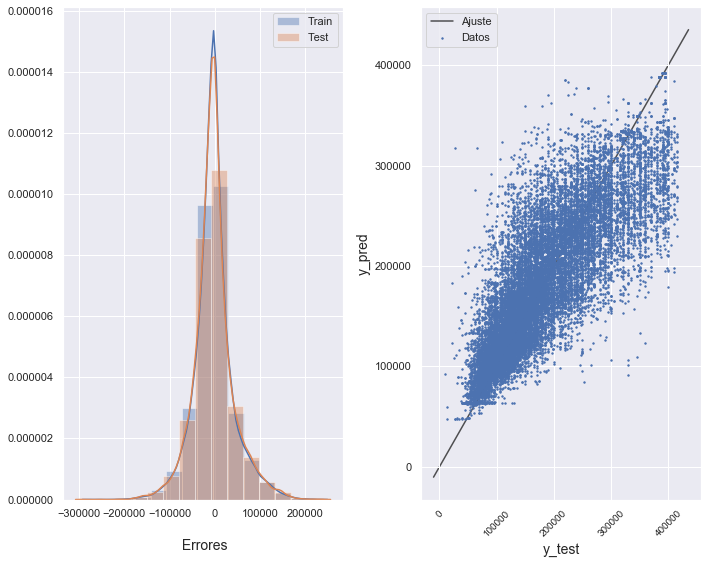

In [154]:
model_plot(Y_train2, Y_test2, Y_train_pred3, Y_test_pred3)

* Se observa una mejora en ambos score's (Train - Test) de aproximadamente 10.000 ! Esto puede deberse tambien que en el proyecto anterior explora *un poco mas* las mejoras para Vecinos y no tanto para Arboles.

<h1><center>PARTE -B-</center></h1> 
<h3><center>Modelos Avanzados</center></h3> 

**Regresion Lineal**

* Creando el modelo de *RegresionLineal* con *PolynomialFeatuers* (parametros en **deafult**).

In [155]:
X = df1.drop(columns="price")
Y = df1.price

columns = ["rooms", "bedrooms", "bathrooms",
           "surface_total", "surface_covered"]

std= StandardScaler()

std.fit_transform(X[columns])


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=3)

reg = LinearRegression()

transformer = make_column_transformer(
    (PolynomialFeatures(include_bias=False), columns), remainder='passthrough')

X_train_poly = transformer.fit_transform(X_train)
X_test_poly = transformer.transform(X_test)

reg.fit(X_train_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Evaluando su desempeño con *Validacion Cruzada*.

In [156]:
best_score_train = abs(cross_val_score(
    reg, X_train_poly, Y_train, cv=5, scoring="neg_root_mean_squared_error")
)
best_score_test = abs(cross_val_score(
    reg, X_test_poly, Y_test, cv=5,  scoring="neg_root_mean_squared_error"))

print("Mejor Score en Train (CV = 5) %0.2f (+/- %0.2f)" %
      (best_score_train.mean(), best_score_train.std()))

print("Mejor Score en Test (CV = 5) %0.2f (+/- %0.2f)" %
      (best_score_test.mean(), best_score_test.std()))

Mejor Score en Train (CV = 5) 39931.23 (+/- 304.48)
Mejor Score en Test (CV = 5) 40181.40 (+/- 387.97)


* Evaluando el modelo

In [157]:
Y_train_pred = reg.predict(X_train_poly)

Y_test_pred = reg.predict(X_test_poly)

rmse_train = np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred))
r2_train = metrics.r2_score(Y_train, Y_train_pred)

rmse_test = np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred))
r2_test = metrics.r2_score(Y_test, Y_test_pred)

print("Desempeño del modelo en Train")
print("----------------------------------")
print("RMSE en Train: ", rmse_train)
print("r2_score en Train: ", r2_train)

print("\n")

print("Desempeño del modelo en Test")
print("-----------------------------------")
print("RMSE en Test: ", rmse_test)
print("r2_score en Test: ", r2_test)

Desempeño del modelo en Train
----------------------------------
RMSE en Train:  39854.193755222455
r2_score en Train:  0.7543012931223371


Desempeño del modelo en Test
-----------------------------------
RMSE en Test:  40134.74966400774
r2_score en Test:  0.7509027866521287


* Regularizando a travez de **Ridge**

In [158]:
ridge = Ridge()

ridge.fit(X_train_poly, Y_train)

Y_train_pred_ridge = ridge.predict(X_train_poly)
Y_test_pred_ridge = ridge.predict(X_test_poly)

rmse_ridge_train = np.sqrt(
    metrics.mean_squared_error(Y_train, Y_train_pred_ridge))
r2_ridge_train = metrics.r2_score(Y_train, Y_train_pred_ridge)

rmse_ridge_test = np.sqrt(
    metrics.mean_squared_error(Y_test, Y_test_pred_ridge))
r2_ridge_test = metrics.r2_score(Y_test, Y_test_pred_ridge)

#print(f"Pendiente de Y:", abs(ridge.coef_))
#print(f"Ordenada al origen de Y:", abs(ridge.intercept_))

print(f"Desempeño Ridge en Train")
print("----------------------------")
print(f"RMSE Ridge en Train:", rmse_ridge_train)
print(f"R2_Score Rdige en Train:", r2_ridge_train)
print("\n")
print(f"Desempeño Ridge en Test")
print("------------------------------")
print(f"RMSE Ridge en Test:", rmse_ridge_test)
print(f"R2_Score Rdige en Test:", r2_ridge_test)

Desempeño Ridge en Train
----------------------------
RMSE Ridge en Train: 39854.54094890145
R2_Score Rdige en Train: 0.7542970122474028


Desempeño Ridge en Test
------------------------------
RMSE Ridge en Test: 40135.30412815476
R2_Score Rdige en Test: 0.7508959040165514


* Graficando los errores

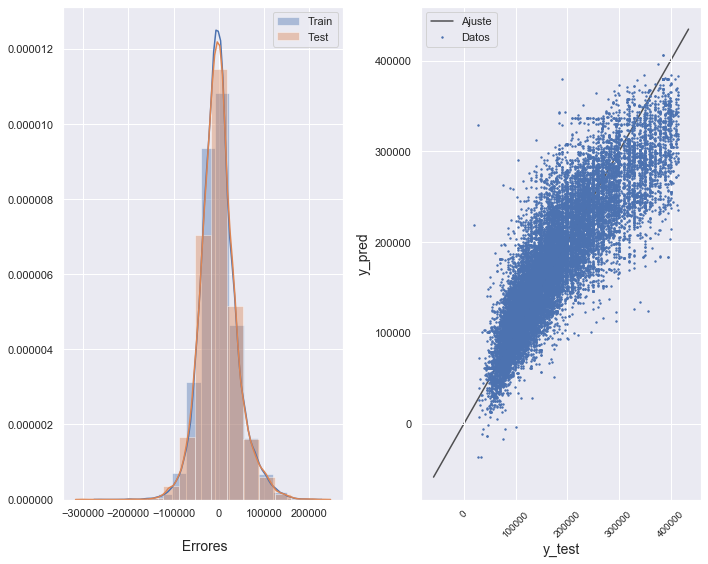

In [159]:
model_plot(Y_train, Y_test, Y_train_pred_ridge, Y_test_pred_ridge)

**Optimizando Hiperparametros *Regresion Lineal***.

   * Encontrando el mejor grado de poloniomios

In [160]:
poly_reg = make_pipeline(transformer, reg)


param_grid = {
    'columntransformer__polynomialfeatures__degree': [1, 2, 3, 4, 5, 6]}

model = GridSearchCV(poly_reg,
                     param_grid,
                     scoring='neg_root_mean_squared_error',
                     cv=7)

In [161]:
model.fit(X_train, Y_train)

GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('polynomialfeatures',
                                                                         PolynomialFeatures(degree=2,
                                                                                            include_bias=False,
                                                                                            interaction_only=False,
                                                                                            order='C'),
           

In [162]:
model.best_params_

{'columntransformer__polynomialfeatures__degree': 3}

In [163]:
pd.DataFrame(model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.202315      0.111711         0.009973        0.000533   
1       0.171826      0.001381         0.012681        0.000698   
2       0.262013      0.016973         0.017383        0.000901   
3       0.428710      0.028487         0.027641        0.002306   
4       0.822230      0.034843         0.042031        0.002941   
5       1.565101      0.234316         0.061550        0.000698   

  param_columntransformer__polynomialfeatures__degree  \
0                                                  1    
1                                                  2    
2                                                  3    
3                                                  4    
4                                                  5    
5                                                  6    

                                              params  split0_test_score  \
0  {'columntransformer__polynomialfeatures__degre...      -40435.674746   
1  {'columntransformer__polynomialfeatures__degre...      -39039.348899   
2  {'columntransformer__polynomialfeatures__degre...      -38831.610804   
3  {'columntransformer__polynomialfeatures__degre...      -38745.921307   
4  {'columntransformer__polynomialfeatures__degre...      -39099.405226   
5  {'columntransformer__polynomialfeatures__degre...      -66539.906189   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0      -40957.582658      -42574.311517      -41198.501303      -41308.248711   
1      -39617.671529      -41087.516999      -39781.867496      -39967.360496   
2      -39499.605084      -40901.782999      -39692.346735      -39684.996298   
3      -40261.298431      -41308.272078      -39637.775676      -39828.476223   
4      -41572.366838      -42425.750857      -39749.385736      -40407.324220   
5      -62542.930953      -49039.747580      -43905.052322      -94497.629845   

   split5_test_score  split6_test_score  mean_test_score  std_test_score  \
0      -41813.318357      -40669.062110    -41279.528486      671.585802   
1      -40402.847596      -39592.123829    -39926.962406      608.472757   
2      -40189.880373      -39430.291116    -39747.216201      601.895109   
3      -40238.538030      -39564.017885    -39940.614233      730.507363   
4      -40488.453952      -39854.810591    -40513.928203     1056.084954   
5      -71648.215358      -61231.127974    -64200.658603    15269.838047   

   rank_test_score  
0                5  
1                2  
2                1  
3                3  
4                4  
5                6

**Regresion Lineal** con mejor hiperparametro de *PolynomialFeatures* (degree= 3), para encontrar mejor hiperparametro para 'alpha' (*Ridge*).

* Creando nuevo modelo, con mejor *degree* de polinomios.

In [164]:
X = df1.drop(columns="price")
Y = df1.price

columns = ["rooms", "bedrooms", "bathrooms",
           "surface_total", "surface_covered"]

std= StandardScaler()

std.fit_transform(X[columns])


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=3)

reg = LinearRegression()
poly = PolynomialFeatures(include_bias=False, degree= 3)


transformer = make_column_transformer((poly, columns), remainder='passthrough')

X_train_poly = transformer.fit_transform(X_train)
X_test_poly = transformer.transform(X_test)

reg.fit(X_train_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Evaluando su desempeño con *Validacion Cruzada*.

In [165]:
best_score_train = abs(cross_val_score(
    reg, X_train_poly, Y_train, cv=5, scoring="neg_root_mean_squared_error")
)
best_score_test = abs(cross_val_score(
    reg, X_test_poly, Y_test, cv=5,  scoring="neg_root_mean_squared_error"))

print("Mejor Score en Train (CV = 5) %0.2f (+/- %0.2f)" %
      (best_score_train.mean(), best_score_train.std()))

print("Mejor Score en Test (CV = 5) %0.2f (+/- %0.2f)" %
      (best_score_test.mean(), best_score_test.std()))

Mejor Score en Train (CV = 5) 39752.69 (+/- 327.78)
Mejor Score en Test (CV = 5) 40137.63 (+/- 380.29)


* Evaluando el nuevo modelo

In [166]:
Y_train_pred = reg.predict(X_train_poly)

Y_test_pred = reg.predict(X_test_poly)

rmse_train = np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred))
r2_train = metrics.r2_score(Y_train, Y_train_pred)

rmse_test = np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred))
r2_test = metrics.r2_score(Y_test, Y_test_pred)

print("Desempeño del modelo en Train")
print("----------------------------------")
print("RMSE en Train: ", rmse_train)
print("r2_score en Train: ", r2_train)

print("\n")

print("Desempeño del modelo en Test")
print("-----------------------------------")
print("RMSE en Test: ", rmse_test)
print("r2_score en Test: ",r2_test)

Desempeño del modelo en Train
----------------------------------
RMSE en Train:  39630.95400512245
r2_score en Train:  0.7570461033840296


Desempeño del modelo en Test
-----------------------------------
RMSE en Test:  39998.095249914346
r2_score en Test:  0.752596196098976


* Optimizando hiperparametro para *alpha*

In [167]:
ridge = Ridge()
poly = PolynomialFeatures(include_bias=False, degree= 3)

columns = ["rooms", "bedrooms", "bathrooms",
           "surface_total", "surface_covered"]

transformer = make_column_transformer((poly, columns), remainder='passthrough')

X_train_poly = transformer.fit_transform(X_train)
X_test_poly = transformer.transform(X_test)

param_grid = {'alpha':  np.logspace(-1, 3, 30)}

model = GridSearchCV(ridge, 
                     param_grid,
                     scoring='neg_root_mean_squared_error', 
                     return_train_score =True, 
                     cv=5)

In [168]:
model.fit(X_train_poly, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-01, 1.37382380e-01, 1.88739182e-01, 2.59294380e-01,
       3.56224789e-01, 4.89390092e-01, 6.72335754e-01, 9.23670857e-01,
       1.26896100...
       4.52035366e+00, 6.21016942e+00, 8.53167852e+00, 1.17210230e+01,
       1.61026203e+01, 2.21221629e+01, 3.03919538e+01, 4.17531894e+01,
       5.73615251e+01, 7.88046282e+01, 1.08263673e+02, 1.48735211e+02,
       2.04335972e+02, 2.80721620e+02, 3.85662042e+02, 5.29831691e+02,
       7.27895384e+02, 1.00000000e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_root_mean_squared_error', verbose=0)

In [169]:
model.best_params_

{'alpha': 0.4893900918477494}

In [170]:
pd.DataFrame(model.cv_results_).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.078589      0.004296         0.003391    4.884999e-04         0.1   
1       0.076993      0.001829         0.003192    3.986120e-04    0.137382   
2       0.083776      0.006115         0.003391    4.885973e-04    0.188739   
3       0.080385      0.002721         0.002993    4.623108e-07    0.259294   
4       0.077792      0.000631         0.003392    4.886361e-04    0.356225   

                           params  split0_test_score  split1_test_score  \
0                  {'alpha': 0.1}      -39178.346192      -39988.893123   
1   {'alpha': 0.1373823795883263}      -39177.960778      -39988.781544   
2  {'alpha': 0.18873918221350972}      -39177.575399      -39988.689462   
3   {'alpha': 0.2592943797404667}      -39177.204915      -39988.628086   
4   {'alpha': 0.3562247890262442}      -39176.862946      -39988.608614   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0      -40134.054593      -39790.943418  ...    -39752.203476      328.513226   
1      -40134.192954      -39790.795930  ...    -39752.131752      328.653024   
2      -40134.343430      -39790.625212  ...    -39752.066521      328.796735   
3      -40134.503433      -39790.423415  ...    -39752.012541      328.939597   
4      -40134.672668      -39790.180210  ...    -39751.976295      329.077257   

   rank_test_score  split0_train_score  split1_train_score  \
0                8       -39759.336743       -39559.672709   
1                6       -39759.441186       -39559.745007   
2                5       -39759.571689       -39559.836496   
3                3       -39759.727829       -39559.947692   
4                2       -39759.911166       -39560.080920   

   split2_train_score  split3_train_score  split4_train_score  \
0       -39520.863294       -39607.743847       -39640.203108   
1       -39520.882043       -39607.808426       -39640.219699   
2       -39520.908866       -39607.890600       -39640.245083   
3       -39520.947502       -39607.992095       -39640.284394   
4       -39521.004796       -39608.117375       -39640.346654   

   mean_train_score  std_train_score  
0     -39617.563940        81.744606  
1     -39617.619272        81.765530  
2     -39617.690547        81.790940  
3     -39617.779903        81.819980  
4     -39617.892182        81.851633  

[5 rows x 21 columns]

* Graficando desempeño del modelo 

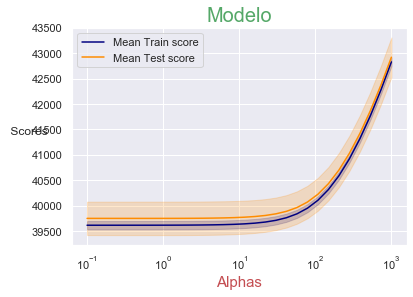

In [171]:
alphas = np.logspace(-1, 3, 30)

train_scores_mean = -model.cv_results_["mean_train_score"]
train_scores_std = -model.cv_results_["std_train_score"]
test_scores_mean = -model.cv_results_["mean_test_score"]
test_scores_std = -model.cv_results_["std_test_score"]

plt.figure()
plt.title('Modelo', fontsize=20, color='g')
plt.xlabel('Alphas', fontsize=15, color='r')
plt.ylabel('\n Scores', rotation=0)
#plt.ylim((0, 100000))

plt.semilogx(alphas, train_scores_mean, label='Mean Train score',
             color='navy')

plt.gca().fill_between(alphas,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2,
                       color='navy')
plt.semilogx(alphas, test_scores_mean,
             label='Mean Test score', color='darkorange')


plt.gca().fill_between(alphas,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')
plt.show()

* Regularizacion con **Ridge** con mejor hiperparametro para 'alpha'

In [172]:
ridge = Ridge(alpha= 0.5)

ridge.fit(X_train_poly, Y_train)

Y_train_pred_ridge = ridge.predict(X_train_poly)
Y_test_pred_ridge = ridge.predict(X_test_poly)

rmse_train_ridge = np.sqrt(
    metrics.mean_squared_error(Y_train, Y_train_pred_ridge))
r2_train_ridge = metrics.r2_score(Y_train, Y_train_pred_ridge)

rmse_test_ridge = np.sqrt(
    metrics.mean_squared_error(Y_test, Y_test_pred_ridge))
r2_test_ridge = metrics.r2_score(Y_test, Y_test_pred_ridge)

#print(f"Pendiente de Y:", abs(ridge.coef_))
#print(f"Ordenada al origen de Y:", abs(ridge.intercept_))

print(f"Desempeño Ridge en Train")
print(f"RMSE Ridge en Train:", rmse_train_ridge)
print(f"R2_Score Rdige en Train:", r2_train_ridge)
print("-----------------------------------------")
print(f"Desempeño Ridge en Test")
print(f"RMSE Ridge en Test:", rmse_test_ridge)
print(f"R2_Score Rdige en Test:", r2_test_ridge)

Desempeño Ridge en Train
RMSE Ridge en Train: 39631.38249681669
R2_Score Rdige en Train: 0.7570408496982587
-----------------------------------------
Desempeño Ridge en Test
RMSE Ridge en Test: 39997.02752305463
R2_Score Rdige en Test: 0.7526094045359863


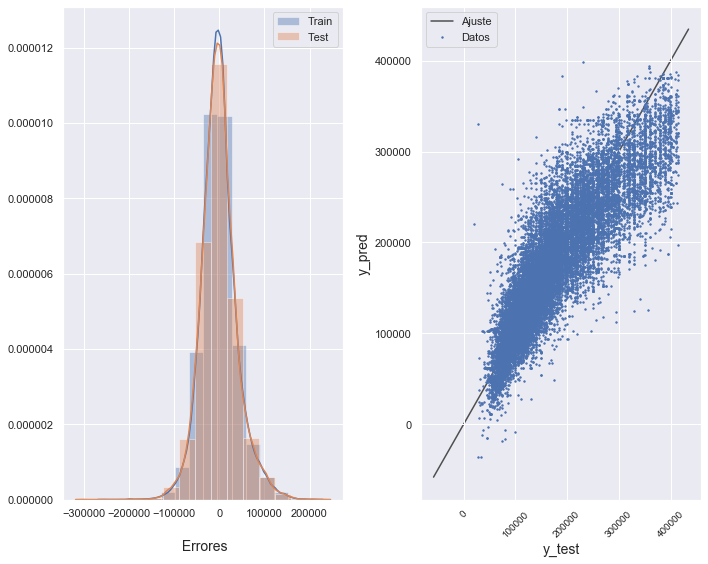

In [173]:
model_plot(Y_train, Y_test, Y_train_pred, Y_test_pred)

* Luego de la busqueda del mejor hiperparametro para *PolynomialFeatures (su mejor polonomio)* y de *Ridge (su mejor 
  alpha)* los resultados demuestran que, tras  aplicar los GridSearchsCV, el modelo (tanto la regresion como la 
  regularizacion) no mejoran notablememente. La mejora en el desempeño siquiera es notable, casi inpercetible. 
  

* Conclusion: Antes de de aplicar *hypertunning* obtenia un **r2 score = 0.75089..** y luego obtengo un **r2 score = 0.75260...** . La optimizacion de los hiperparametros para los modelos propuestos no es viable dado que su desempeño
  practicamente sino complemtamente, no mejora. 

**XGBoost Regressor**

In [174]:
df2 = df2.infer_objects()

df2.iloc[:, 6:64] = np.int8(df2.iloc[:, 6:64])

X = df2.drop(columns="price")
Y = df2.price

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=3)

xgb = XGBRegressor(objective= 'reg:squarederror', eval_metric= 'rmse')

xgb.fit(X_train, Y_train)

Y_train_pred = xgb.predict(X_train)
Y_test_pred = xgb.predict(X_test)

rmse_train = np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred))
r2_train = metrics.r2_score(Y_train, Y_train_pred)

rmse_test = np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred))
r2_test = metrics.r2_score(Y_test, Y_test_pred)

print(f"XGBRegressor en Train")
print("-----------------------")
print(f"RMSE-Train: ", rmse_train)
print(f"r2_score-Train: ", r2_train)
print("\n")
print(f"XGBRegressor en Test")
print("-----------------------")
print(f"RMSE-Test: ", rmse_test)
print(f"r2_score-Test: ", r2_test)

XGBRegressor en Train
-----------------------
RMSE-Train:  39627.68624882175
r2_score-Train:  0.7570861670875371


XGBRegressor en Test
-----------------------
RMSE-Test:  40084.70123375343
r2_score-Test:  0.7515236526808908


In [175]:
best_score_train = abs(cross_val_score(
    xgb, X_train, Y_train, cv=5, scoring="neg_root_mean_squared_error")
)
best_score_test = abs(cross_val_score(
    xgb, X_test, Y_test, cv=5,  scoring="neg_root_mean_squared_error"))

print("Mejor Score en Train (CV = 5) %0.2f (+/- %0.2f)" %
      (best_score_train.mean(), best_score_train.std()))

print("Mejor Score en Test (CV = 5) %0.2f (+/- %0.2f)" %
      (best_score_test.mean(), best_score_test.std()))

Mejor Score en Train (CV = 5) 39890.81 (+/- 366.26)
Mejor Score en Test (CV = 5) 40224.71 (+/- 285.26)


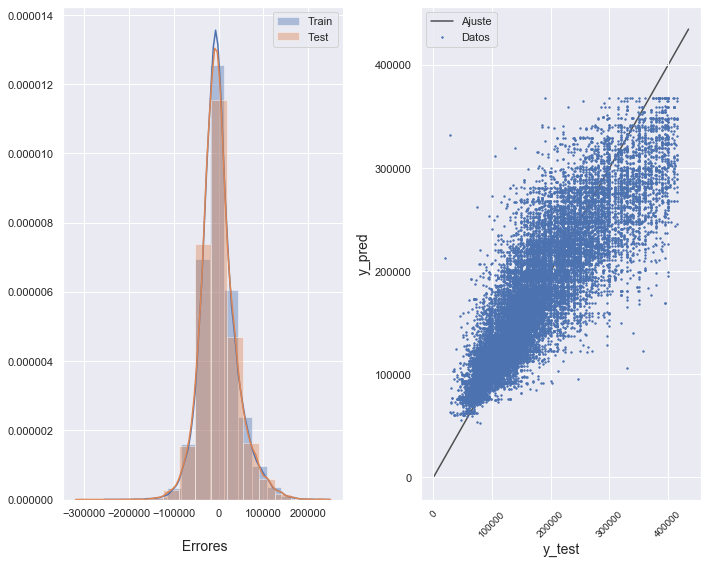

In [176]:
model_plot(Y_train, Y_test, Y_train_pred, Y_test_pred)

* Mejora de hiperparametros

In [177]:
param_grid = {'objective': ['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': np.arange(3, 7, 1),
              'subsample': np.arange(.5, 1, .05),
              'colsample_bytree': np.arange(.5, 1, .05),
              'n_estimators': [100, 200, 500, 700]}

xgb = XGBRegressor()

model = RandomizedSearchCV(xgb,
                           param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv= 3,
                           n_jobs= -1,
                           n_iter= 15,
                           random_state= 3)

In [178]:
model.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   param_distributions={'colsample_bytree': array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                                        'learning_rate': [0

In [179]:
model.best_params_

{'subsample': 0.8500000000000003,
 'objective': 'reg:squarederror',
 'n_estimators': 500,
 'max_depth': 6,
 'learning_rate': 0.05,
 'colsample_bytree': 0.7500000000000002}

In [180]:
model.best_score_

-35054.39089868386

In [181]:
xgb = XGBRegressor(colsample_bytree=0.75,
                   learning_rate=0.05,
                   max_depth=6,
                   min_child_weight=4,
                   n_estimators=500,
                   nthread=4,
                   objective='reg:squarederror',
                   silent=1,
                   subsample=0.85,
                  eval_metric='rmse')

In [182]:
xgb.fit(X_train, Y_train)

Y_train_pred_xgb = xgb.predict(X_train)
Y_test_pred_xgb = xgb.predict(X_test)

rmse_train_xgb = np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred_xgb))
r2_train_xgb = metrics.r2_score(Y_train, Y_train_pred_xgb)

rmse_test_xgb = np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred_xgb))
r2_test_xgb = metrics.r2_score(Y_test, Y_test_pred_xgb)

print(f"XGBRegressor en Train")
print("-----------------------")
print(f"RMSE-Train: ", rmse_train_xgb)
print(f"r2_score-Train: ", r2_train_xgb)
print("\n")
print(f"XGBRegressor en Test")
print("-----------------------")
print(f"RMSE-Test: ", rmse_test_xgb)
print(f"r2_score-Test: ", r2_test_xgb)

XGBRegressor en Train
-----------------------
RMSE-Train:  33073.3167726557
r2_score-Train:  0.8307961205654725


XGBRegressor en Test
-----------------------
RMSE-Test:  35250.452787113674
r2_score-Test:  0.8078425831967233


* Al aplicar *XGBRegressor* con la mejora de sus parametros, se puede apreciar una gran mejora en cuanto al desempeño en contraste con los otro modelos.

In [183]:
model_plot(Y_train, Y_test, Y_train_pred_xgb, Y_test_pred_xgb)

**RandomForestRegressor** - modelo extra-

In [184]:
rf = RandomForestRegressor()

rf.fit(X_train, Y_train)

Y_train_pred = rf.predict(X_train)
Y_test_pred = rf.predict(X_test)

rmse_train = np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred))
r2_train = metrics.r2_score(Y_train, Y_train_pred)

rmse_test = np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred))
r2_test = metrics.r2_score(Y_test, Y_test_pred)

print(f"RandomForest en Train")
print("-----------------------")
print(f"RMSE-Train: ", rmse_train)
print(f"r2_score-Train: ", r2_train)
print("\n")
print(f"RandomForest en Test")
print("-----------------------")
print(f"RMSE-Test: ", rmse_test)
print(f"r2_score-Test: ", r2_test)

RandomForest en Train
-----------------------
RMSE-Train:  19176.73249904975
r2_score-Train:  0.9431141783274122


RandomForest en Test
-----------------------
RMSE-Test:  31347.256465065744
r2_score-Test:  0.8480408602551374


* Como era de esperarse, las predicciones sobre Train de RandomForestRegressor son muy buenas, pero veo que baja considerablemente cuando predecimos sobre Test. Esto se debe a que el modelo esta *overfiteado* y aprendio el *ruido* de los datos de entrenamiento. Probablemente probar profundidades menores ( es decir, 50 o menos) pueda llegar a correjir el error. La cuestion es que por default RFR 'max_depth' viene en -None-. Es decir hasta que no esten completamente *puras las hojas* no termina.

In [185]:
best_score_train = abs(cross_val_score(
    rf, X_train, Y_train, cv=5, scoring="neg_root_mean_squared_error")
)
best_score_test = abs(cross_val_score(
    rf, X_test, Y_test, cv=5,  scoring="neg_root_mean_squared_error"))

print("Mejor Score en Train (CV = 5) %0.2f (+/- %0.2f)" %
      (best_score_train.mean(), best_score_train.std()))

print("Mejor Score en Test (CV = 5) %0.2f (+/- %0.2f)" %
      (best_score_test.mean(), best_score_test.std()))

Mejor Score en Train (CV = 5) 31932.81 (+/- 85.10)
Mejor Score en Test (CV = 5) 34614.40 (+/- 516.90)


* Luego de aplicar validacion cruzada se observa una estabilidad en los resultados de Train.

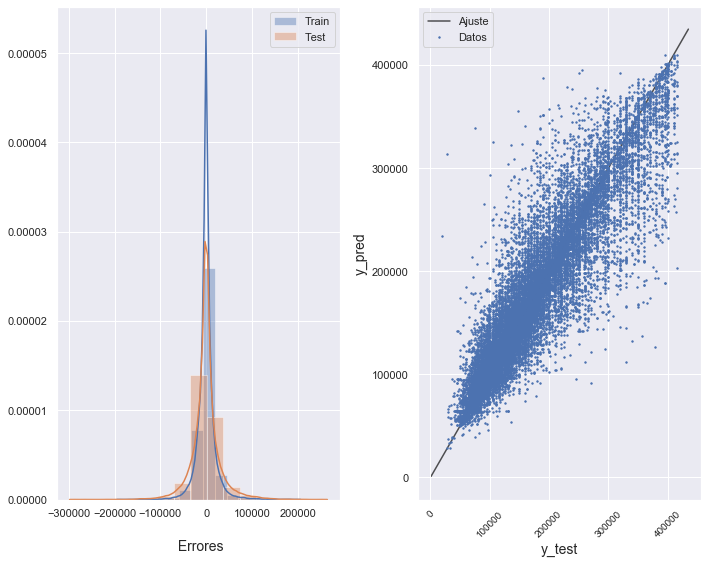

In [186]:
model_plot(Y_train, Y_test, Y_train_pred, Y_test_pred)

* Mejora de hiperparametros

In [187]:
param_grid = {'n_estimators': [200],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [10, 20, 30, 40, 50],
               'min_samples_split': [2, 5, 10, 15],
               'min_samples_leaf': [1, 2, 4, 6]}

In [188]:
model = RandomizedSearchCV(rf,
                           param_grid, scoring='neg_root_mean_squared_error',
                           cv=3,
                           n_iter=10,
                           verbose=5,
                           random_state=3,
                           n_jobs=-1)

In [189]:
model.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [190]:
model.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 50}

In [191]:
pd.DataFrame(model.cv_results_).head(4)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      29.232190      0.030297         0.316154        0.001410   
1       8.626939      0.241517         0.724728        0.018930   
2       7.594365      0.016171         0.533241        0.010844   
3      31.098201      0.322436         0.328789        0.001694   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                200                      10                      6   
1                200                       5                      2   
2                200                       5                      6   
3                200                      10                      2   

  param_max_features param_max_depth  \
0               auto              10   
1               log2              30   
2               log2              40   
3               auto              10   

                                              params  split0_test_score  \
0  {'n_estimators': 200, 'min_samples_split': 10,...      -39775.508467   
1  {'n_estimators': 200, 'min_samples_split': 5, ...      -34767.055380   
2  {'n_estimators': 200, 'min_samples_split': 5, ...      -37706.452806   
3  {'n_estimators': 200, 'min_samples_split': 10,...      -39563.720371   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0      -40274.304384      -40078.271437    -40042.694763      205.180598   
1      -35230.647029      -35010.787714    -35002.830041      189.344127   
2      -38459.498932      -38045.204249    -38070.385329      307.944997   
3      -40119.481961      -39973.938918    -39885.713750      235.309012   

   rank_test_score  
0                9  
1                5  
2                7  
3                8

* Si bien, los resultados de RandomizedSearch fueron otros opte por ir probando manualmente en base a los resultados de 
  Randomized y luego fijarme cuales hiperparametros proveian el menor *overfit* en el modelo.

In [192]:
rf = RandomForestRegressor(n_estimators=200, min_samples_split=5,
                           min_samples_leaf=2, max_features='sqrt', max_depth=20)

rf.fit(X_train, Y_train)

Y_train_pred_rf = rf.predict(X_train)
Y_test_pred_rf = rf.predict(X_test)

rmse_train_rf = np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred_rf))
r2_train_rf = metrics.r2_score(Y_train, Y_train_pred_rf)

rmse_test_rf = np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred_rf))
r2_test_rf = metrics.r2_score(Y_test, Y_test_pred_rf)

print(f"RandomForest en Train")
print("-----------------------")
print(f"RMSE-Train: ", rmse_train_rf)
print(f"r2_score-Train: ", r2_train_rf)
print("\n")
print(f"RandomForest en Test")
print("-----------------------")
print(f"RMSE-Test: ", rmse_test_rf)
print(f"r2_score-Test: ", r2_test_rf)

RandomForest en Train
-----------------------
RMSE-Train:  33503.89345890696
r2_score-Train:  0.8263617608597539


RandomForest en Test
-----------------------
RMSE-Test:  35951.76027349385
r2_score-Test:  0.8001205845804599


In [193]:
best_score_train = abs(cross_val_score(
    rf, X_train, Y_train, cv=5, scoring="neg_root_mean_squared_error")
)
best_score_test = abs(cross_val_score(
    rf, X_test, Y_test, cv=5,  scoring="neg_root_mean_squared_error"))

print("Mejor Score en Train (CV = 5) %0.2f (+/- %0.2f)" %
      (best_score_train.mean(), best_score_train.std()))

print("Mejor Score en Test (CV = 5) %0.2f (+/- %0.2f)" %
      (best_score_test.mean(), best_score_test.std()))

Mejor Score en Train (CV = 5) 36100.23 (+/- 282.51)
Mejor Score en Test (CV = 5) 37310.17 (+/- 166.39)


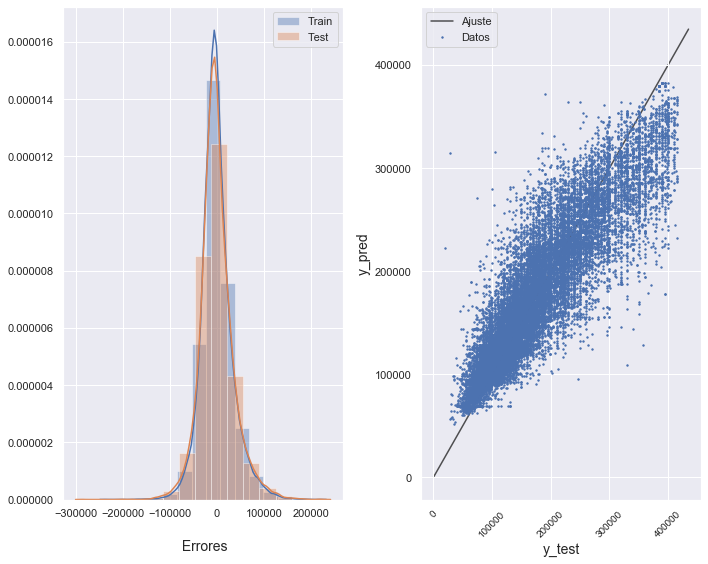

In [194]:
model_plot(Y_train, Y_test, Y_train_pred_rf, Y_test_pred_rf)

**CONCLUSION MODELOS AVANZADOS**

In [195]:
print("RESULTADOS DE LOS MODELOS:")
print("\n")
print("-----------------------------------------")
print(f"DecisionTree")
print("-----------------------------------------")
print(f"RMSE-Train: ", rmse_train_tree)
print(f"R2_Score-Train: ", r2_train_tree)
print("\n")
print(f"RMSE-Test: ", rmse_test_tree)
print(f"R2_Score-Test: ", r2_test_tree)
print("\n")
print("-----------------------------------------")
print(f"Reg.Lin c/Atrb.poly")
print("-----------------------------------------")
print(f"RMSE-Train: ", rmse_train_ridge)
print(f"R2_Score-Train: ", r2_train_ridge)
print("\n")
print(f"RMSE-Test: ", rmse_test_ridge)
print(f"R2_Score-Test: ", r2_test_ridge)
print("\n")
print("-----------------------------------------")
print(f"XGBRegressor")
print("-----------------------------------------")
print(f"RMSE-Train: ", rmse_train_xgb)
print(f"R2_score-Train: ", r2_train_xgb)
print("\n")
print(f"RMSE-Test: ", rmse_test_xgb)
print(f"R2_Score-Test: ", r2_test_xgb)
print("\n")
print("-----------------------------------------")
print(f"RandomForest")
print("-----------------------------------------")
print(f"RMSE-Train: ", rmse_train_rf)
print(f"R2_Score-Train: ", r2_train_rf)
print("\n")
print(f"RMSE-Test: ", rmse_test_rf)
print(f"R2_Score-Test: ", r2_test_rf)

RESULTADOS DE LOS MODELOS:


-----------------------------------------
DecisionTree
-----------------------------------------
RMSE-Train:  52193.54507861101
R2_Score-Train:  0.5786707057915567


RMSE-Test:  51924.14750750341
R2_Score-Test:  0.5829390181971944


-----------------------------------------
Reg.Lin c/Atrb.poly
-----------------------------------------
RMSE-Train:  39631.38249681669
R2_Score-Train:  0.7570408496982587


RMSE-Test:  39997.02752305463
R2_Score-Test:  0.7526094045359863


-----------------------------------------
XGBRegressor
-----------------------------------------
RMSE-Train:  33073.3167726557
R2_score-Train:  0.8307961205654725


RMSE-Test:  35250.452787113674
R2_Score-Test:  0.8078425831967233


-----------------------------------------
RandomForest
-----------------------------------------
RMSE-Train:  33503.89345890696
R2_Score-Train:  0.8263617608597539


RMSE-Test:  35951.76027349385
R2_Score-Test:  0.8001205845804599


* En cuanto al desempeño del modelo -Parte A- con los modelos de -Parte B- estos demuestran mejores resultados. Creo firmemente que esto se debe a un mayor y mas amplio manejo de modelos por nuestra parte **pero** mas que nada, en la exploracion de los datos y su pre-procesamiento. El mayor uso de datos disponibles, el correcto manejo de V.A y V.F, encodear los datos del DS para que los modelos puedan entenderlo ayudan a mejores resultados. Es un claro ejemplo de como, datos explorado y trabajados en la manera correcta (segun cada ocasion) generan mejores resultados en cuanto a los modelos.


* Una vez terminada la exploracion de Modelos Avanzados, por su rapidez, implementacion y resultados, XGBRegressor (o XGBoost) termina siendo el modelo de eleccion.

¿Porque?

* Si bien este modelo lo vimos muy por arriba en la cursada, por mi parte lo investigue bastante y me encontre con su rapida y eficiente implementacion, como tambien, con su gran numero de uso(ultimamente) en base a los resultados que tiene. Teniendo en cuenta, tambien, que fue el modelo mas simple de entrenar, mejorar y volver a entrenar. Cuestion de minutos, comparado con el tiempo que llevo realizar la Regresion Lineal con atributos polynomicos y, por otro lado, el tiempo que llevo la implementacion de RandomizedSearch sobre RandomForestRegressor para mejorar sus hiperparametros (teniendo en cuenta que tuve que optar por explorar a mano los hiperparametros de RFR ya que, 'best_params' generaba un *overfit* en el modelo. 

<h1><center>PARTE -C-</center></h1> 
<h3><center>Interpretacion de los modelos<h3><center>

**Variables Relevantes para los modelos elegidos**

*XGBRegressor*

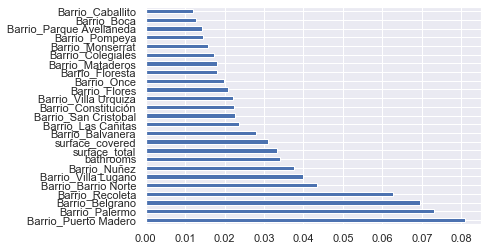

In [196]:
xgb_importances = pd.Series(xgb.feature_importances_, index= X_train.columns)
xgb_importances.nlargest(25).plot(kind='barh')
plt.show()

De esta manera muestro las 20 primeras *features* mas importantes para XGBRegressor. Podemos ver como, todos los barrios encodeados aportan mucha informacion al modelo y de las features "originales" solo tomo `surface_total`, `surface_covered` y `bathrooms`. Si sigo imprimiendo mas features  (aumentar el numero de nlargest) se observa como practicamente XGBRegressor tomo a todas las *features* como imporantes.

*RandomForestRegressor*

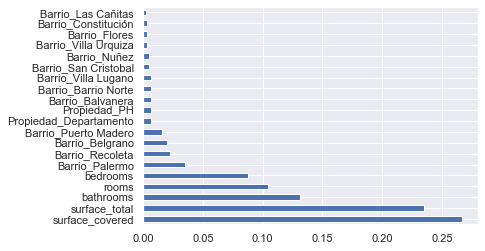

In [197]:
rf_importances = pd.Series(rf.feature_importances_, index= X_train.columns)
rf_importances.nlargest(20).plot(kind='barh')
plt.show()

Por el contrario, RandomForestRegressor tomo como *features* mas importantes las columnas de `surface_total`, `surface_coverd`, `bathrooms`, `rooms`, `bedrooms` y luego los barrios encodeados (y por lo visto los mas grandes fueron los que mas informacion aportaron)

In [198]:
tree_1= rf.estimators_[4]
tree_1.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 340625210,
 'splitter': 'best'}

In [199]:
tree_2= rf.estimators_[10]
tree_2.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 487683540,
 'splitter': 'best'}

In [200]:
Gs= gs.GridSpec(1,2)

plt.figure(figsize=(15,5))

ax0= plt.subplot(Gs[0])

tree_1_importances = pd.Series(tree_1.feature_importances_, index= X_train.columns)
tree_1_importances.nlargest(20).plot(kind='barh')
plt.title(f"Arbol 1", fontsize= 20, color='g')


ax1= plt.subplot(Gs[1])

tree_2_importances = pd.Series(tree_2.feature_importances_, index= X_train.columns)
tree_2_importances.nlargest(20).plot(kind='barh')
plt.title(f"Arbol 2", fontsize= 20, color='g')

plt.show()

* Si bien los arboles observados, tienen los mismos parametros de entrenamiento, puedo observar como cada arbol tomo distintas variables como sus objetos de estudios mas importantes. Si bien comparten en su gran mayoria las variables elegidas ( desde 'rooms' hasta 'bathrooms' tuvieron el mismo peso) como mas importantes, luego cuando es el turno de los barrios, una arbol incidio mas peso en el barrio Palermo, Recoleta , Belgrano y el otro Belgrano, Palermo y Puerto Madero. La diferencia se encuentra en la importancia que cada arbol indujo en cada feature del DF.

**Interpretacion de los errores del modelo elegido (*XGBRegressor*)**.



In [201]:
model_plot(Y_train, Y_test, Y_train_pred_xgb, Y_test_pred_xgb)

* En cuanto a los errores que se presentan en el grafico de la izquierda, se puede apreciar como los errores tienden a una forma uniforme(normal) pero tienen una pequeña (muy pequeña) tendencia hacia la izquierda. Este es un buen indicio que el modelo esta generalizando bien los errores tanto en Test como en Train(se aprecia un ligero incremento en los errores en Train).


* En cuanto al grafico de la derecha, se puede ver como el modelo se "ajusta" bastante bien a los datos, hasta el momento que entra en contacto con propieades valuadas en precios mayores a $ 270000 aproximadamente. Ya el modelo empieza a subestimar precios y los datos empiezan a divergir de la linea de ajuste. Esto indica que, para propiedades con precios muy altos el modelo ya no predice con tanta exactitud. Quizas estas propiedades cuentan con variables no observadas las cuales podrian llegar a generar una mejor explicacion en el DF del porque de su valor (materiales usados para la construccion, antiguedad de la propiedad, cercania a "puntos de necesidad", cercania a "lugares historicos", accesos a rutas o avenidas, y asi muchas mas variables que podrian ayudar a explicar mejor el valor de la propiedad.)

**CONCLUSION FINAL Y OBSERVACIONES**

* En cuanto a mi opinion personal, siento que este proyecto fue mucho mas desafiante dado que muchas de las herramientas a implementar se vieron quizas mas "superficialmente" a lo largo del Bloque 2. Por contraparte, fue un gran momento para organizarnos como grupo y empezar a compartir mas nuestras experiencias y codigos (al contrario del Proyecto 1 que siento fue mas personal). Al encontrarnos con estos nuevos desafios nos vimos empujados a: Buscar mas por nuestra cuenta que antes pero al mismo tiempo apoyarnos mas en nuestros compañeros y no tanto en nuestro tutor (¡*Habemus Edu*!, lo volvimos loco)


* En cuanto a los resultados, quizas en mi ingenuidad, aspire a conseguir un error mas bajo (esperaba tener una prediccion mas o menos del 0.93% -lo ideal en la practica-) pero me quedo muy contento con los resultados de mi modelo elegido, XGBRegressor, y creo que en cuanto al Dataset podria darse "otra vuelta de tuerca" (en algun otro momento) para refinar un poco mas los datos y comparar nuevos resultados. Quizas ahi este este 0.93


* En cuanto a la metodologia implentada en el proyecto, siento que por el momento utilice la mayor cantidad de herramientas a mi alcance aunque en un futuro, quisiera poder implementar en la exploracion de datos tecnicas de PCA/SVD que en este proyecto(por cuestiones de tiempo y practicidad) preferi no implementar y opte por profundizar aun mas con las tecnicas implementadas en el Proyecto 1. 
  

*  A destacar (lo cual exprese antes): Como el rendimientos *en general* de los modelos mejoran exponencialmente una ves que lo alimentamo con un DF propiamente (o en su mayor medidad) curado y con la mayor cantidad de datos disponible.

* Quizas, para un futuros proyectos, seria una buena idea/practica separar los modelos por tipo de propiedad o barrios. Es decir, un modelo para Departamentos y PH's de Capital Federal (quizas) nos de mejores resultados que el mismo modelo pero incluyendole Casas. O un modelo que se ejecute por barrios. Es decir, que cotize en relacion al barrio para el que fue entrenado. Esto podria llegar a generar un numero mayor de modelos pero al mismo tiempo modelos mas precisos que se ajusten mejor a sus nuevas instancias a predecir.